## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

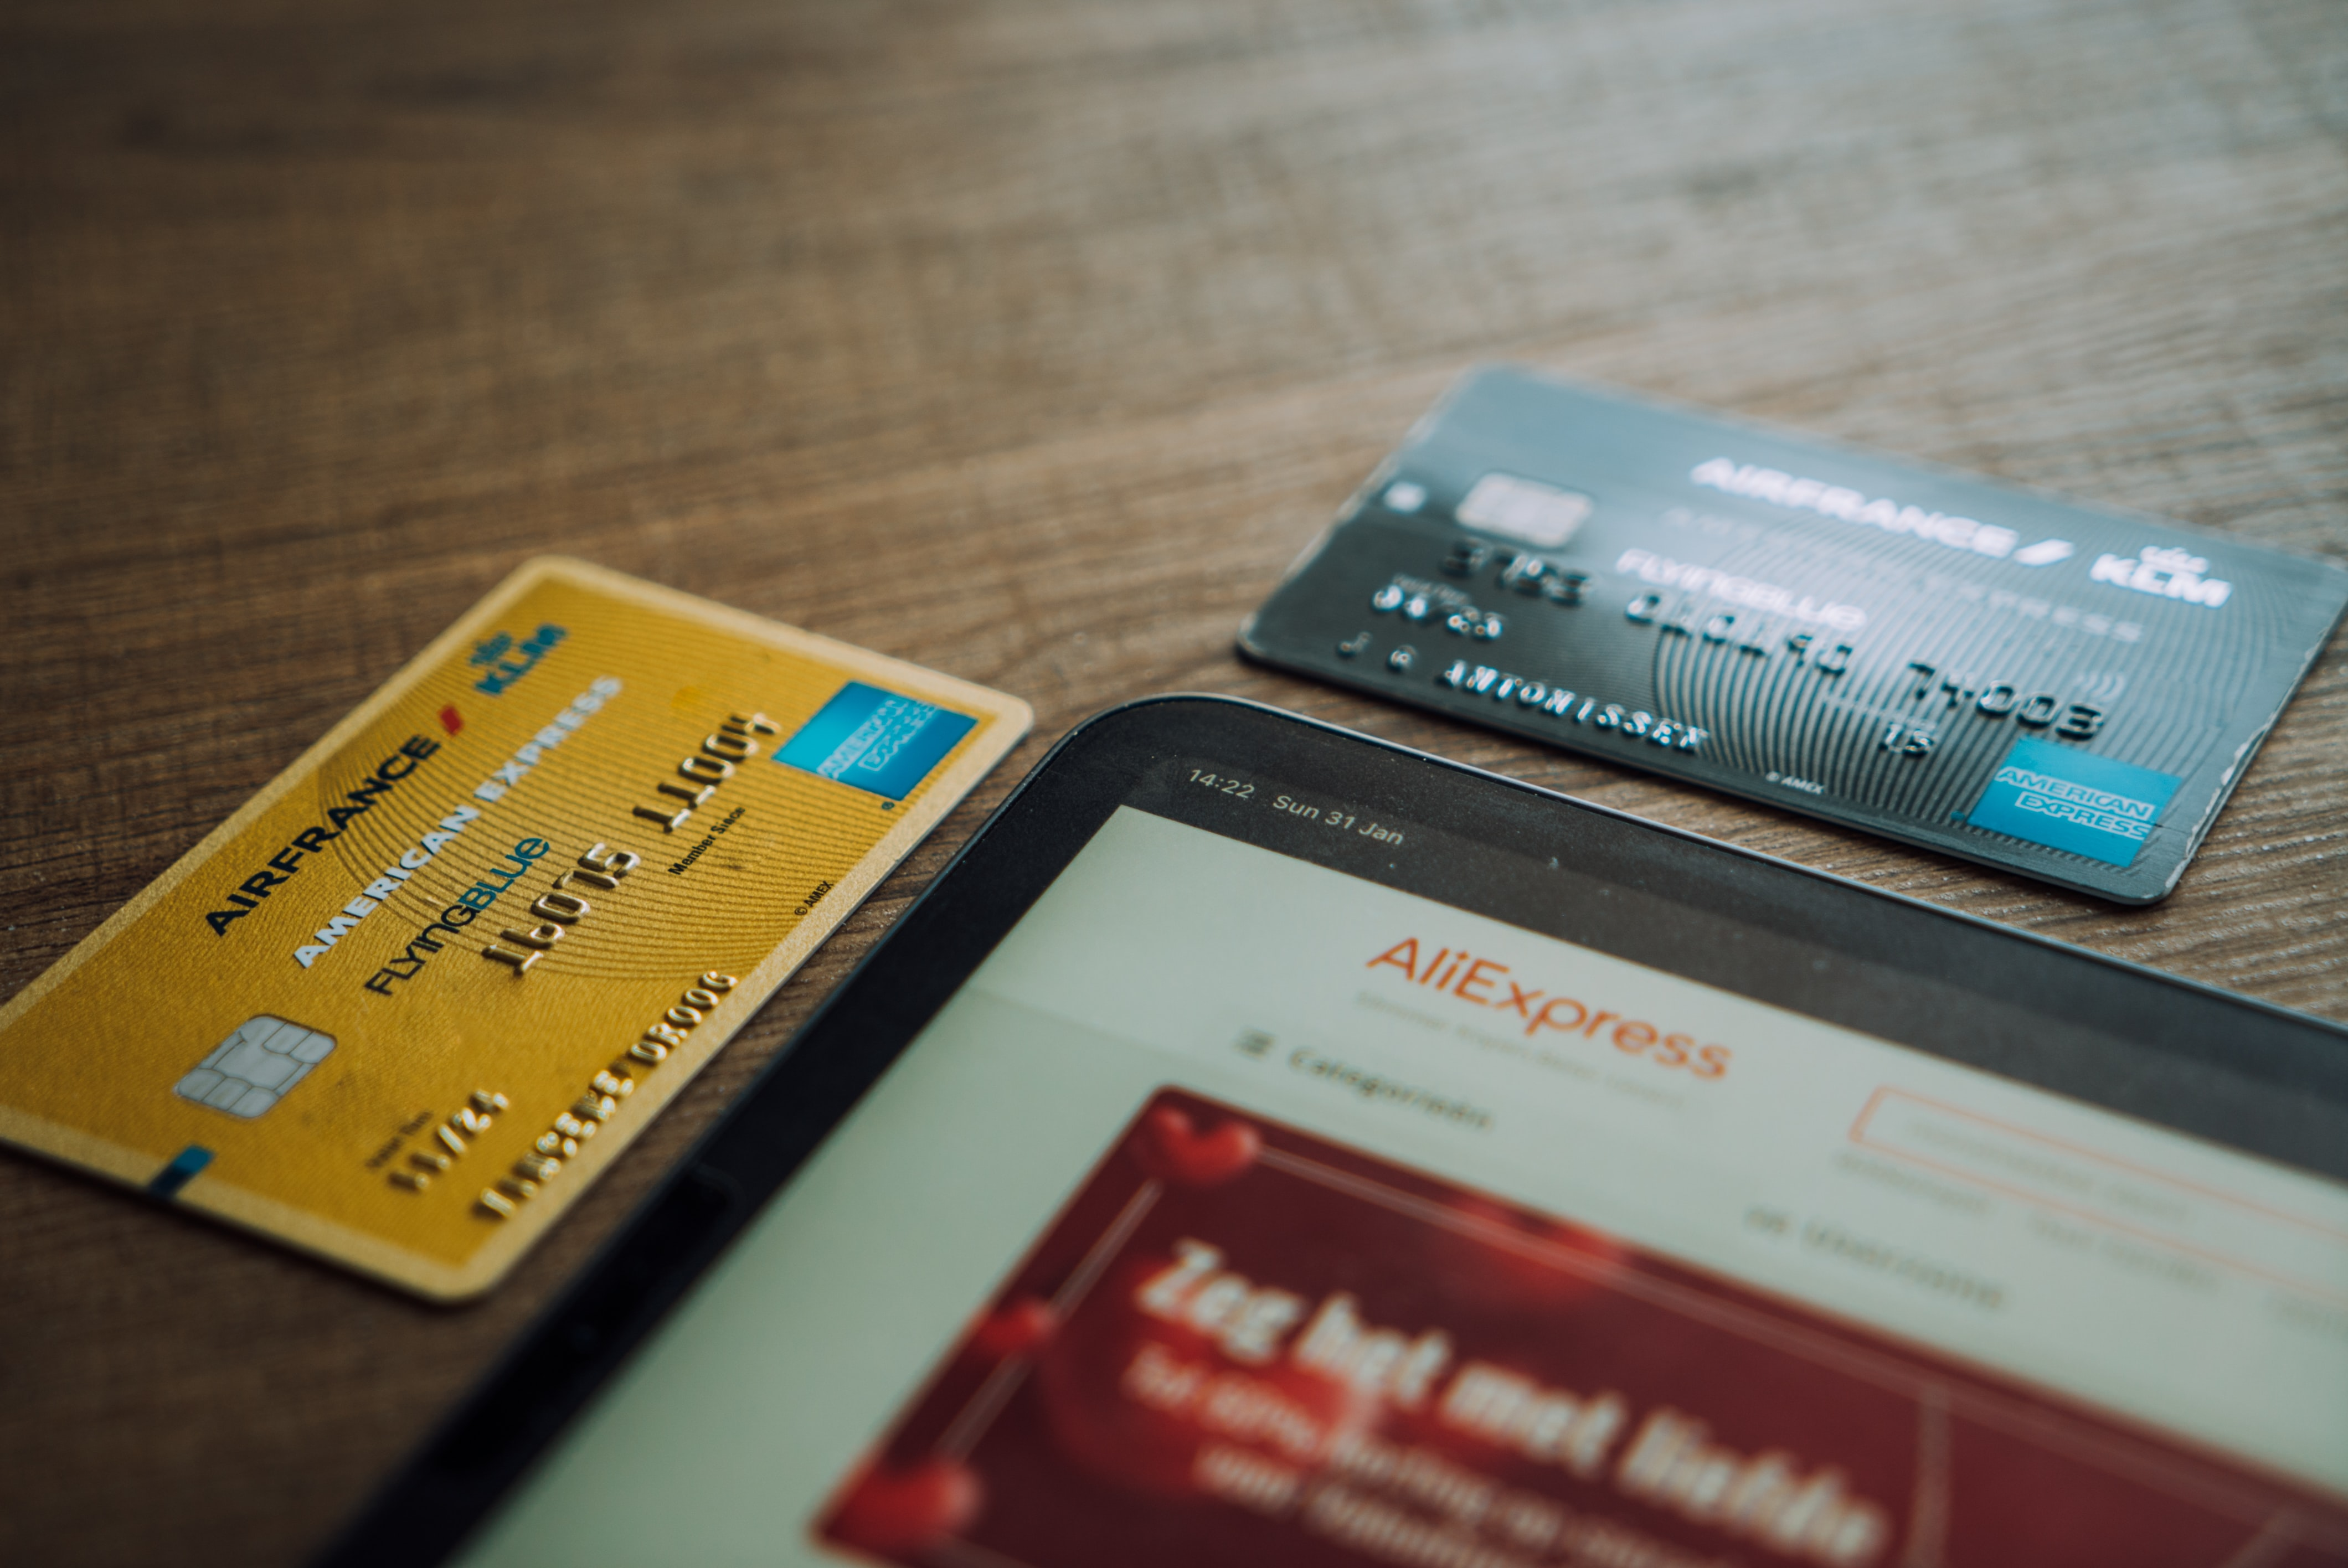

In [7]:
from IPython.display import Image
Image(filename ='D:/Data documents/card.jpg', width = 8000, height = 200) 

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [2]:
# Display all rows and columns of a dataframe
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
credit_data = pd.read_csv('D:/Data documents/creditcard.csv')
credit_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

## Exploratory data analysis

In [5]:
credit_data.shape

(284807, 31)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
credit_data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.768627e-15  9.170318e-16 -1.810658e-15  1.693438e-15  1.479045e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.482336e-15  1.392007e-15 -7.528491e-16  4.328772e-16  9.049732e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.085503e-16  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [8]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Here we will observe the distribution of our classes

In [9]:
classes = credit_data['Class'].value_counts()
normal_share = round(classes[0]/credit_data['Class'].count()*100,4)
fraud_share = round(classes[1]/credit_data['Class'].count()*100,4)
print(normal_share)
print(fraud_share)

99.8273
0.1727


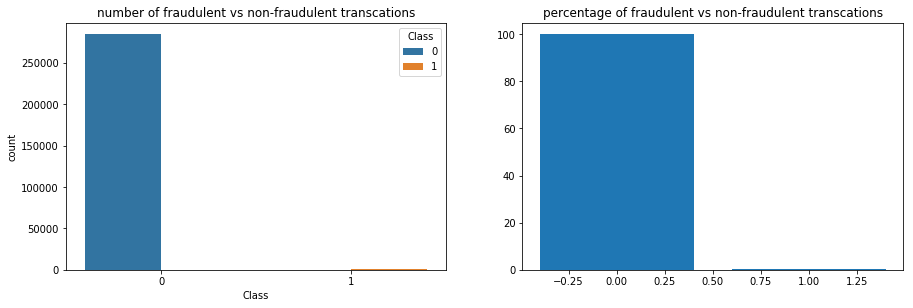

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x ='Class', hue ='Class', data = credit_data)
plt.title("No. of fraudulent vs Non-fraudulent transcations")
plt.subplot(222)
plt.bar([0,1],[normal_share, fraud_share])
plt.title("Percentage of fraudulent vs Non-fraudulent transcations")
plt.show()

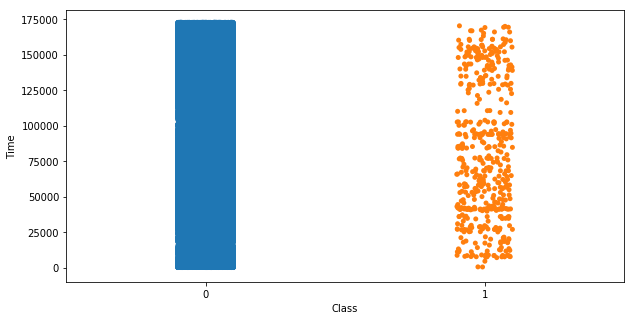

In [11]:
# Create a scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize = (10,5))
sns.stripplot(y = 'Time', x = 'Class', data = credit_data, jitter = True)

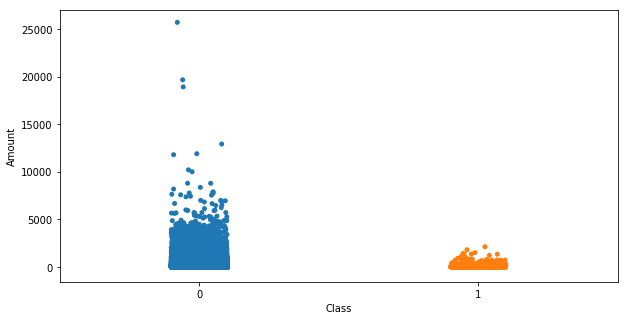

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize = (10,5))
sns.stripplot(y = 'Amount', x = 'Class', data = credit_data, jitter = True)

In [13]:
# Drop unnecessary columns
credit_data_new = credit_data.drop('Time',axis=1)

In [14]:
credit_data_new.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [15]:
credit_data_new.shape

(284807, 30)

### Splitting the data into train & test data

In [16]:
# Split the dataset into X and y
y = credit_data_new['Class']
X = credit_data_new.drop(['Class'],axis = 1)

In [17]:
# Split the dataset into train and test dataset
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [18]:
print(np.sum(y)) 
print(np.sum(y_train)) 
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

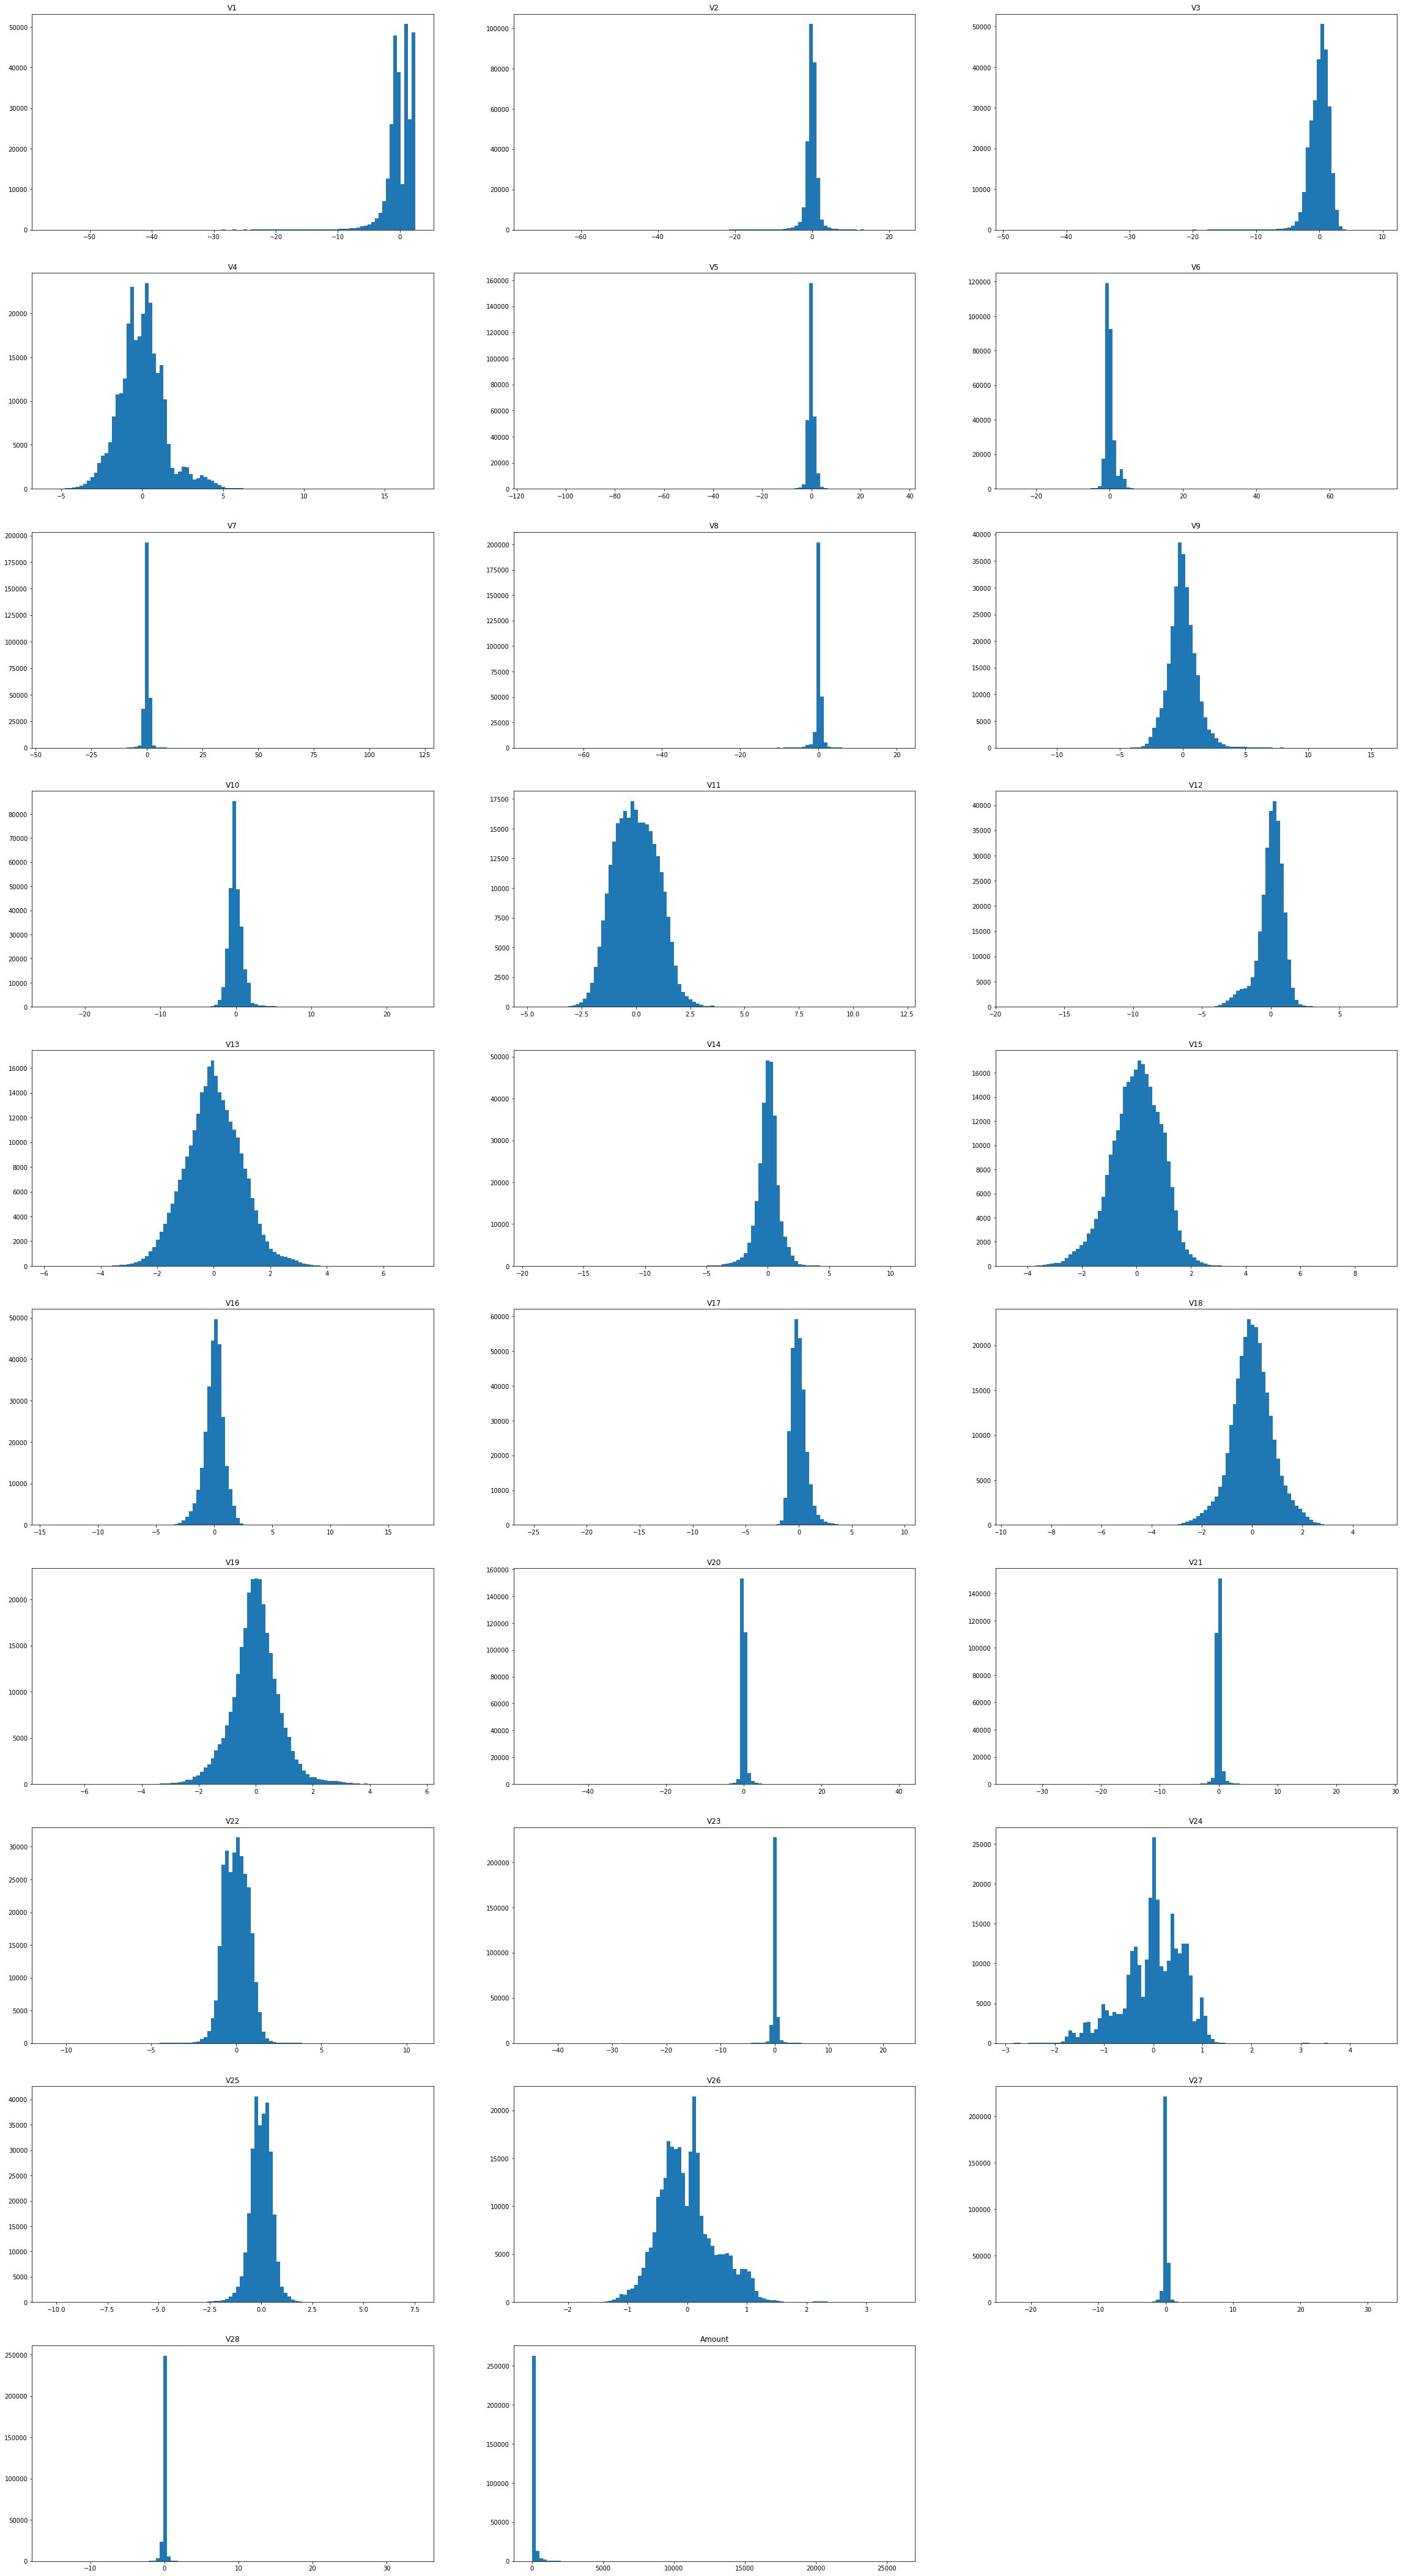

In [19]:
# Plot the histogram of a variable from the dataset to see the skewness
variable_1 = X.columns
plt.figure(figsize=(40,100))
for i in range(len(variable_1)):
    plt.subplot(13,3,i+1)
    plt.hist(X[variable_1[i]],bins=100)
    plt.title(variable_1[i])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [21]:
# - Apply : preprocessing.PowerTransformer(copy = False) to fit & transform on the train data
from sklearn.preprocessing import PowerTransformer
power_transform = PowerTransformer(method = 'yeo-johnson')
data = power_transform.fit_transform(X_train)
X_train_transform = pd.DataFrame(data, columns = X_train.columns)
X_train_transform.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.598470 -0.076635  0.414364  0.017924 -0.150960  0.345395 -0.423005   
1  1.445565 -0.134373 -0.902690  0.208193  0.136115 -0.409005  0.073299   
2  0.843049 -0.987411 -0.652970 -1.919788  0.423178  2.278265 -1.478071   
3 -0.326321  0.805913 -0.366669 -0.296532  0.512231 -0.805682  0.794658   
4  0.566536 -0.144094  0.637616  0.445581 -0.564414  0.053504 -0.482081   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.053042  1.152344 -0.468132  2.711653 -1.044975  2.490859  1.988839   
1 -0.252318  0.277355  0.257359  0.627815  1.546125  0.529601  0.317871   
2  0.853644 -1.629738  1.315947 -0.265160 -1.117650  0.627704 -0.502524   
3 -0.185940  0.130993 -0.479100 -0.135555  0.007221  0.121092 -1.148253   
4  0.184401  0.269297  0.107031  1.543871  0.577842 -0.847218  0.455308   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.192412 -0.153792  0.752506 -0.799254 -0.752043 -0.142787 -0.217742   
1 -0.765034  0.165528 -0.886526 -0.347125  0.754667 -0.220963 -0.355324   
2  1.139137  0.141712 -0.192826  1.001148 -0.138704 -0.090662 -0.009865   
3 -0.307278  0.046717  0.670351 -0.599578 -0.610739  0.173877 -0.457294   
4  1.052225  0.485489 -0.496743 -0.071757 -0.563810 -0.222159  0.013937   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.215110  0.229615 -0.518220 -0.140181  1.711153 -0.180481 -0.027825   
1 -0.881595  0.418801 -0.841362 -0.510193  0.511993 -0.206056 -0.220886   
2  0.104342 -0.203779  1.917859  0.990486  0.014536  0.099397  0.107899   
3 -1.012077  0.252022  1.861162 -0.857357  0.288656  0.854371  0.473371   
4 -0.092414  0.225649  0.287704 -0.037162  0.529867 -0.020486  0.051746   

     Amount  
0 -1.853467  
1 -1.446662  
2  0.706491  
3 -1.576187  
4 -0.715547

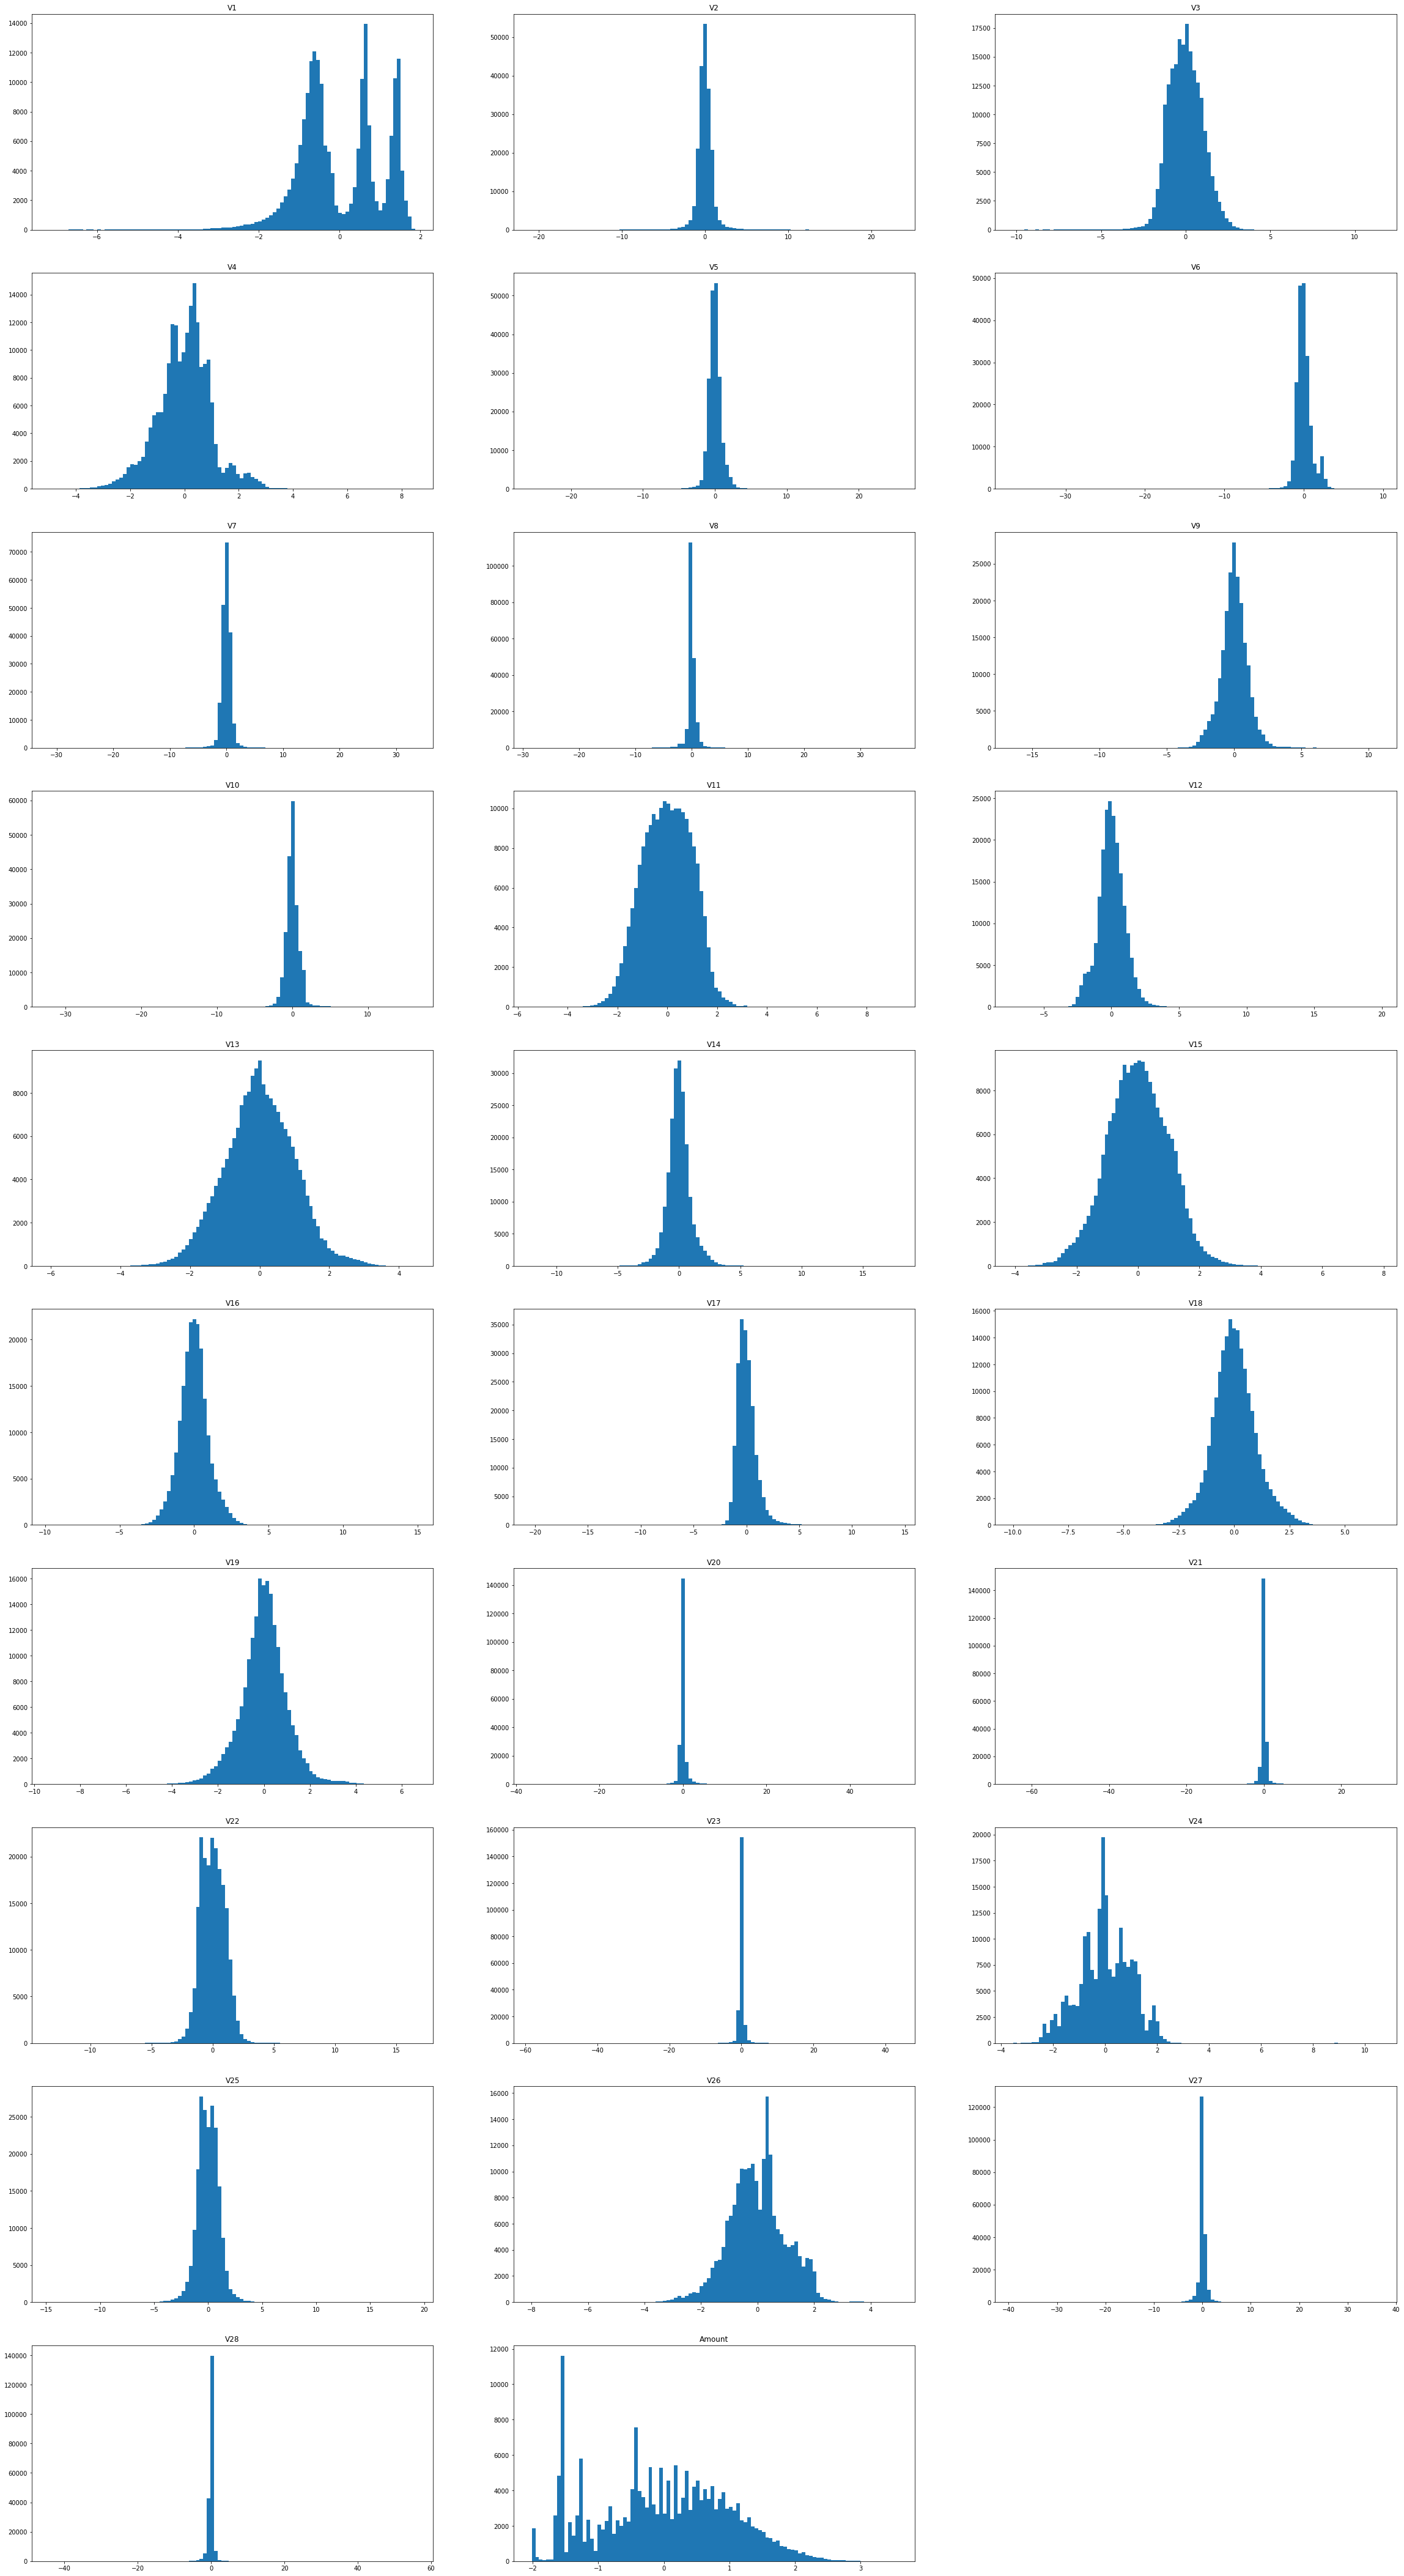

In [ ]:
# Plot the histogram of a variable from the dataset again to see the result 
variable_1_recheck = X_train_transform.columns
plt.figure(figsize=(40,100))
for i in range(len(variable_1_recheck)):
    plt.subplot(13,3,i+1)
    plt.hist(X_train_transform[variable_1_recheck[i]], bins = 100)
    plt.title(variable_1_recheck[i])

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform on the test data
from sklearn.preprocessing import PowerTransformer
power_transform = PowerTransformer(method = 'yeo-johnson')
data = power_transform.fit_transform(X_test)
X_test_transform = pd.DataFrame(data, columns = X_test.columns)
X_test_transform.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.660741 -0.236314 -0.556225  0.367087  1.314647  2.522490 -0.695950   
1  1.407403 -0.143922 -1.737741 -0.028438  1.998178  2.154353 -0.501390   
2  0.099948 -0.948055  0.537768  0.343777 -1.018279  0.399323 -0.379923   
3  1.521704 -0.162028 -1.043619  0.192975  0.232455 -0.341452  0.103279   
4  0.117239  1.062374 -1.458990  3.097543  1.604610 -0.305605  0.826895   

         V8        V9       V10       V11       V12       V13       V14  \
0  1.042763  0.704690 -0.098898 -0.826641  0.303018 -0.247906 -0.366587   
1  0.714420  1.689037 -0.957636  1.095481 -2.010350  1.252297 -0.137902   
2  0.225946  0.951683 -0.375568  1.112198  1.041042 -1.102676 -0.136702   
3 -0.279820  0.649089  0.111951 -1.759346 -0.318000 -0.195351  0.266354   
4 -0.314232 -1.926597  0.875016 -0.241693 -1.090476  0.484032 -2.508929   

        V15       V16       V17       V18       V19       V20       V21  \
0 -0.857231 -0.297871 -0.439517 -0.012793  0.594276 -0.084823 -0.218024   
1 -0.826988 -0.051867  2.427993  0.383049 -0.547328 -0.201618 -0.237385   
2 -0.710890 -0.286841  0.343412 -0.584766  0.293951  0.570909  0.051755   
3  0.183166  0.124012 -0.725605 -0.680976  0.588482 -0.304879 -0.477856   
4  0.192774  0.358668  3.425368  1.322198  0.825710  0.319942 -0.033640   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.415071 -0.227029  1.944354  1.697341 -0.525539  0.140887  0.069042   
1 -0.144919  0.129501  0.966430  0.158168  1.260993 -0.121818 -0.117798   
2 -0.544236 -0.223947  0.411191 -0.298683  1.736373 -0.204593  0.173664   
3 -1.235030  0.355626 -1.641183 -0.395418  0.628784 -0.176618 -0.208604   
4  0.353725  0.620293  0.496779 -0.664272  0.962526  0.403107  0.028876   

     Amount  
0 -1.265020  
1 -0.625708  
2  1.517493  
3 -1.538134  
4  0.216662

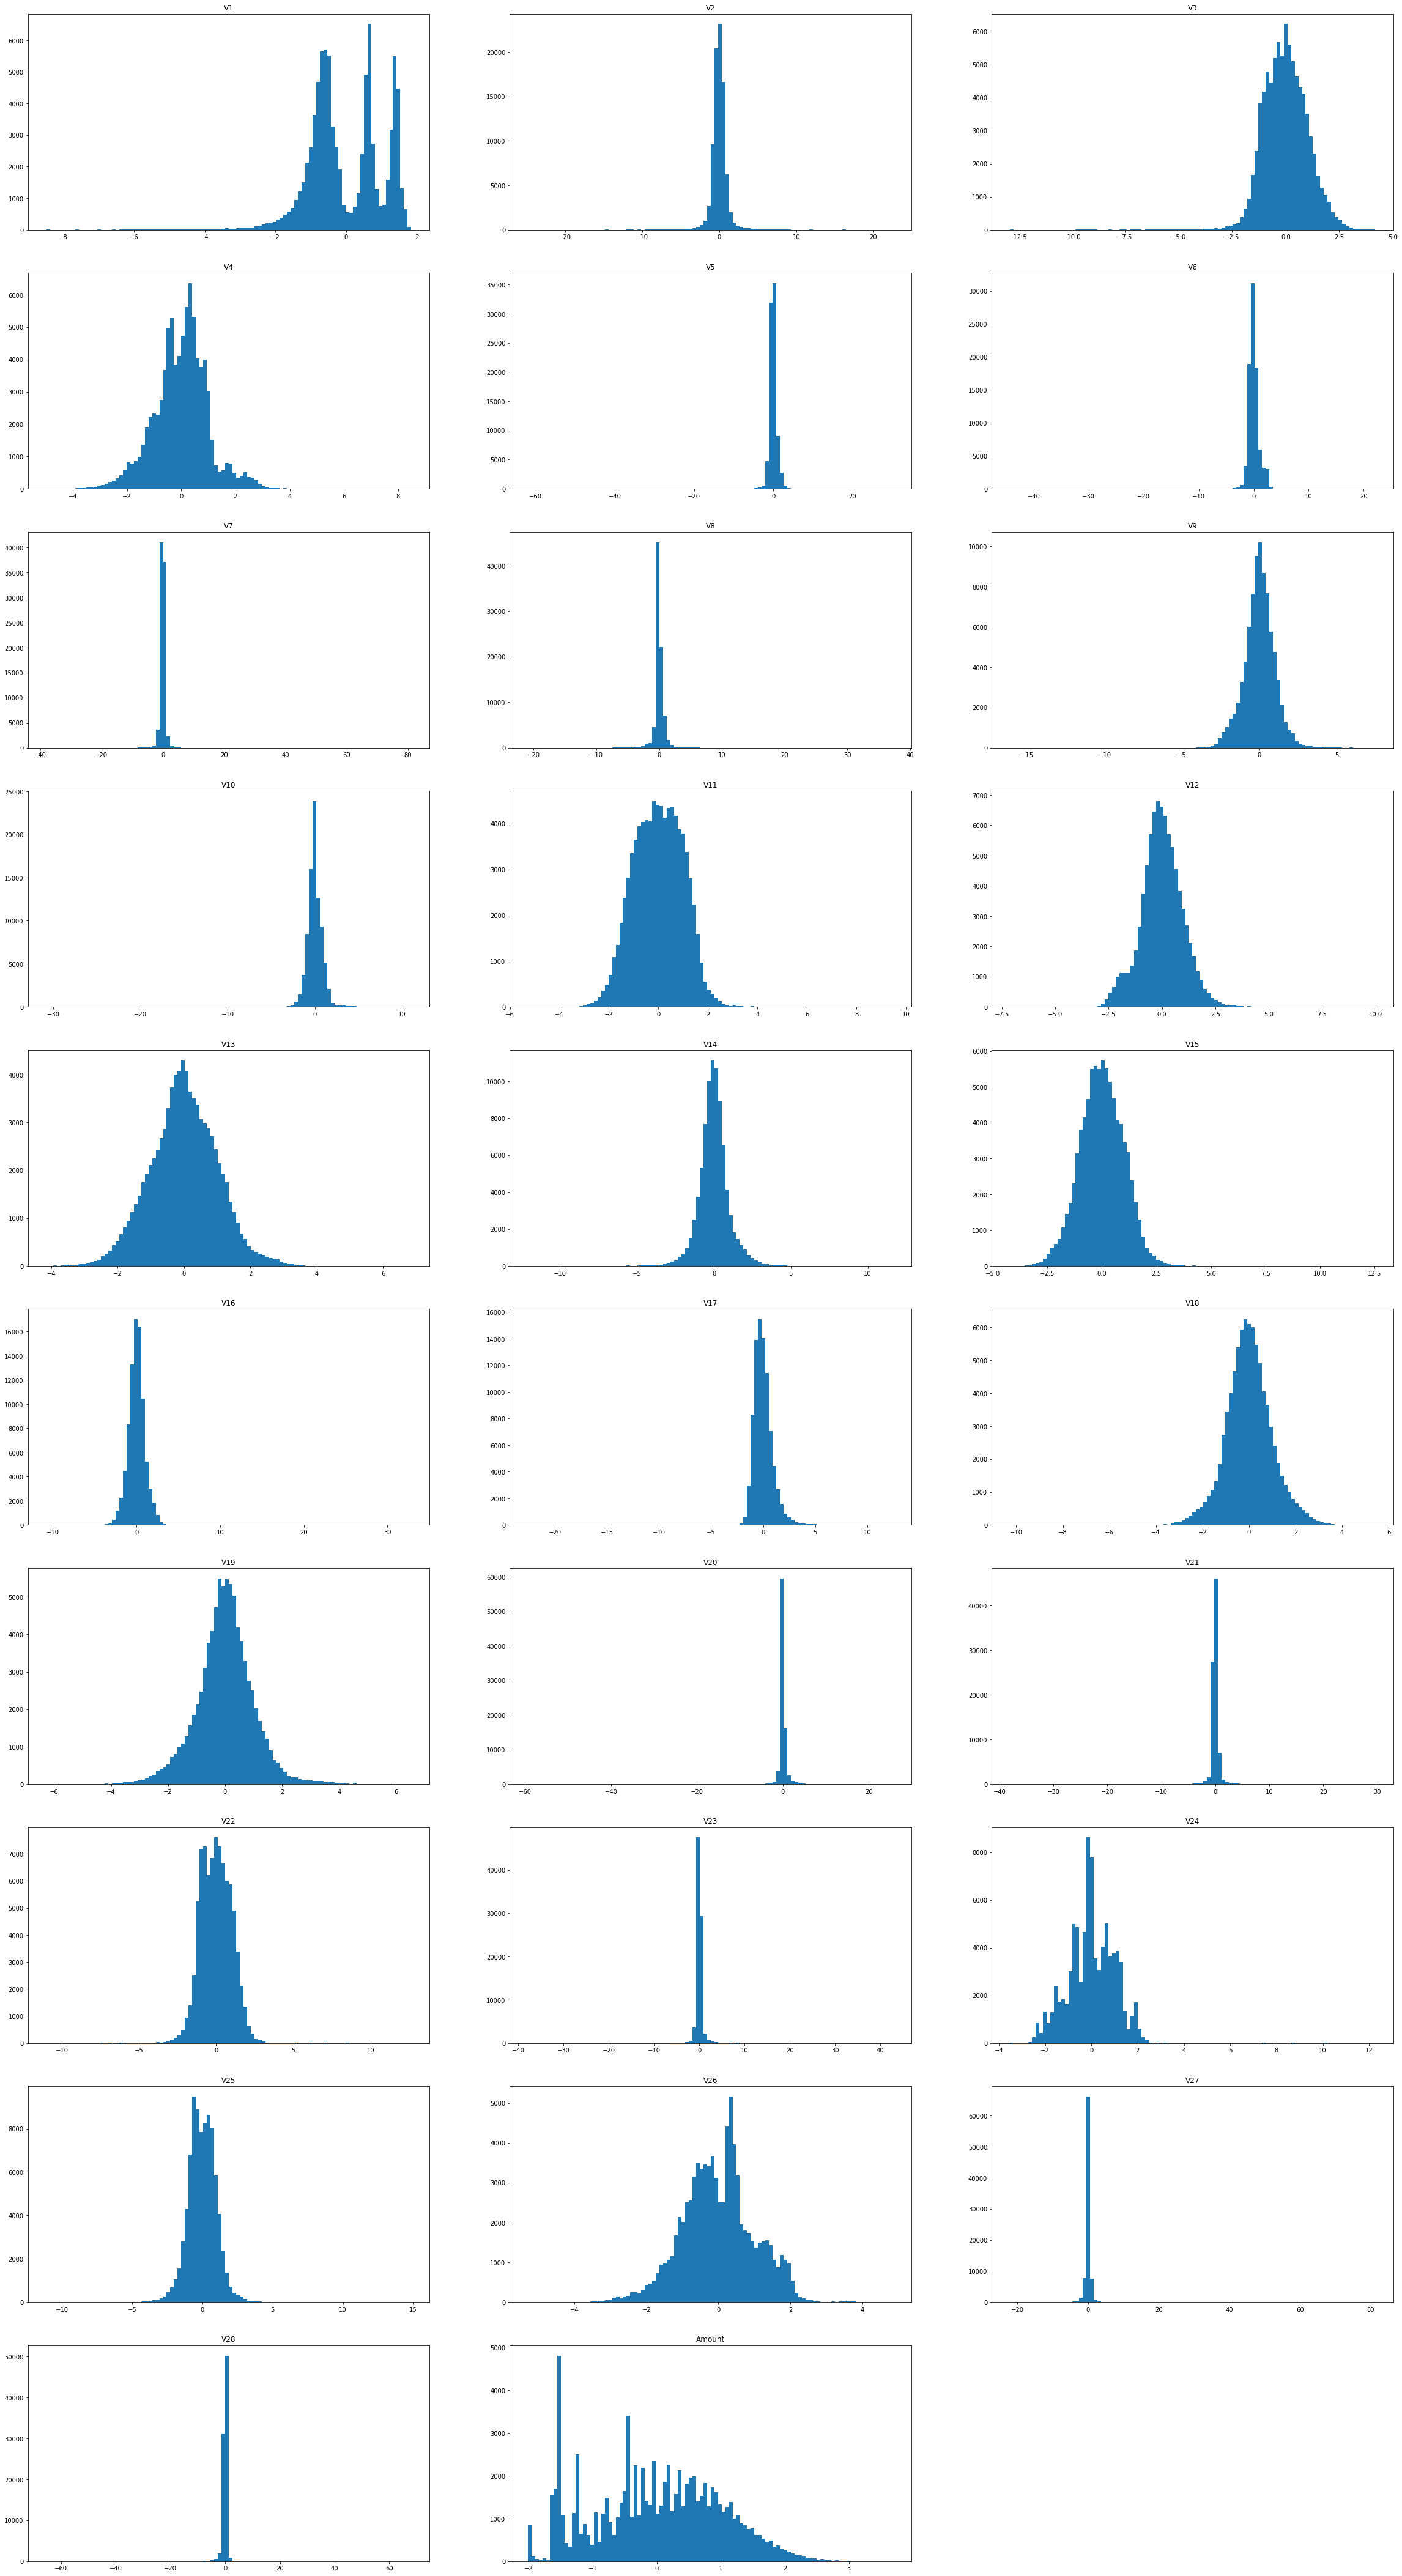

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
variable_1_recheck = X_test_transform.columns
plt.figure(figsize = (40,100))
for i in range(len(variable_1_recheck)):
    plt.subplot(13,3,i+1)
    plt.hist(X_test_transform[variable_1_recheck[i]],bins=100)
    plt.title(variable_1_recheck[i])

## Model Building with imbalanced data
- Build different models on the imbalanced dataset and see the result

### Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(random_state = 42)
logistic_regression.fit(X_train_transform, y_train)
y_pred = logistic_regression.predict(X_train_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.9991807403766253
Recall/Sensitivity: 0.6549295774647887
Precision: 0.8157894736842105


In [ ]:
# perform hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
pipes = Pipeline([('log_reg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'], 'logreg__solver' : ['liblinear']}
# perform cross validation
logistic_model = GridSearchCV(estimator = pipes , cv = folds, param_grid = params, scoring  = 'recall')

In [ ]:
logistic_model.fit(X_train_transform, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                      

In [ ]:
# Get the model score based on the hyperparamters tunning
logistic_model.best_score_

0.7057142857142857

In [ ]:
logistic_model.best_params_

{'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

In [ ]:
y_pred = logistic_model.predict(X_train_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9991807403766253
Recall/Sensitivity: 0.6549295774647887


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic_regression = LogisticRegression(random_state = 42, C = 0.5 , penalty = 'l1', solver = 'liblinear')
logistic_regression.fit(X_train_transform, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Method to print the confusion matrix 
def conf_matrix(y_true, y_pred):
  from sklearn.metrics import confusion_matrix
  confusion = confusion_matrix(y_test, y_pred)
  TP = confusion[1,1] 
  TN = confusion[0,0] 
  FP = confusion[0,1]
  FN = confusion[1,0] 
  print('Misclassification Rate: {0}'.format((FP+FN)/ (FP+FN+TP+TN)))
  print("Negative Predictive Power:", TN/(TN+FP))
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))
  print("Roc Auc Score:",metrics.roc_auc_score(y_test, y_pred))

In [ ]:
# Method to plot ROC-AUC curve 
from sklearn import metrics 
def draw_roc(actual, probs):
  fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
  auc_score = metrics.roc_auc_score( actual, probs )
  plt.figure(figsize=(5, 5))
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
  return fpr, tpr, thresholds

In [ ]:
# Method to find the optimal-threshold and use it to predict fraud for the model
from sklearn.metrics import confusion_matrix 
import seaborn as sns
sns.set()
def optimal_cutoff(model_ref, cut_off_index = None):
    x_test = X_test_transform
    y_pred_prob = model_ref.predict_proba(x_test)[:,1:].reshape(-1)
    model_data_final = pd.DataFrame({'Actual':y_test})
    model_data_final['Probability'] = y_pred_prob
    model_data_final['Predicted'] = model_data_final['Probability'].map(lambda x : 1 if x > 0.5 else 0)
    print("Using the default Threshold Cutoff as 0.5")
    print(model_data_final.head())
    print('\n'*3)
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        model_data_final[i] =  model_data_final.Probability.map(lambda x: 1 if x > i else 0)
    print("Probability at Different Thereshold")
    print(model_data_final.head())
    print('\n'*3)
    cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = confusion_matrix(model_data_final.Actual, model_data_final[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] = [i ,accuracy,sensi,speci]
    print("Checking the Accuracy, Sensitivity and Specificity for different Threshold")
    print(cutoff_df)
    print('\n'*3)
    cutoff_df.plot.line(x = 'cutoff', y = ['accuracy','sensi','speci'])
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Checking the Accuracy, Sensitivity Specificity Curve')
    plt.show()
    print('\n'*3)
    if cut_off_index == None:
          cut_off_index = float(input('Enter the Ideal Cutoff Index: '))
    cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
    plt.vlines(cut_off_index, ymax=1, ymin=0, colors='r', linestyles='--')
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Optimal Cut-off as :' + str(cut_off_index))
    plt.show()
    model_data_final['Opt Cutoff'] = model_data_final['Probability'].map(lambda x : 1 if x > cut_off_index else 0)
    print('\n'*3)
    draw_roc(y_test, model_data_final['Opt Cutoff'])
    print('\n'*3)
    conf_matrix(y_test, model_data_final['Opt Cutoff'])
    print('\n'*3)    
    print('Final predicted dataset using the optimal cutoff threshold')
    print(model_data_final.head(10))

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.000349          0
154704       0     0.001075          0
67247        0     0.000117          0
251657       0     0.000123          0
201903       0     0.041013          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.000349          0    1    0    0    0    0    0    0   
154704       0     0.001075          0    1    0    0    0    0    0    0   
67247        0     0.000117          0    1    0    0    0    0    0    0   
251657       0     0.000123          0    1    0    0    0    0    0    0   
201903       0     0.041013          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

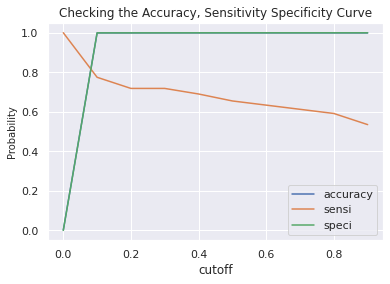





Enter the Ideal Cutoff Index: 0.1


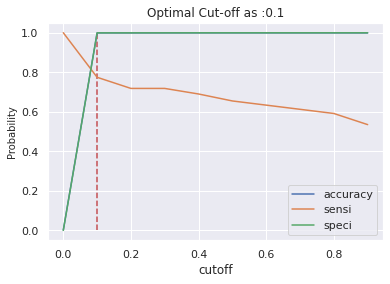

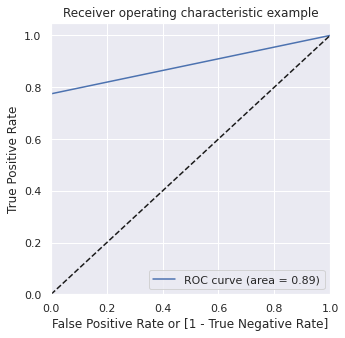





Misclassification Rate: 0.0009362967124281685
Negative Predictive Power: 0.9994372867844457
Accuracy: 0.9990637032875719
Precision: 0.6962025316455697
Recall: 0.7746478873239436
Roc Auc Score: 0.8870425870541946




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.000349          0    1    0    0    0    0    0    0   
154704       0     0.001075          0    1    0    0    0    0    0    0   
67247        0     0.000117          0    1    0    0    0    0    0    0   
251657       0     0.000123          0    1    0    0    0    0    0    0   
201903       0     0.041013          0    1    0    0    0    0    0    0   
6079         0     0.000059          0    1    0    0    0    0    0    0   
270936       0     0.000046          0    1    0    0    0    0    0    0   
40673        0     0.000207          0    1    0    0    0    0    0    0   
143209       0     0.000056 

In [ ]:
#print the optimum value of hyperparameters
optimal_cutoff(logistic_regression, cut_off_index = None)

### Similarly exploring other algorithms by building models like:
- KNN
- SVM
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(X_train_transform, y_train)
y_pred = knn_model.predict(X_test)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9991105181231933
Recall/Sensitivity: 0.6690140845070423
Precision: 0.7661290322580645
Roc_Auc_score: 0.8343370559696557


In [ ]:
# perform hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
knn_model = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
from sklearn.model_selection import GridSearchCV
# perform cross validation
knn_model_1 = GridSearchCV(estimator = knn_model , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
knn_model_1.fit(X_train_transform, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 12.6min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 16.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1, param_grid={'n_neighbors': [3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
knn_model_1.best_params_

{'n_neighbors': 3}

In [ ]:
knn_model = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
knn_model.fit(X_train_transform, y_train)
y_pred = knn_model.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9994265182636377
Recall/Sensitivity: 0.7676056338028169
Precision: 0.872
Roc_Auc_score: 0.8837090313654827


#### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model_1 = RandomForestClassifier(random_state=42)
randomforest_model_1.fit(X_train_transform, y_train)
y_pred = randomforest_model_1.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9993914071369217
Recall/Sensitivity: 0.7464788732394366
Precision: 0.8688524590163934
Roc_Auc_score: 0.8731456510837926


In [ ]:
# perform hyperparameter tuning
randomforest_class = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6], 'min_samples_split' : [6, 10]}
from sklearn.model_selection import GridSearchCV
# perform cross validation
randomforest_model_2 = GridSearchCV(estimator = randomforest_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [ ]:
randomforest_model_2.fit(X_train_transform, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 34.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [ ]:
# Get the model score based on the hyperparamters tunning
randomforest_model_2.best_score_

0.7771428571428572

In [ ]:
randomforest_model_2.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 6}

In [ ]:
y_pred = randomforest_model_2.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9993211848834895
Recall/Sensitivity: 0.7183098591549296
Precision: 0.85
Roc_Auc_score: 0.8590494208495483


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_tuned_model = RandomForestClassifier(criterion = 'entropy', max_depth= 6, min_samples_leaf=1, min_samples_split=6)
randomforest_tuned_model.fit(X_train_transform, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.000081          0
154704       0     0.000690          0
67247        0     0.000089          0
251657       0     0.000084          0
201903       0     0.008829          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.000081          0    1    0    0    0    0    0    0   
154704       0     0.000690          0    1    0    0    0    0    0    0   
67247        0     0.000089          0    1    0    0    0    0    0    0   
251657       0     0.000084          0    1    0    0    0    0    0    0   
201903       0     0.008829          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

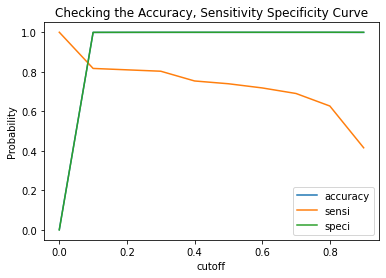





Enter the Ideal Cutoff Index: 0.1


<Figure size 720x576 with 0 Axes>

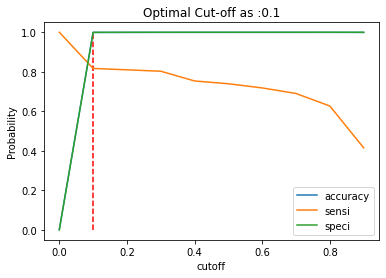

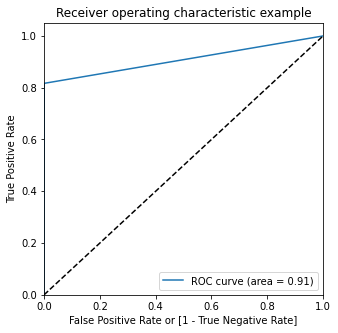





Misclassification Rate: 0.0008777781679014079
Negative Predictive Power: 0.9994255635924549
Accuracy: 0.9991222218320986
Precision: 0.703030303030303
Recall: 0.8169014084507042
Roc Auc Score: 0.9081634860215796




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.000081          0    1    0    0    0    0    0    0   
154704       0     0.000690          0    1    0    0    0    0    0    0   
67247        0     0.000089          0    1    0    0    0    0    0    0   
251657       0     0.000084          0    1    0    0    0    0    0    0   
201903       0     0.008829          0    1    0    0    0    0    0    0   
6079         0     0.000133          0    1    0    0    0    0    0    0   
270936       0     0.000106          0    1    0    0    0    0    0    0   
40673        0     0.000104          0    1    0    0    0    0    0    0   
143209       0     0.000728  

In [ ]:
#print the optimum value of hyperparameters
optimal_cutoff(randomforest_tuned_model, cut_off_index = None)

#### SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',random_state=42) 
clf.fit(X_train_transform, y_train)
y_pred = clf.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9992509626300574
Recall/Sensitivity: 0.6197183098591549
Precision: 0.8979591836734694
Roc_Auc_score: 0.8098005389696239


In [ ]:
# perform hyperparameter tuning
from sklearn import svm
svm_model = svm.SVC(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'kernel' :['rbf','polynomial','sigmoid'],'C':[0.001,0.01,0.1]}
from sklearn.model_selection import GridSearchCV
# perform cross validation
svm_model = GridSearchCV(estimator = svm_model , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
svm_model.fit(X_train_transform, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 65.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1],
                         'kernel': ['rbf', 'polynomial', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
svm_model.best_params_

{'C': 0.1, 'kernel': 'sigmoid'}

In [ ]:
# Get the model score based on the hyperparamters tunning
svm_model.best_score_

0.6457142857142857

In [ ]:
svm_model = svm.SVC(kernel='sigmoid' ,C = 0.1,random_state=42)
svm_model.fit(X_train_transform, y_train)
y_pred = svm_model.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9988530365272755
Recall/Sensitivity: 0.5915492957746479
Precision: 0.6774193548387096
Roc_Auc_score: 0.7955401840475097


#### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state = 42,tree_method = 'gpu_hist') 
xgboost_model.fit(X_train_transform, y_train)
y_pred = xgboost_model.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9993445923013002
Recall/Sensitivity: 0.7605633802816901
Precision: 0.8307692307692308
Roc_Auc_score: 0.8801527350289472


In [ ]:
# perform hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
xgboost_model = XGBClassifier(random_state = 42,tree_method = 'gpu_hist')
folds = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 42)
params = {'kernel' :['linear','rbf','polynomial','sigmoid'],'C':[0.001,0.01,0.1,1]}
from sklearn.model_selection import GridSearchCV
# perform cross validation
xgboost_model_1 = GridSearchCV(estimator = xgboost_model , cv = folds, param_grid = params, scoring  = 'recall',n_jobs = -1, verbose = 1)
xgboost_model_1.fit(X_train_transform, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   32.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='gpu_hist',
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1

In [ ]:
xgboost_model_1.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [ ]:
# Get the model score based on the hyperparamters tunning
xgboost_model_1.best_score_

0.7799999999999999

In [ ]:
y_pred = xgboost_model_1.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9994733330992591
Recall/Sensitivity: 0.7605633802816901
Precision: 0.907563025210084
Roc_Auc_score: 0.8802172125848959


In [ ]:
xgboost_model = XGBClassifier(random_state = 42,learning_rate = 0.1, max_depth = 5, n_estimators = 140,tree_model = 'gpu_hist')
xgboost_model.fit(X_train_transform, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_model='gpu_hist', verbosity=1)

In [ ]:
# Method to find the optimal-threshold of xgboost and use it to predict fraud for the model
def optimal_cutoff_xgboost(model_ref, cut_off_index = None):
    x_test = X_test_transform.values
    y_pred_prob = model_ref.predict_proba(x_test)[:,1:].reshape(-1)
    model_data_final = pd.DataFrame({'Actual':y_test})
    model_data_final['Probability'] = y_pred_prob
    model_data_final['Predicted'] = model_data_final['Probability'].map(lambda x : 1 if x > 0.5 else 0)
    print("Using the default Threshold Cutoff as 0.5")
    print(model_data_final.head())
    print('\n'*3)
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        model_data_final[i] = model_data_final.Probability.map(lambda x: 1 if x > i else 0)
    print("Probability at Different Thereshold")
    print(model_data_final.head())
    print('\n'*3)
    cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = confusion_matrix(model_data_final.Actual, model_data_final[i])
        total1 = sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print("Checking the Accuracy, Sensitivity and Specificity for different Threshold")
    print(cutoff_df)
    print('\n'*3)
    plt.figure(figsize=(10,8))
    cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Checking the Accuracy, Sensitivity Specificity Curve')
    plt.show()
    print('\n'*3)
    if cut_off_index == None:
          cut_off_index = float(input('Enter the Ideal Cutoff Index: '))
    plt.figure(figsize=(10,8))
    cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
    plt.vlines(cut_off_index, ymax=1, ymin=0, colors='r', linestyles='--')
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Optimal Cut-off as :' + str(cut_off_index))
    plt.show()
    model_data_final['Opt Cutoff'] = model_data_final['Probability'].map(lambda x : 1 if x > cut_off_index else 0)
    print('\n'*3)
    draw_roc(y_test, model_data_final['Opt Cutoff'])
    print('\n'*3)
    conf_matrix(y_test, model_data_final['Opt Cutoff'])
    print('\n'*3)    
    print('Final predicted dataset using the optimal cutoff threshold')
    print(model_data_final.head(10))

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.000048          0
154704       0     0.000014          0
67247        0     0.000023          0
251657       0     0.000022          0
201903       0     0.002200          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.000048          0    1    0    0    0    0    0    0   
154704       0     0.000014          0    1    0    0    0    0    0    0   
67247        0     0.000023          0    1    0    0    0    0    0    0   
251657       0     0.000022          0    1    0    0    0    0    0    0   
201903       0     0.002200          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

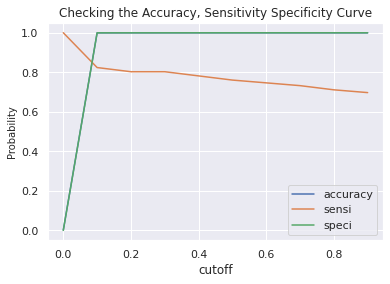





Enter the Ideal Cutoff Index: 0.1


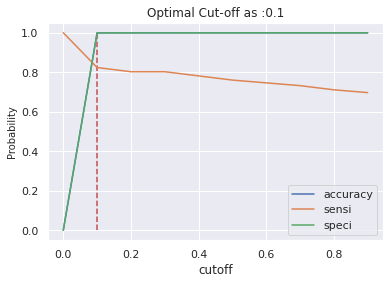

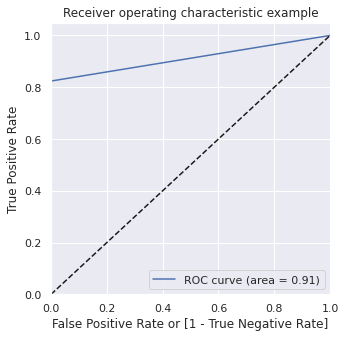





Misclassification Rate: 0.0006788151165104221
Negative Predictive Power: 0.9996131346643063
Accuracy: 0.9993211848834895
Precision: 0.78
Recall: 0.823943661971831
Roc Auc Score: 0.9117783983180686




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.000048          0    1    0    0    0    0    0    0   
154704       0     0.000014          0    1    0    0    0    0    0    0   
67247        0     0.000023          0    1    0    0    0    0    0    0   
251657       0     0.000022          0    1    0    0    0    0    0    0   
201903       0     0.002200          0    1    0    0    0    0    0    0   
6079         0     0.000054          0    1    0    0    0    0    0    0   
270936       0     0.000018          0    1    0    0    0    0    0    0   
40673        0     0.000052          0    1    0    0    0    0    0    0   
143209       0     0.000117          0    1

In [ ]:
#print the optimum value of hyperparameters
optimal_cutoff(xgboost_model, cut_off_index = None)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


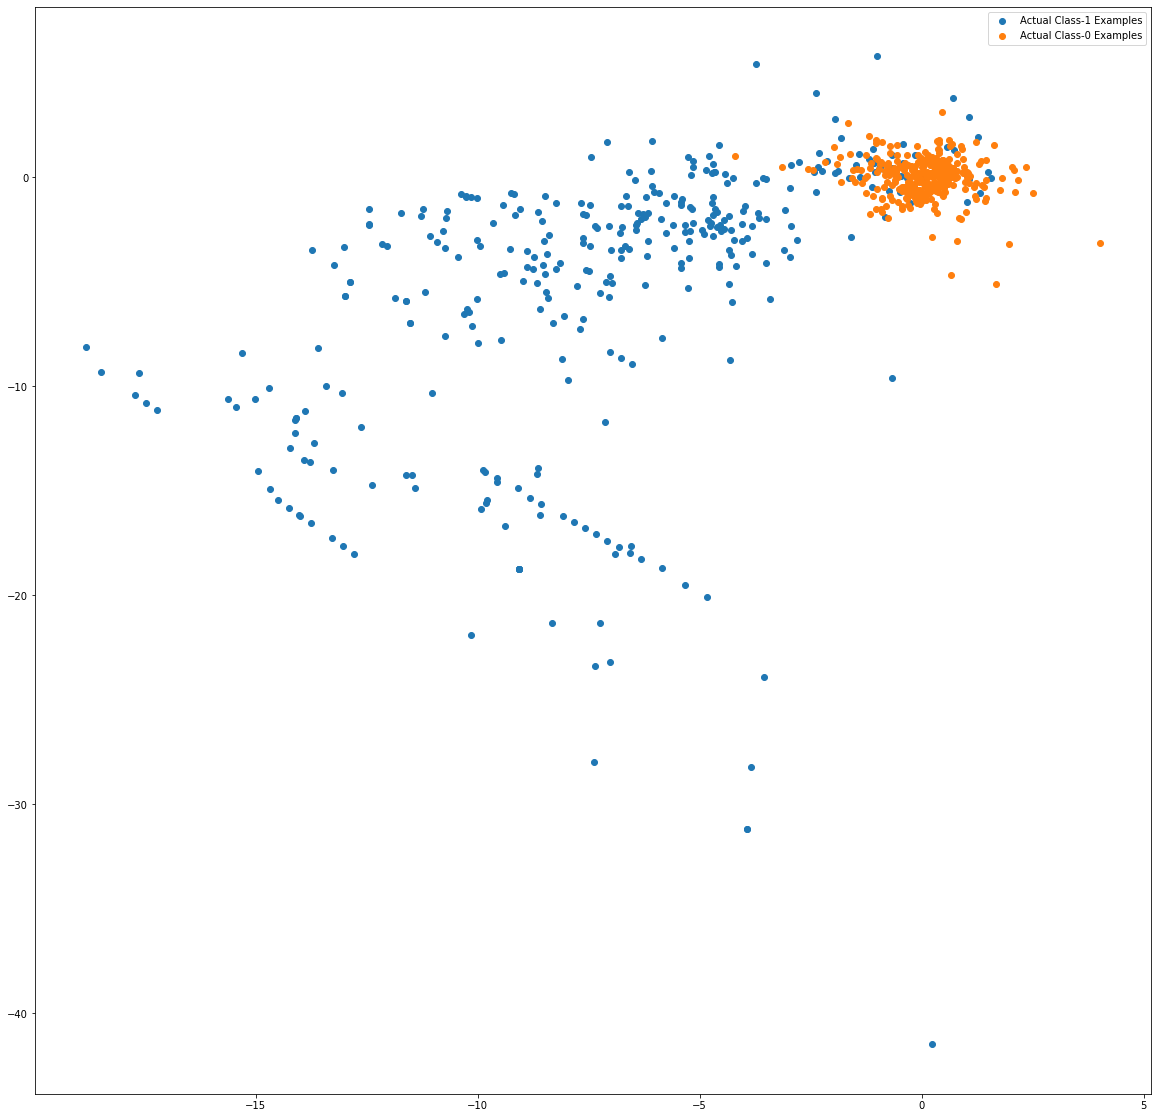

In [ ]:
var_imp = []
for i in xgboost_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgboost_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgboost_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgboost_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgboost_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgboost_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index], label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN
- Undersampling

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [ ]:
print('Before Upsampling, Class 0: {0}'.format(sum(y_train == 0)))
print('Before Upsampling, Class 1: {0}'.format(sum(y_train == 1)))

Before Upsampling,Class 0: 199014
Before Upsampling,Class 1: 350


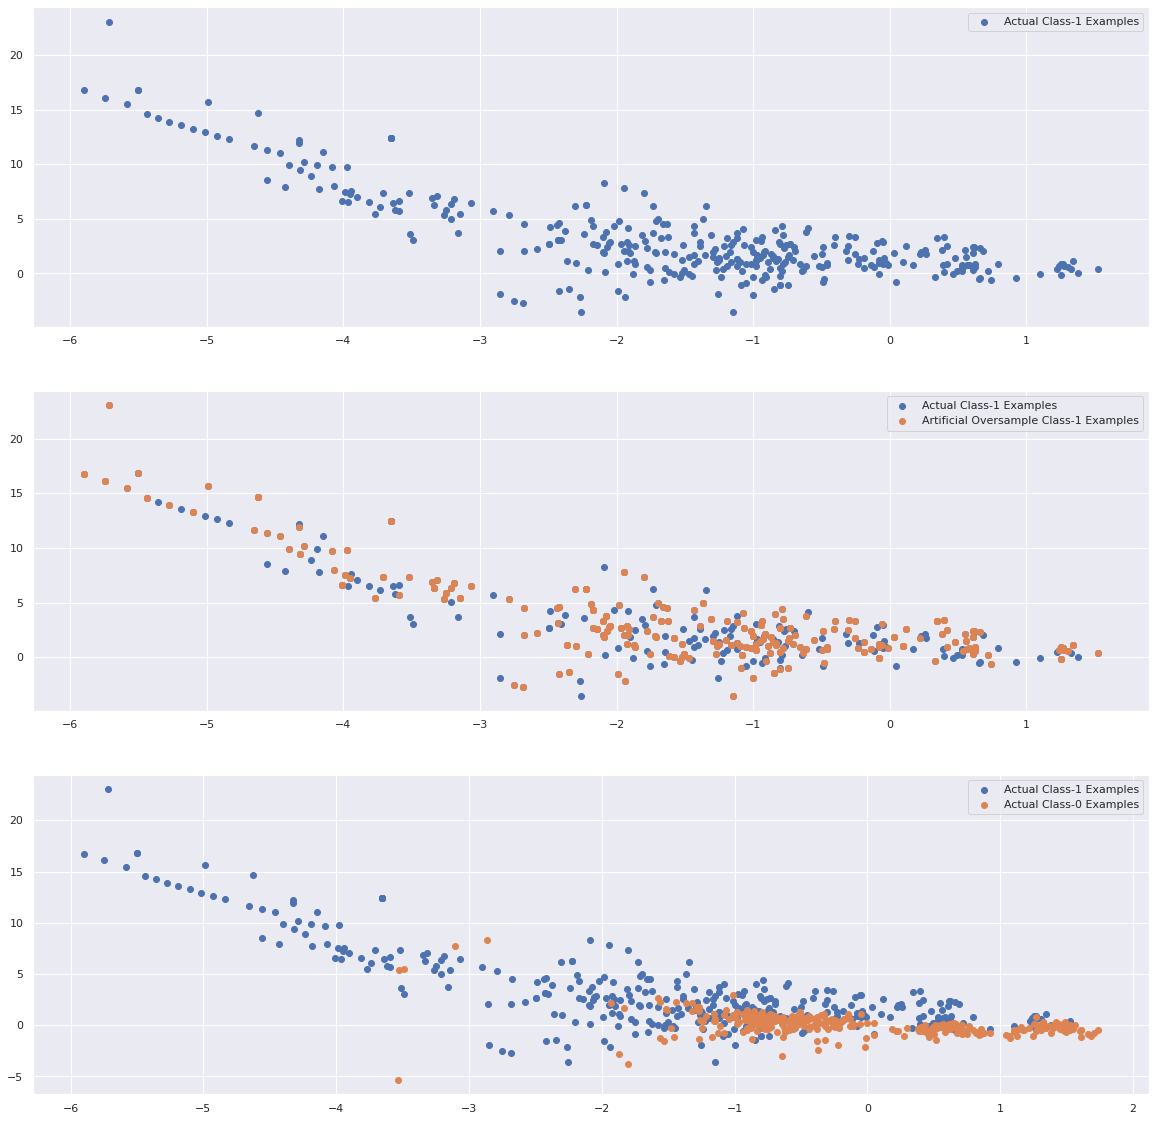

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler 

oversampling = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_over, y_over = oversampling.fit_resample(X_train_transform, y_train)
X_train_over, y_train_over = X_over, y_over
X_train_over_1 = X_train_over[X_train_transform.shape[0]:]

X_train_1 = X_train_transform.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_transform.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_over_1[:X_train_1.shape[0], 0], X_train_over_1[:X_train_1.shape[0], 1], label='Artificial Oversample Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print('After Oversampling, Class 0: {0}'.format(sum(y_over == 0)))
print('After Oversampling, Class 1: {0}'.format(sum(y_over == 1)))

After Oversampling, Class 0: 199014
After Oversampling, Class 1: 199014


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
# perform hyperparameter tuning
logistic_regression_over = LogisticRegression(random_state=42)
pipes = Pipeline([('log_reg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'], 'logreg__solver' : ['liblinear']}
# perform cross validation
logistic_model_over = GridSearchCV(estimator = pipes , cv = folds, param_grid = params, scoring  = 'recall')

In [ ]:
logistic_model_over.fit(X_over,y_over)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                      

In [ ]:
# Get the model score based on the hyperparamters tunning
logistic_model_over.best_score_

0.9245078149527648

In [ ]:
logistic_model_over.best_params_

{'logreg__C': 0.005, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

In [ ]:
y_pred = logistic_model_over.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9764638413913369
Recall/Sensitivity: 0.8873239436619719
Precision: 0.0594059405940594
Roc_Auc_score: 0.9319680878202475


In [ ]:
logistic_regression_over = LogisticRegression(random_state=42, C=0.005 , penalty='l1', solver = 'liblinear')
logistic_regression_over.fit(X_over, y_over)

LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.026966          0
154704       0     0.192094          0
67247        0     0.033142          0
251657       0     0.020475          0
201903       0     0.962326          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.026966          0    1    0    0    0    0    0    0   
154704       0     0.192094          0    1    1    0    0    0    0    0   
67247        0     0.033142          0    1    0    0    0    0    0    0   
251657       0     0.020475          0    1    0    0    0    0    0    0   
201903       0     0.962326          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    1  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

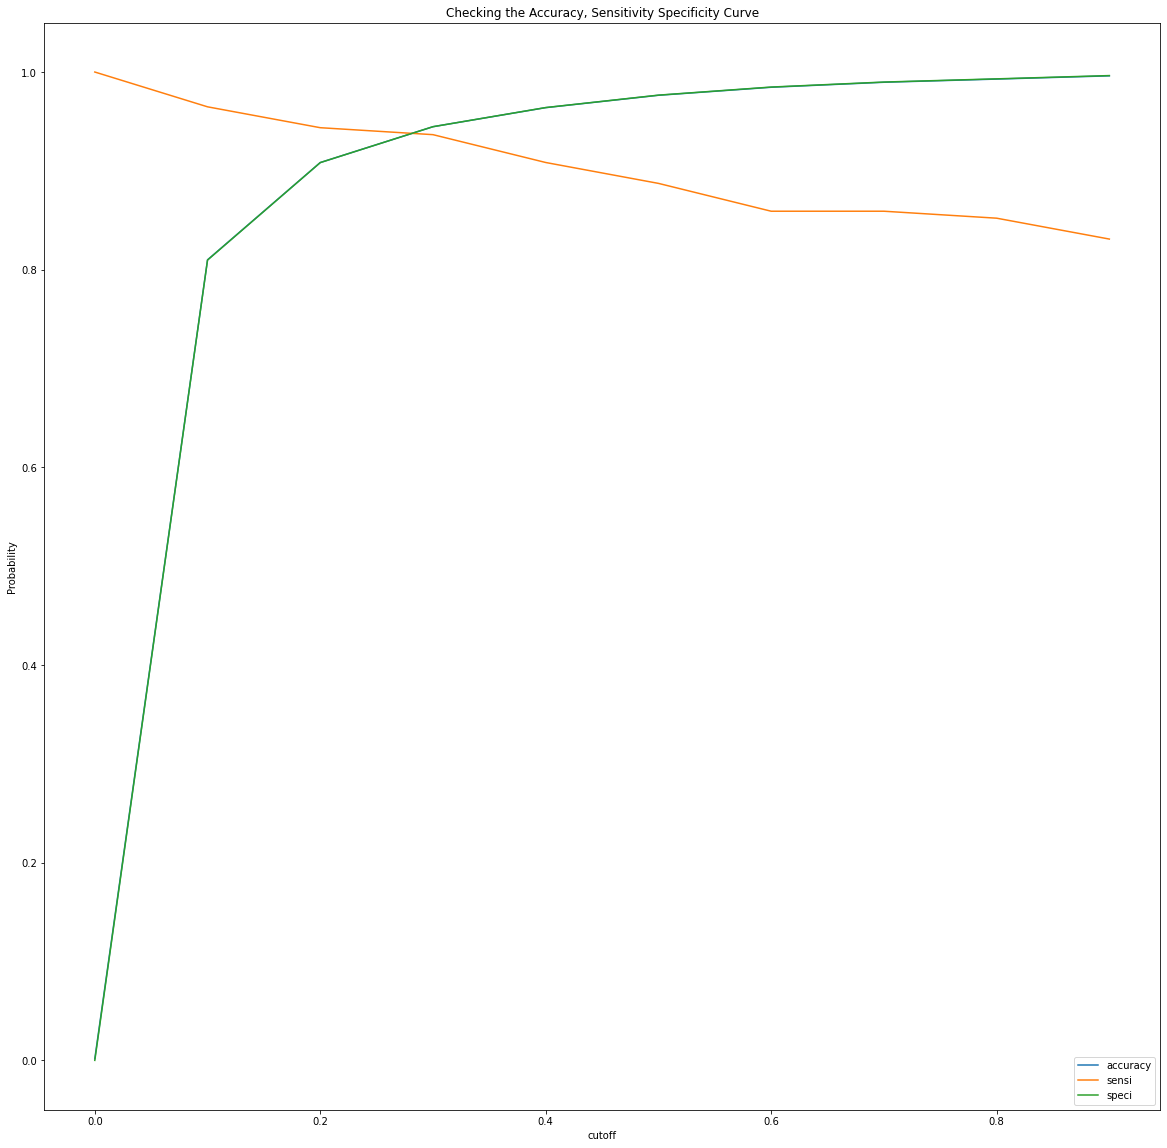





Enter the Ideal Cutoff Index: 0.28


<Figure size 720x576 with 0 Axes>

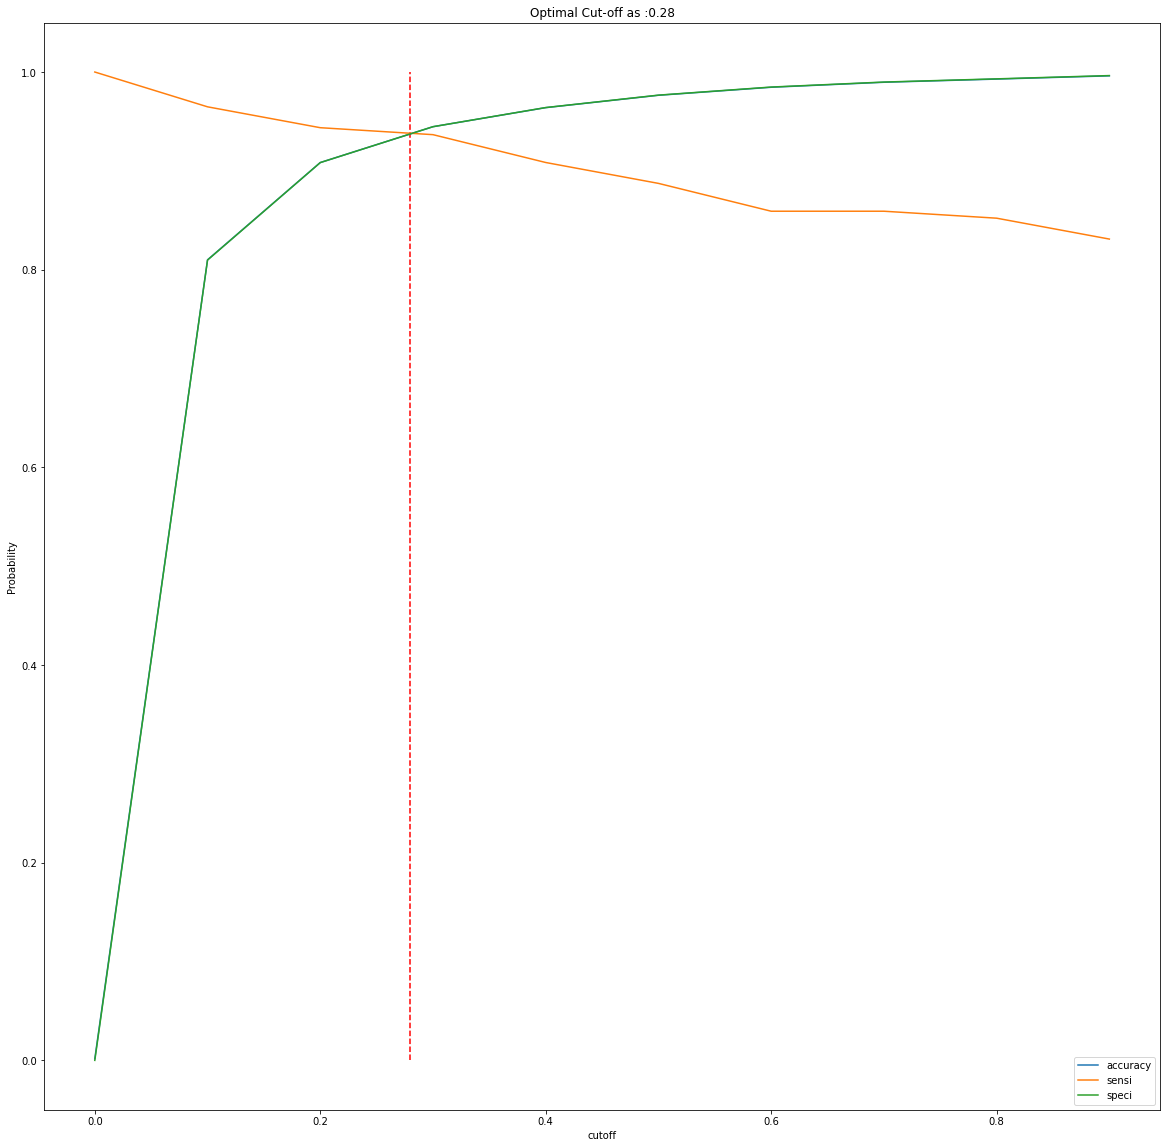

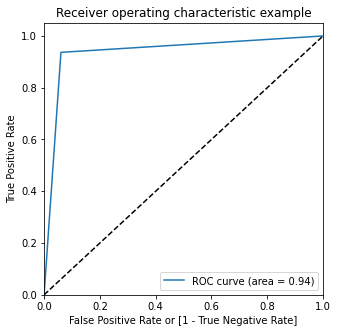





Misclassification Rate: 0.06043795278723828
Negative Predictive Power: 0.939566945287863
Accuracy: 0.9395620472127617
Precision: 0.02515128593040847
Recall: 0.9366197183098591
Roc Auc Score: 0.938093331798861




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.026966          0    1    0    0    0    0    0    0   
154704       0     0.192094          0    1    1    0    0    0    0    0   
67247        0     0.033142          0    1    0    0    0    0    0    0   
251657       0     0.020475          0    1    0    0    0    0    0    0   
201903       0     0.962326          1    1    1    1    1    1    1    1   
6079         0     0.028146          0    1    0    0    0    0    0    0   
270936       0     0.008895          0    1    0    0    0    0    0    0   
40673        0     0.044267          0    1    0    0    0    0    0    0   
143209       0     0.126758    

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(logistic_regression_over, cut_off_index = None)

### Random Forest for Oversampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# perform hyperparameter tuning
randomforest_clf_over = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6], 'min_samples_split' : [6, 10]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
randomforest_over = GridSearchCV(estimator = randomforest_clf_over , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [ ]:
randomforest_over.fit(X_over, y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 47.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [ ]:
# Get the model score based on the hyperparamters tunning
randomforest_over.best_score_

0.9527620840564003

In [ ]:
randomforest_over.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

In [ ]:
y_pred = randomforest_over.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9973900729141065
Recall/Sensitivity: 0.8169014084507042
Precision: 0.3706070287539936
Roc_Auc_score: 0.9072959698142667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_over_tuning = RandomForestClassifier(criterion = 'gini', max_depth= 6, min_samples_leaf=1, min_samples_split=6,warm_start=True) 
randomforest_over_tuning.fit(X_over, y_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=True)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.044208          0
154704       0     0.096296          0
67247        0     0.043431          0
251657       0     0.040824          0
201903       0     0.453456          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.044208          0    1    0    0    0    0    0    0   
154704       0     0.096296          0    1    0    0    0    0    0    0   
67247        0     0.043431          0    1    0    0    0    0    0    0   
251657       0     0.040824          0    1    0    0    0    0    0    0   
201903       0     0.453456          0    1    1    1    1    1    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

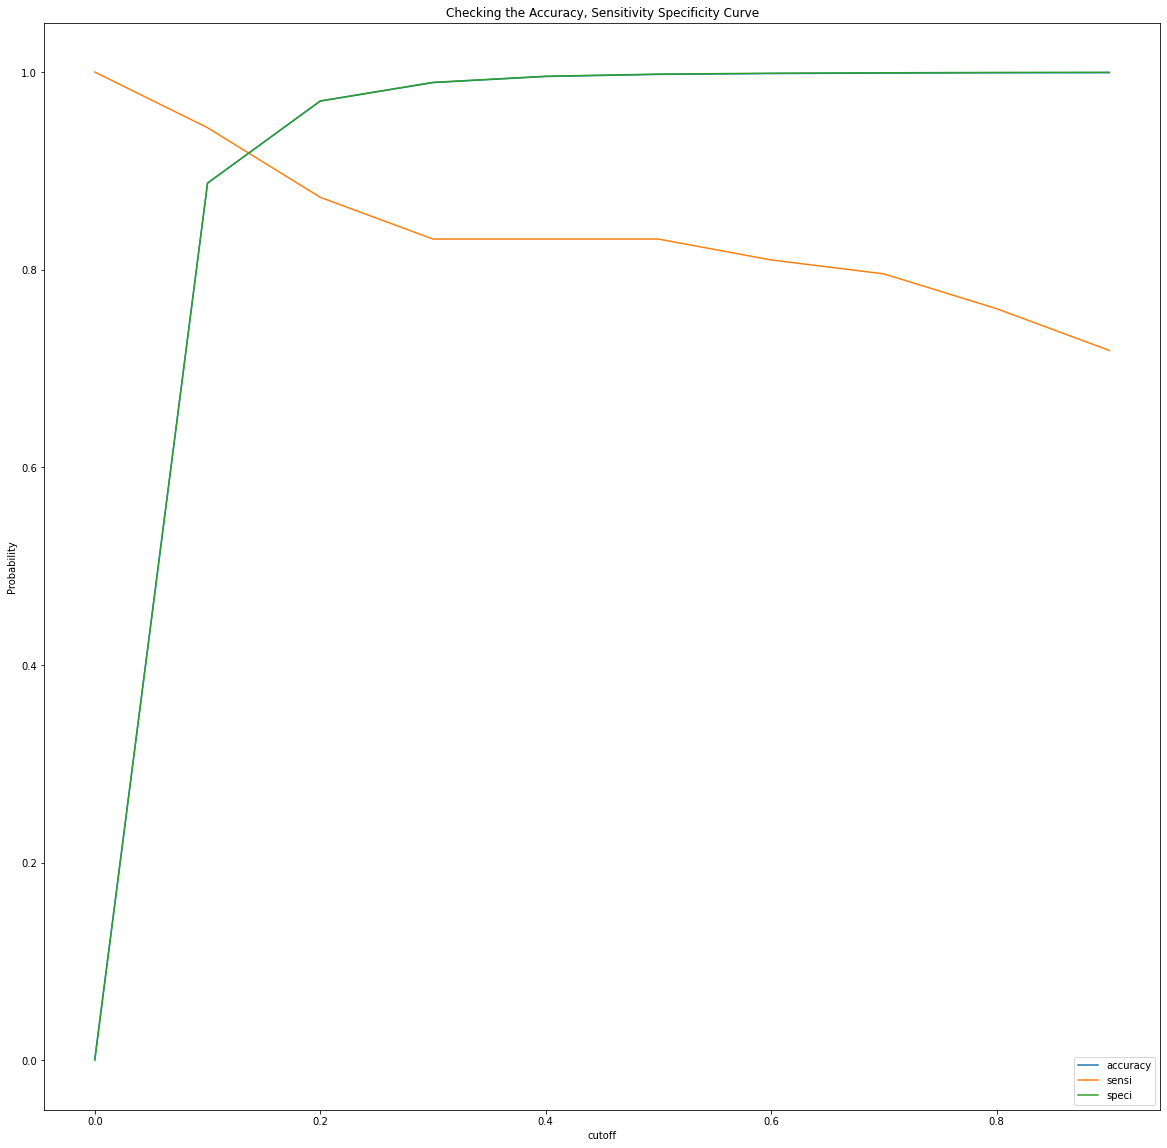





Enter the Ideal Cutoff Index: 0.14


<Figure size 720x576 with 0 Axes>

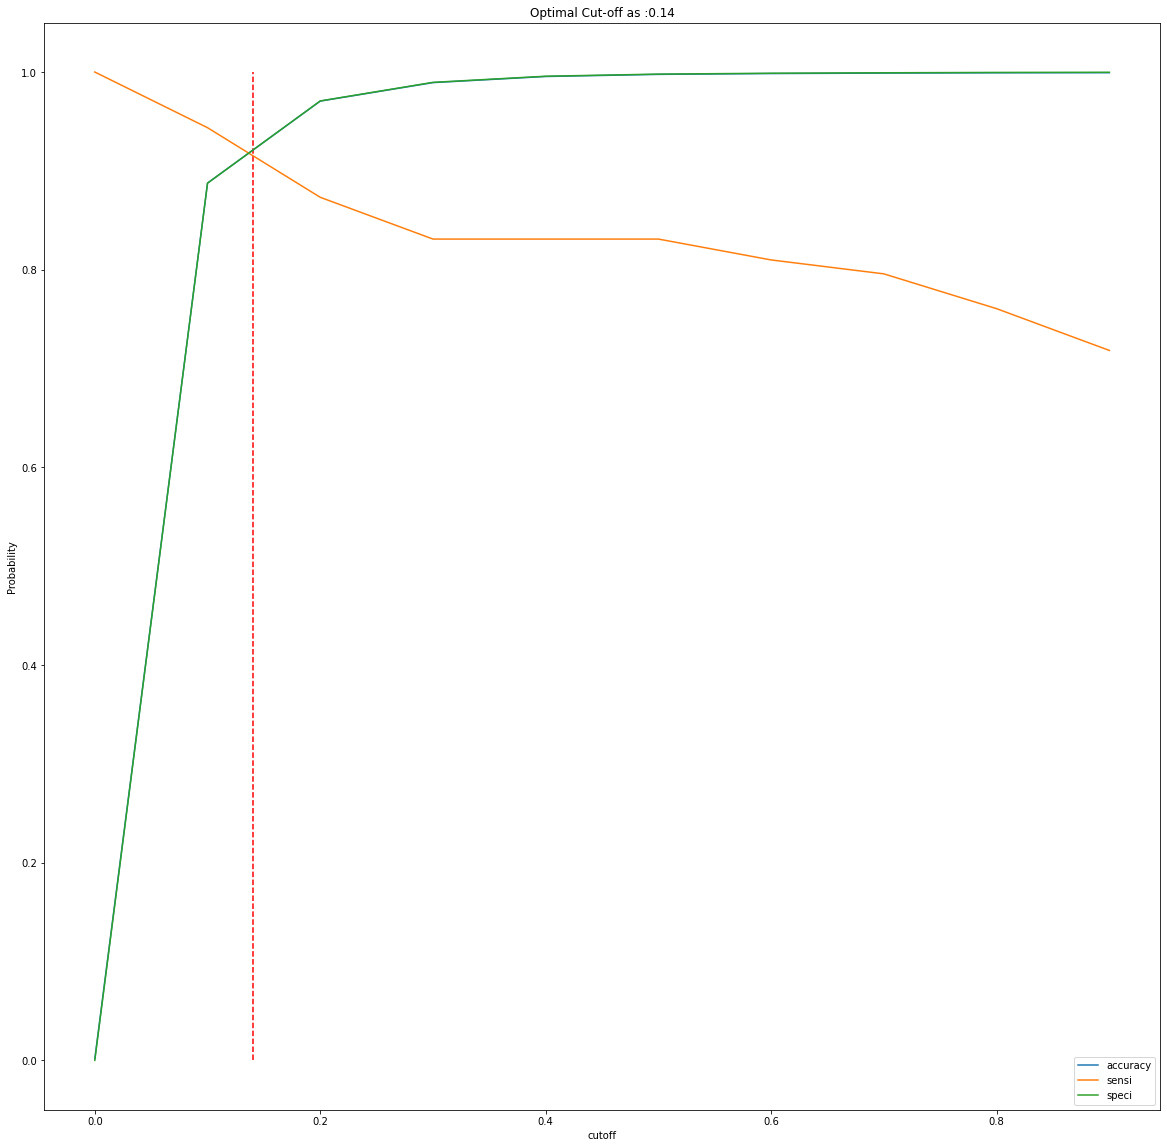

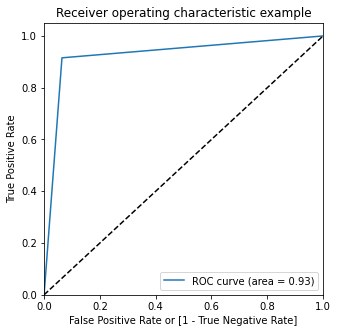





Misclassification Rate: 0.0641714359280456
Negative Predictive Power: 0.935862416618797
Accuracy: 0.9358285640719544
Precision: 0.023210141046241743
Recall: 0.9154929577464789
Roc Auc Score: 0.925677687182638




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.044208          0    1    0    0    0    0    0    0   
154704       0     0.096296          0    1    0    0    0    0    0    0   
67247        0     0.043431          0    1    0    0    0    0    0    0   
251657       0     0.040824          0    1    0    0    0    0    0    0   
201903       0     0.453456          0    1    1    1    1    1    0    0   
6079         0     0.037407          0    1    0    0    0    0    0    0   
270936       0     0.041006          0    1    0    0    0    0    0    0   
40673        0     0.046421          0    1    0    0    0    0    0    0   
143209       0     0.130730    

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(randomforest_over_tuning, cut_off_index = None)

### KNN Classifier for oversampling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [ ]:
# perform hyperparameter tuning
knn_model_over = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
knn_oversampling = GridSearchCV(estimator = knn_model_over , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
knn_oversampling.fit(X_over, y_over)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 57.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1, param_grid={'n_neighbors': [3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
knn_oversampling.best_params_

{'n_neighbors': 3}

In [ ]:
# Get the model score based on the hyperparamters tunning
knn_oversampling.best_score_

1.0

In [ ]:
y_pred = knn_oversampling.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9991105181231933
Recall/Sensitivity: 0.8098591549295775
Precision: 0.7012195121951219
Roc_Auc_score: 0.9046423592610162


In [ ]:
knn_oversampling_tuning = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
knn_oversampling_tuning.fit(X_over, y_over)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0          0.0          0
154704       0          0.0          0
67247        0          0.0          0
251657       0          0.0          0
201903       0          0.0          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0          0.0          0    0    0    0    0    0    0    0   
154704       0          0.0          0    0    0    0    0    0    0    0   
67247        0          0.0          0    0    0    0    0    0    0    0   
251657       0          0.0          0    0    0    0    0    0    0    0   
201903       0          0.0          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

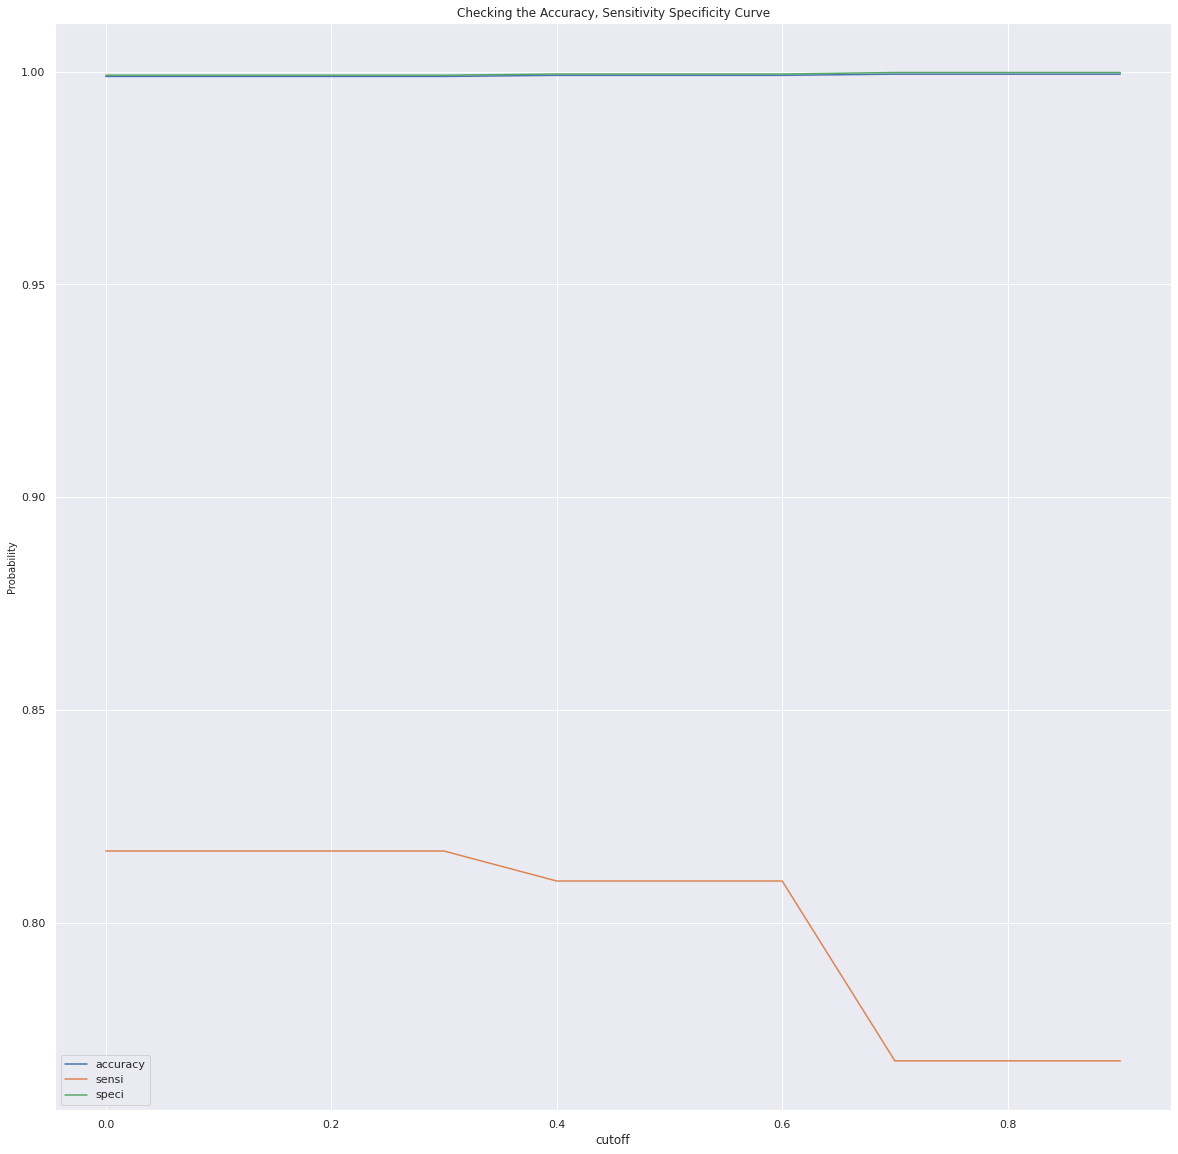





Enter the Ideal Cutoff Index: 0.4


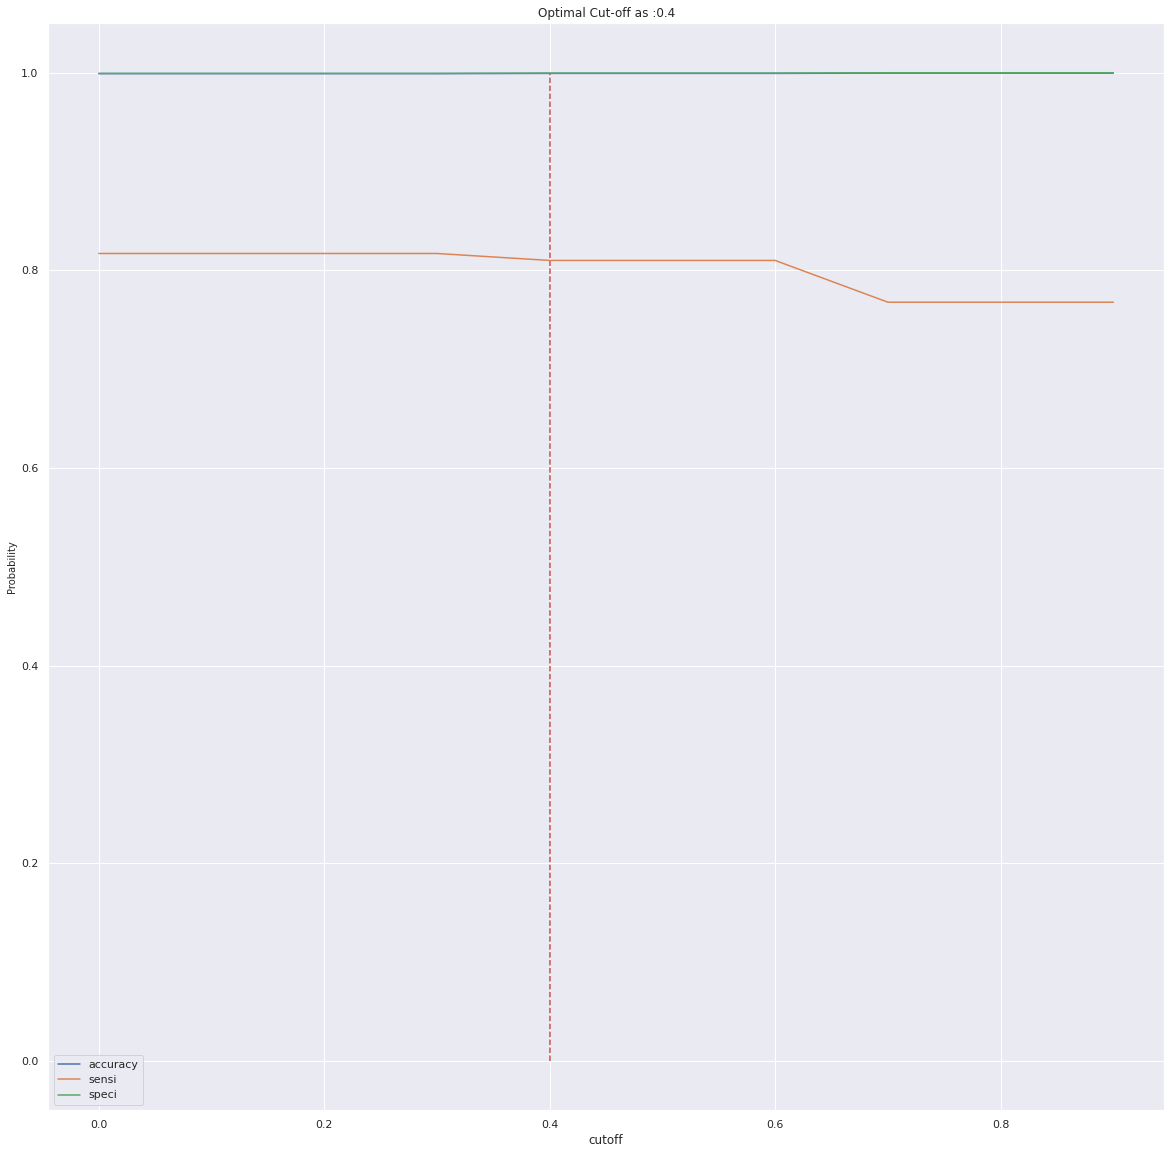

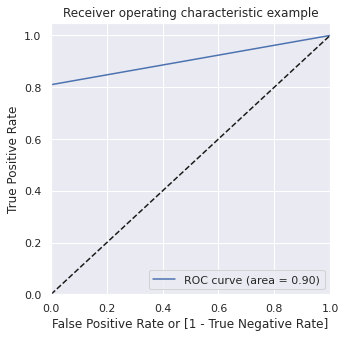





Misclassification Rate: 0.00088948187680676
Negative Predictive Power: 0.9994255635924549
Accuracy: 0.9991105181231933
Precision: 0.7012195121951219
Recall: 0.8098591549295775
Roc Auc Score: 0.9046423592610162




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0          0.0          0    0    0    0    0    0    0    0   
154704       0          0.0          0    0    0    0    0    0    0    0   
67247        0          0.0          0    0    0    0    0    0    0    0   
251657       0          0.0          0    0    0    0    0    0    0    0   
201903       0          0.0          0    0    0    0    0    0    0    0   
6079         0          0.0          0    0    0    0    0    0    0    0   
270936       0          0.0          0    0    0    0    0    0    0    0   
40673        0          0.0          0    0    0    0    0    0    0    0   
143209       0          0.0   

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(knn_oversampling_tuning, cut_off_index = None)

From the above model we observe that it's overfitting at various thresholds. This can be conclude by looking at Specificity, Sensitivity and accuracy metrics. This model is not good to predict fraud detection on unseen data.

### XGBOOST for oversampling

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from xgboost import XGBClassifier
# perform hyperparameter tuning
xgboost_model_over = XGBClassifier(random_state=42, tree_method='gpu_hist')
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
weights = [1, 10, 99, 1000]
params = {'scale_pos_weight': weights,'n_estimators' :[140,120,170],'max_depth':[5,6,8],'learning_rate' : [0.01,0.1,1]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
xgboost_model_over_1 = GridSearchCV(estimator = xgboost_model_over , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_model_over_1.fit(X_over, y_over)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 19.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='gpu_hist',
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.

In [ ]:
xgboost_model_over_1.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 140,
 'scale_pos_weight': 10}

In [ ]:
y_pred = xgboost_model_over_1.predict(X_test_transform.values)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9487377549945578
Recall/Sensitivity: 0.9014084507042254
Roc_Auc_score: 0.9251124972363813


In [ ]:
xgboost_oversampling_tune = XGBClassifier(randon_state=42, scale_pos_weight=10, learning_rate=0.01, max_depth=5, n_estimators=140)
xgboost_oversampling_tune.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
              seed=None, silent=None, subsample=1, verbosity=1)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.208276          0
154704       0     0.114258          0
67247        0     0.122146          0
251657       0     0.164297          0
201903       0     0.831941          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.208276          0    1    1    1    0    0    0    0   
154704       0     0.114258          0    1    1    0    0    0    0    0   
67247        0     0.122146          0    1    1    0    0    0    0    0   
251657       0     0.164297          0    1    1    0    0    0    0    0   
201903       0     0.831941          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

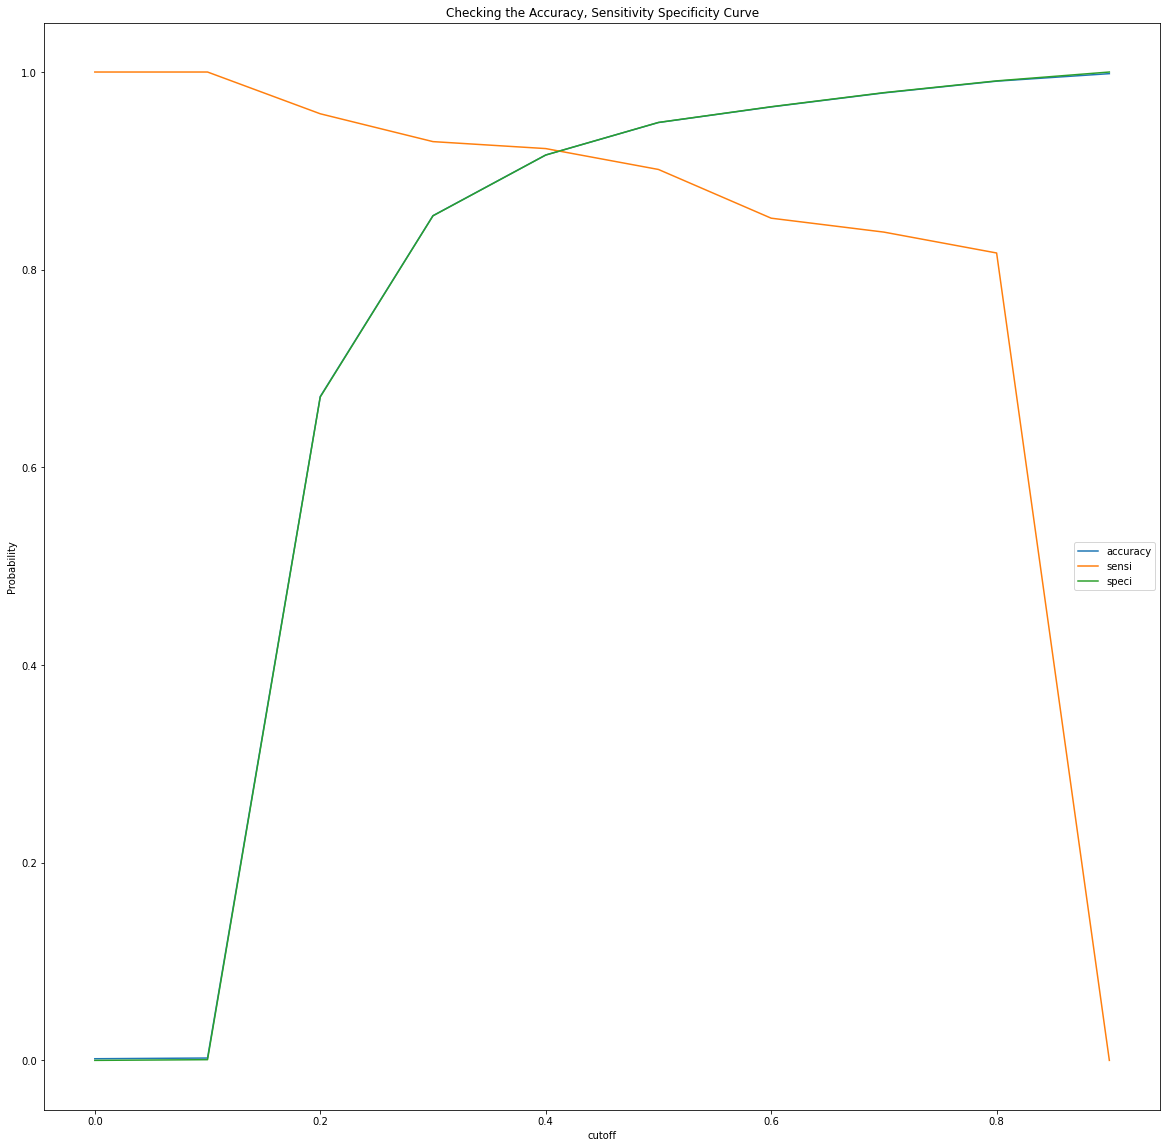





Enter the Ideal Cutoff Index: 0.42


<Figure size 720x576 with 0 Axes>

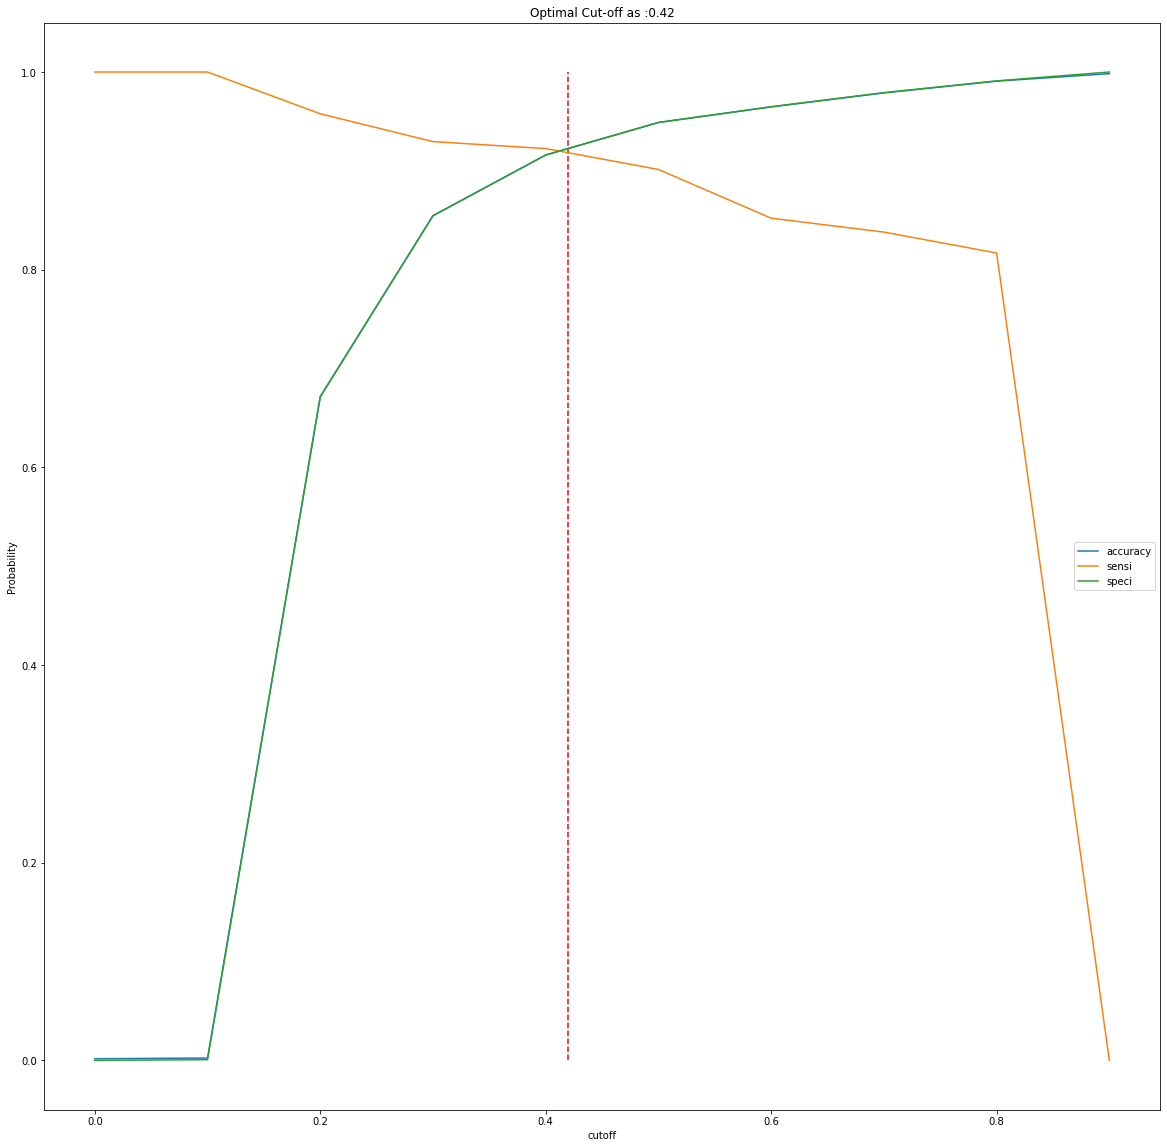

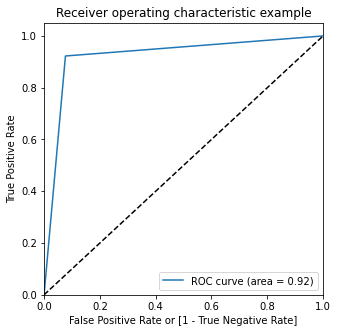





Misclassification Rate: 0.07660077478552954
Negative Predictive Power: 0.9234006635326667
Accuracy: 0.9233992252144705
Precision: 0.01965491372843211
Recall: 0.9225352112676056
Roc Auc Score: 0.9229679374001362




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.208276          0    1    1    1    0    0    0    0   
154704       0     0.114258          0    1    1    0    0    0    0    0   
67247        0     0.122146          0    1    1    0    0    0    0    0   
251657       0     0.164297          0    1    1    0    0    0    0    0   
201903       0     0.831941          1    1    1    1    1    1    1    1   
6079         0     0.157276          0    1    1    0    0    0    0    0   
270936       0     0.171843          0    1    1    0    0    0    0    0   
40673        0     0.195045          0    1    1    0    0    0    0    0   
143209       0     0.212651  

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff_xgboost(xgboost_oversampling_tune, cut_off_index = None)

## **SMOTE** oversampling technique 

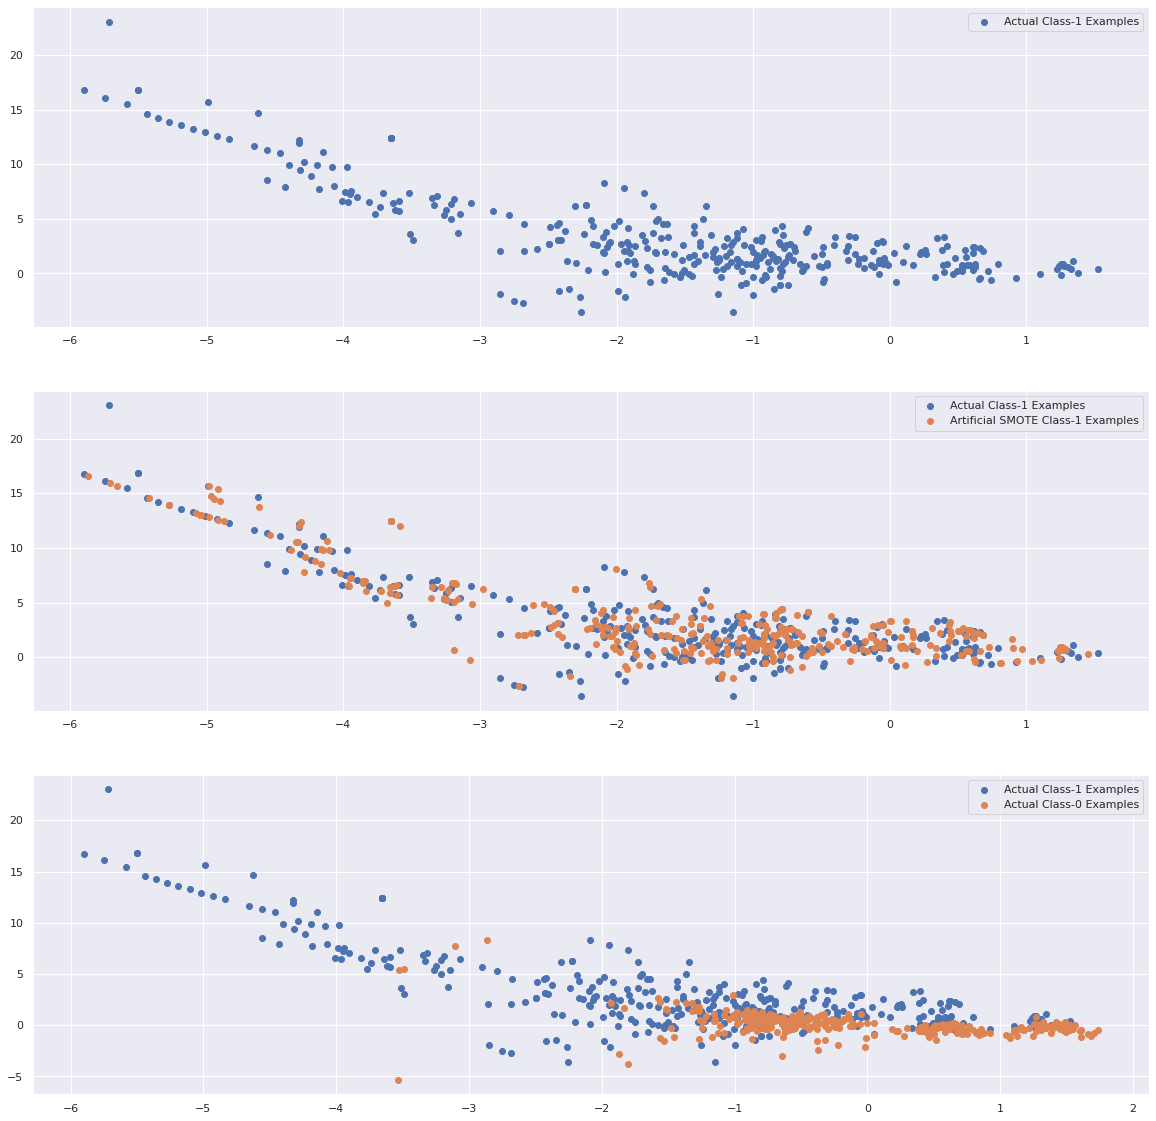

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority',random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_transform, y_train)
X_train_smote, y_train_smote = X_smote, y_smote
X_train_smote_1 = X_train_smote[X_train_transform.shape[0]:]

X_train_1 = X_train_transform.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_transform.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print('After SMOTE, Class 0: {0}'.format(sum(y_smote == 0)))
print('After SMOTE, Class 1: {0}'.format(sum(y_smote == 1)))

After SMOTE, Class 0: 199014
After SMOTE, Class 1: 199014


### Logistic Regression using SMOTE

In [ ]:
# perform hyperparameter tuning
logistic_regression_smote = LogisticRegression(random_state=42)
pipes = Pipeline([('log_reg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'], 'logreg__solver' : ['liblinear']}
# perform cross validation
logistic_model_smote = GridSearchCV(estimator = pipes , cv = folds, param_grid = params, scoring  = 'recall')

In [ ]:
logistic_model_smote.fit(X_smote, y_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                      

In [ ]:
logistic_model_smote.best_params_

{'logreg__C': 2, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

In [ ]:
# Get the model score based on the hyperparamters tunning
logistic_model_smote.best_score_

0.9248243812019863

In [ ]:
y_pred = logistic_model_smote.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.973771988343106
Recall/Sensitivity: 0.8943661971830986
Precision: 0.05397365065873353
Roc_Auc_score: 0.9341351859058832


In [ ]:
logistic_regression_smote = LogisticRegression(random_state=42, C=2 , penalty='l2', solver = 'liblinear')
logistic_regression_smote.fit(X_smote, y_smote)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.015210          0
154704       0     0.175140          0
67247        0     0.037565          0
251657       0     0.015857          0
201903       0     0.968858          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.015210          0    1    0    0    0    0    0    0   
154704       0     0.175140          0    1    1    0    0    0    0    0   
67247        0     0.037565          0    1    0    0    0    0    0    0   
251657       0     0.015857          0    1    0    0    0    0    0    0   
201903       0     0.968858          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    1  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

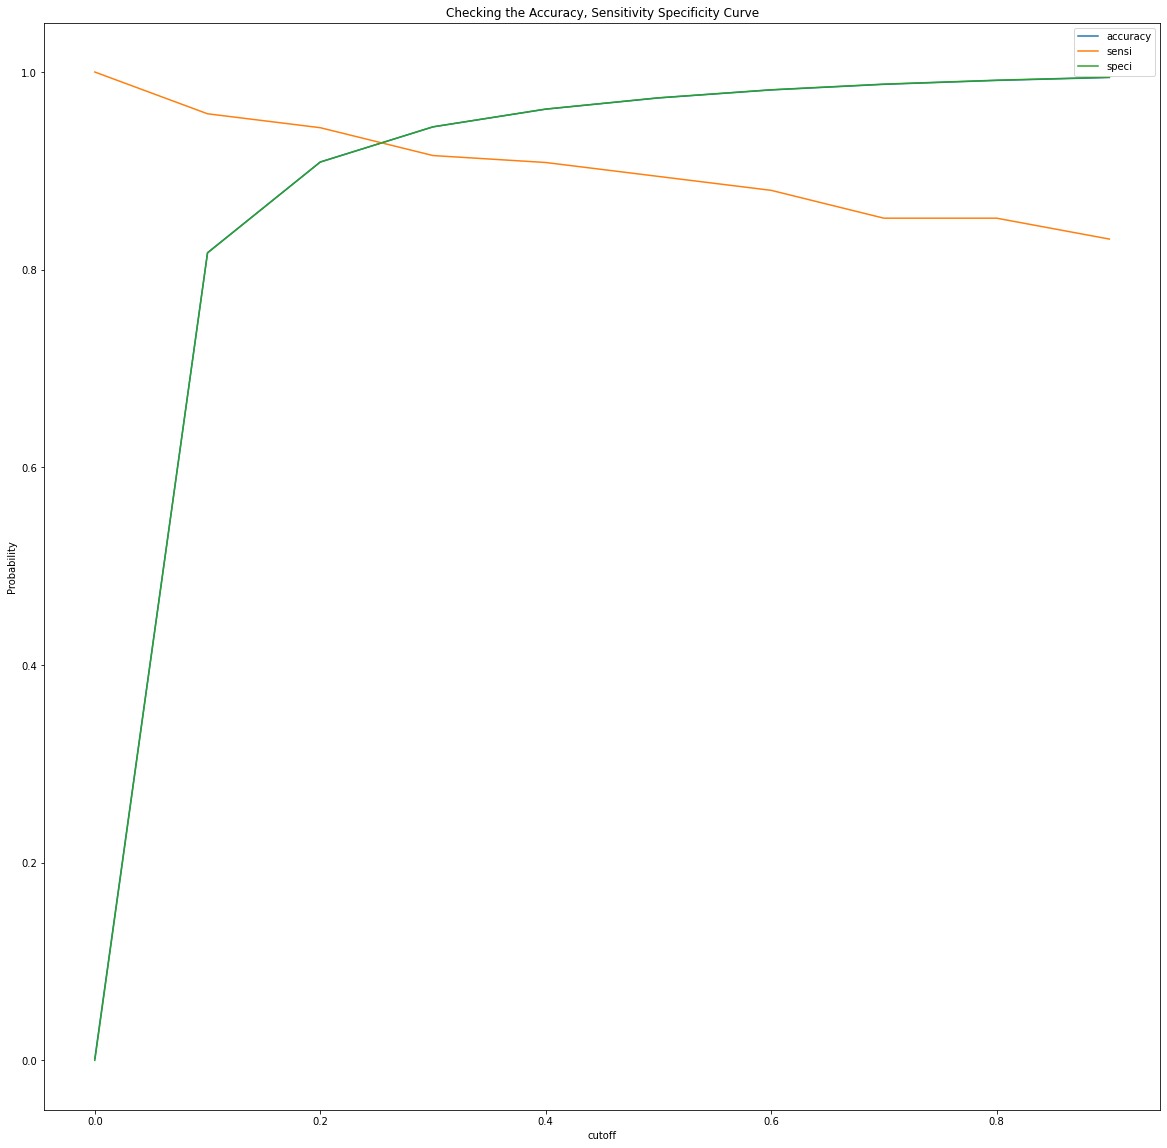





Enter the Ideal Cutoff Index: 0.25


<Figure size 720x576 with 0 Axes>

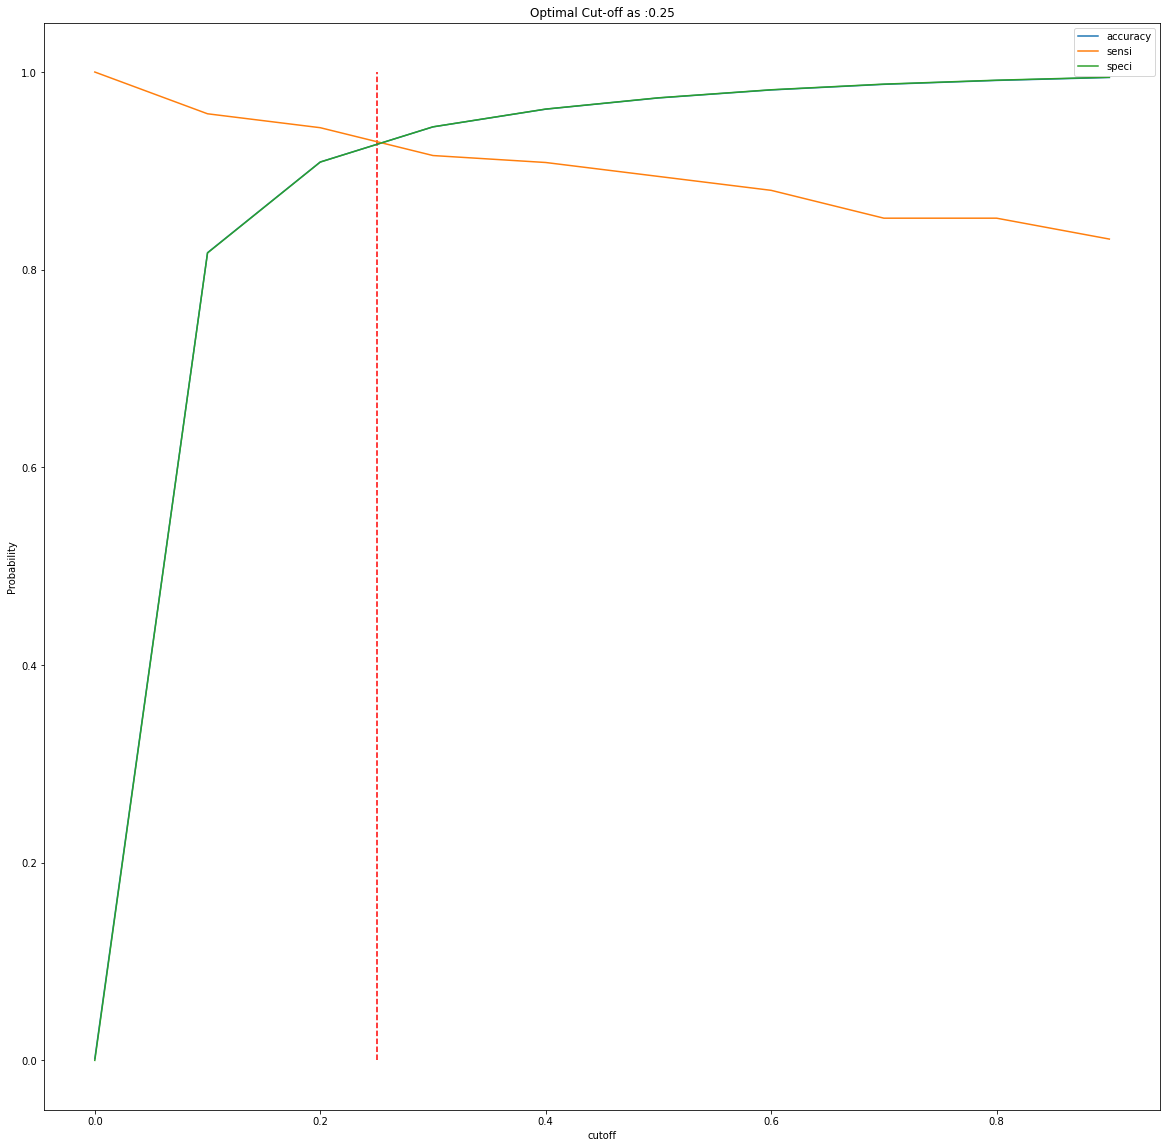

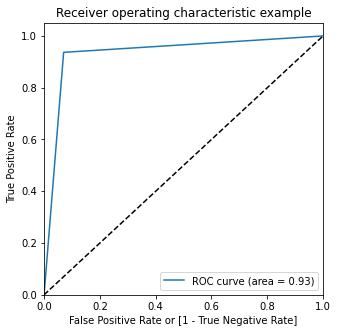





Misclassification Rate: 0.07012862376086983
Negative Predictive Power: 0.9298601423195507
Accuracy: 0.9298713762391302
Precision: 0.021746239372138654
Recall: 0.9366197183098591
Roc Auc Score: 0.9332399303147049




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.015210          0    1    0    0    0    0    0    0   
154704       0     0.175140          0    1    1    0    0    0    0    0   
67247        0     0.037565          0    1    0    0    0    0    0    0   
251657       0     0.015857          0    1    0    0    0    0    0    0   
201903       0     0.968858          1    1    1    1    1    1    1    1   
6079         0     0.009465          0    1    0    0    0    0    0    0   
270936       0     0.007643          0    1    0    0    0    0    0    0   
40673        0     0.045346          0    1    0    0    0    0    0    0   
143209       0     0.184317 

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(logistic_regression_smote, cut_off_index = None)

### Random Forest using SMOTE dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 
# perform hyperparameter tuning
randomforest_class_smote = RandomForestClassifier(random_state=42,warm_start=True)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [2,4], 'min_samples_split' : [10,12], 'max_features' : [10,12]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
randomforest_smote = GridSearchCV(estimator = randomforest_class_smote , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [ ]:
randomforest_smote.fit(X_smote, y_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 136.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [ ]:
# Get the model score based on the hyperparamters tunning
randomforest_smote.best_score_

0.9119207747874375

In [ ]:
randomforest_smote.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 12,
 'min_samples_split': 12}

In [ ]:
y_pred = randomforest_smote.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9895485879475205
Recall/Sensitivity: 0.8309859154929577
Roc_Auc_score: 0.9103992308265131


In [ ]:
randomforest_smote_tuning = RandomForestClassifier(class_weight = {0 : 1, 1:5} , criterion = 'gini', max_depth= 4, min_samples_split=12, max_features= 12, min_samples_leaf = 10 , n_estimators=210)
randomforest_smote_tuning.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=4, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.155716          0
154704       0     0.244133          0
67247        0     0.149355          0
251657       0     0.211235          0
201903       0     0.803436          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.155716          0    1    1    0    0    0    0    0   
154704       0     0.244133          0    1    1    1    0    0    0    0   
67247        0     0.149355          0    1    1    0    0    0    0    0   
251657       0     0.211235          0    1    1    1    0    0    0    0   
201903       0     0.803436          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

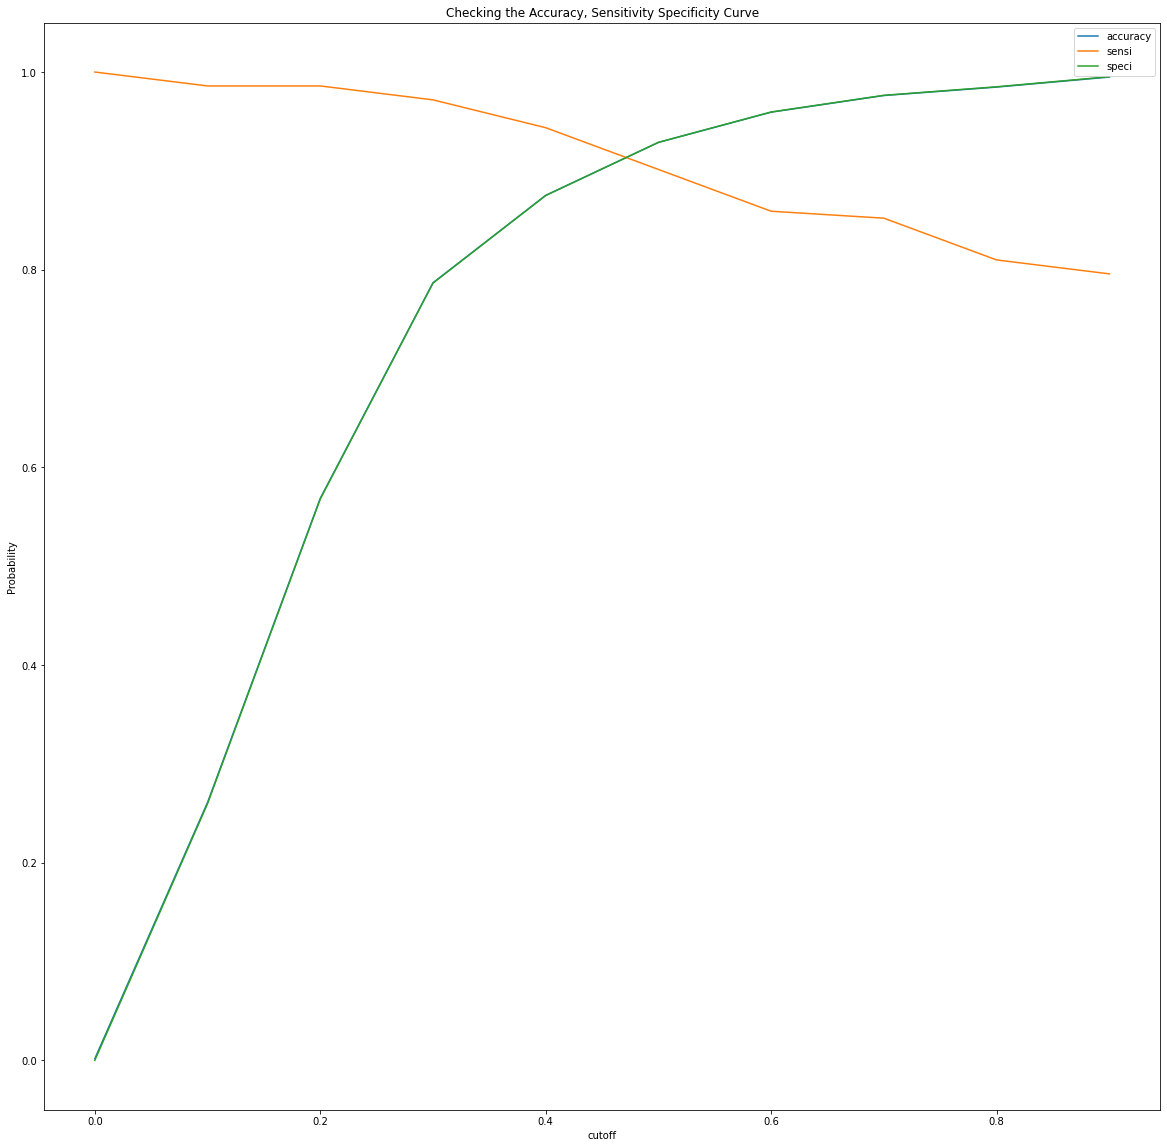





Enter the Ideal Cutoff Index: 0.47


<Figure size 720x576 with 0 Axes>

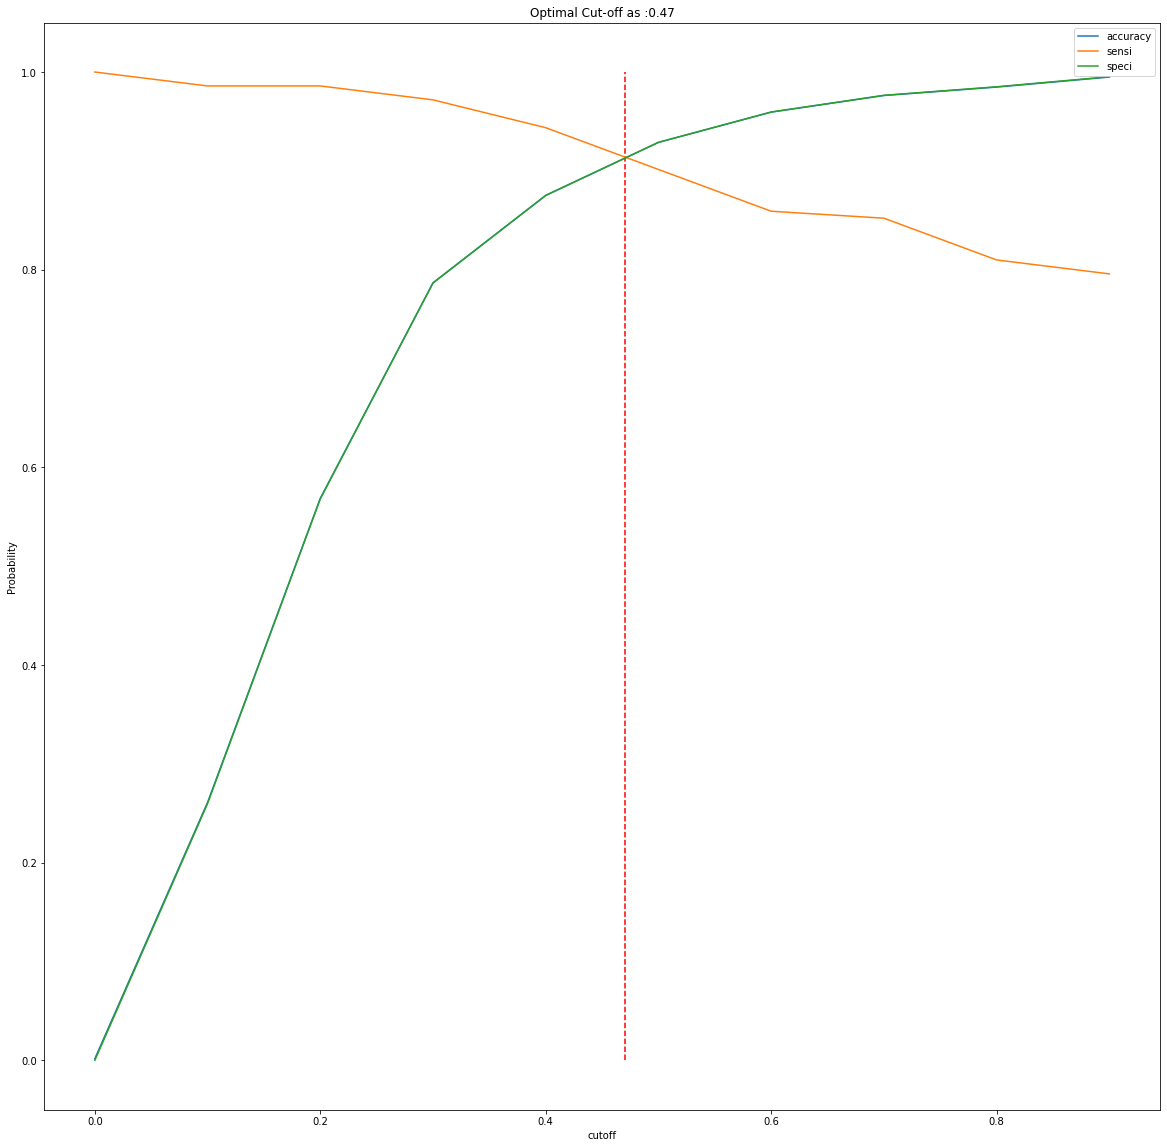

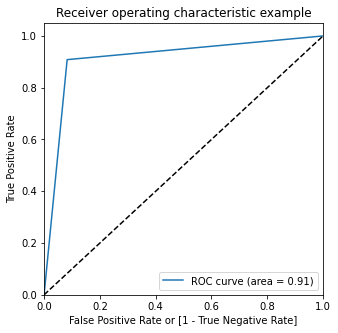





Misclassification Rate: 0.08269840712521798
Negative Predictive Power: 0.9173163268894855
Accuracy: 0.917301592874782
Precision: 0.01796157059314954
Recall: 0.9084507042253521
Roc Auc Score: 0.9128835155574189




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.155716          0    1    1    0    0    0    0    0   
154704       0     0.244133          0    1    1    1    0    0    0    0   
67247        0     0.149355          0    1    1    0    0    0    0    0   
251657       0     0.211235          0    1    1    1    0    0    0    0   
201903       0     0.803436          1    1    1    1    1    1    1    1   
6079         0     0.258667          0    1    1    1    0    0    0    0   
270936       0     0.090543          0    1    0    0    0    0    0    0   
40673        0     0.183267          0    1    1    0    0    0    0    0   
143209       0     0.311145   

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(randomforest_smote_tuning, cut_off_index = None)

### KNN for SMOTE dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
# perform hyperparameter tuning
knn_model_smote = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
knn_smote = GridSearchCV(estimator = knn_model_smote , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
knn_smote.fit(X_smote, y_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 59.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1, param_grid={'n_neighbors': [3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
knn_smote.best_params_

{'n_neighbors': 3}

In [ ]:
y_pred = knn_smote.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9984434067155882
Recall/Sensitivity: 0.823943661971831
Precision: 0.52
Roc_Auc_score: 0.911338778618417


In [ ]:
knn_smote_tuning = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
knn_smote_tuning.fit(X_smote, y_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0          0.0          0
154704       0          0.0          0
67247        0          0.0          0
251657       0          0.0          0
201903       0          0.0          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0          0.0          0    0    0    0    0    0    0    0   
154704       0          0.0          0    0    0    0    0    0    0    0   
67247        0          0.0          0    0    0    0    0    0    0    0   
251657       0          0.0          0    0    0    0    0    0    0    0   
201903       0          0.0          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

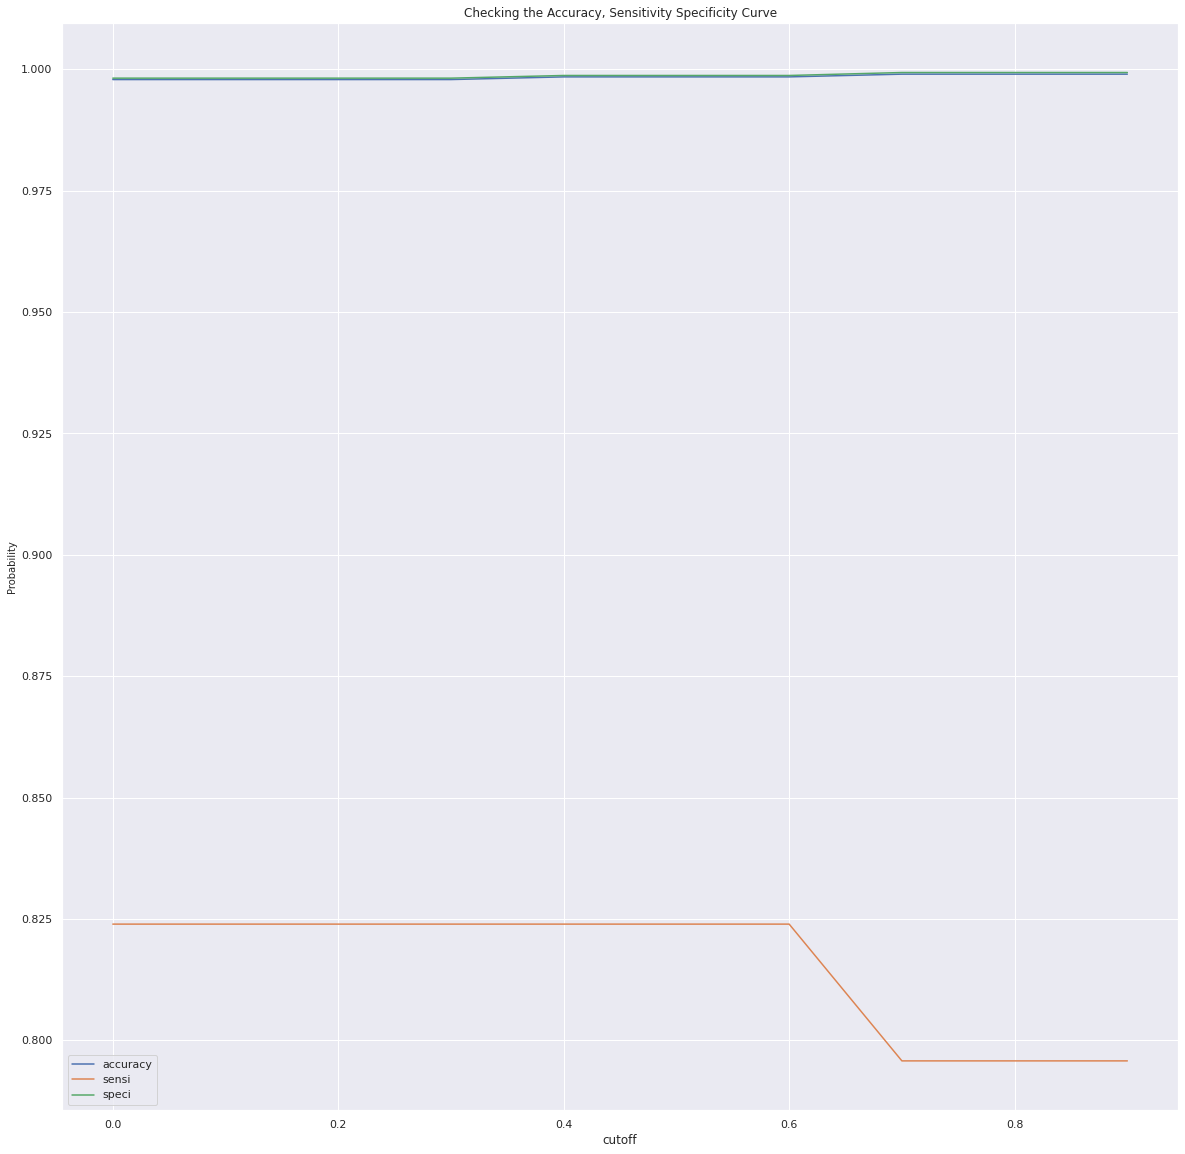





Enter the Ideal Cutoff Index: 0.4


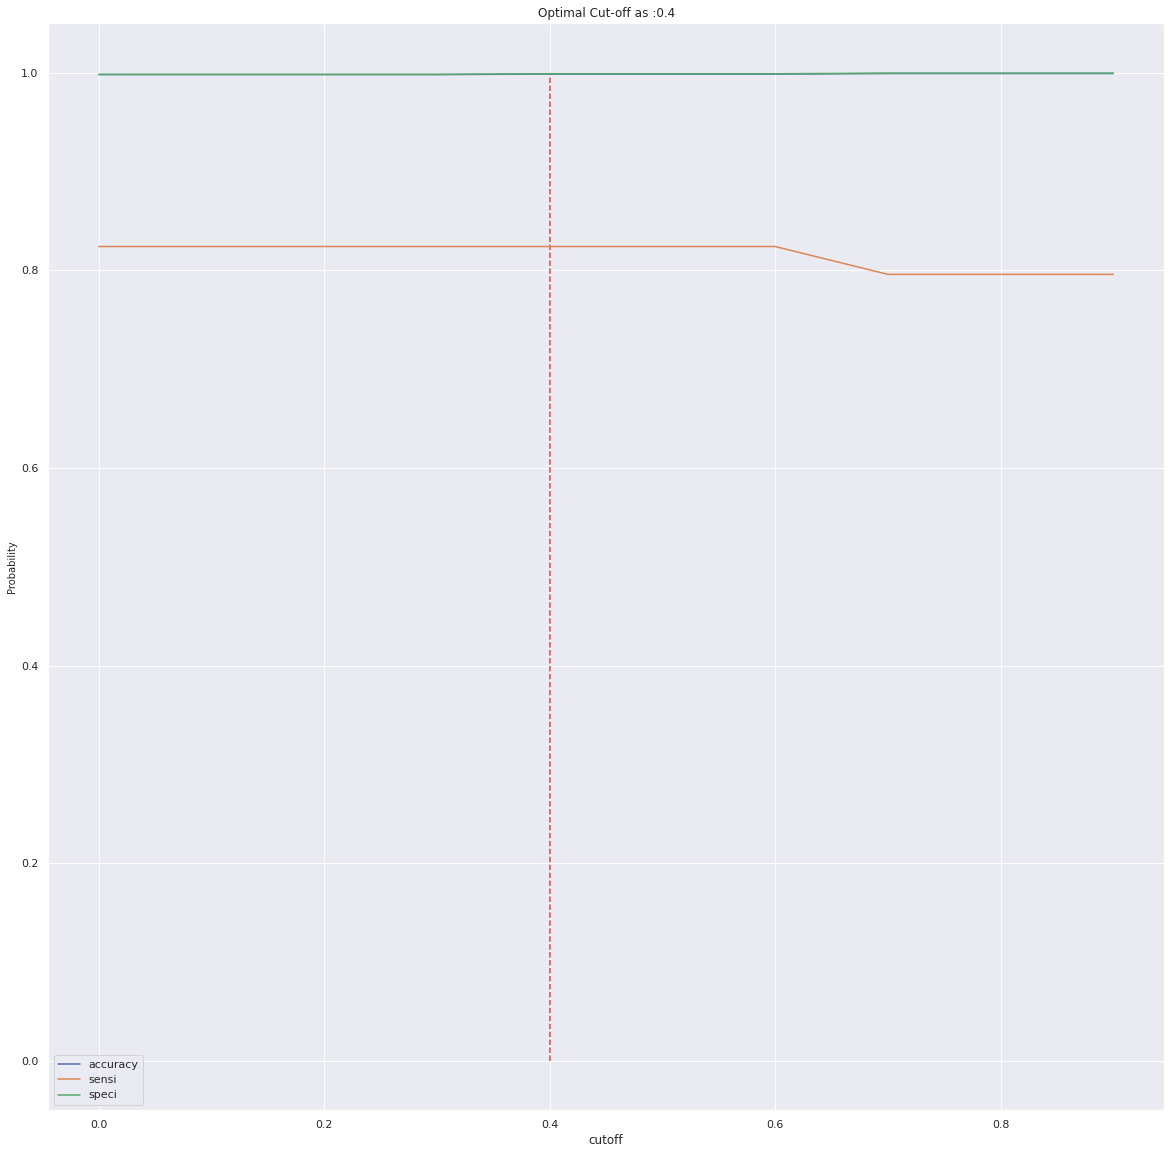

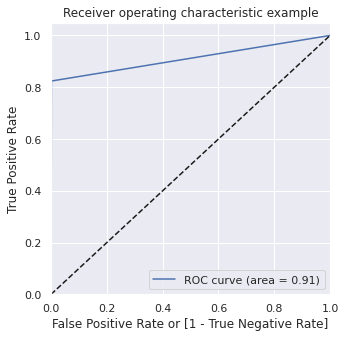





Misclassification Rate: 0.00155659328441183
Negative Predictive Power: 0.9987338952650028
Accuracy: 0.9984434067155882
Precision: 0.52
Recall: 0.823943661971831
Roc Auc Score: 0.911338778618417




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0          0.0          0    0    0    0    0    0    0    0   
154704       0          0.0          0    0    0    0    0    0    0    0   
67247        0          0.0          0    0    0    0    0    0    0    0   
251657       0          0.0          0    0    0    0    0    0    0    0   
201903       0          0.0          0    0    0    0    0    0    0    0   
6079         0          0.0          0    0    0    0    0    0    0    0   
270936       0          0.0          0    0    0    0    0    0    0    0   
40673        0          0.0          0    0    0    0    0    0    0    0   
143209       0          0.0          0    0   

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(knn_smote_tuning, cut_off_index = None)

From the above model we observe that the it's overfitting at various thresholds. This can be conclude by looking at Specificity and accuracy metrics. This model is not good to predict fraud detection on unseen data.

### XGBoost For SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from xgboost import XGBClassifier
# perform hyperparameter tuning
xgboost_model_smote = XGBClassifier(random_state=42,tree_method = 'gpu_hist')
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
weights = [1, 99, 100, 1000]
params = {'scale_pos_weight': weights'n_estimators' :[140,170],'max_depth':[5,6],'learning_rate' : [0.01,0.1]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
xgboost_model_smote_1 = GridSearchCV(estimator = xgboost_model_smote , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_model_smote_1.fit(X_smote, y_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 126.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 6],
                         'n_esti

In [ ]:
xgboost_model_smote_1.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 170}

In [ ]:
y_pred = xgboost_model_smote_1.predict(X_test_transform.values)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9983263696265346
Recall/Sensitivity: 0.8309859154929577
Precision: 0.4978902953586498
Roc_Auc_score: 0.9147954278230314


In [ ]:
xgboost_smote_tuning = XGBClassifier(random_state=42,tree_method = 'gpu_hist', learning_rate=0.1,max_depth=5, n_estimators=120,scale_pos_weight=1000)
xgboost_smote_tuning.fit(X_smote, y_smote)
y_pred = xgboost_smote_tuning.predict(X_test_transform.values)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9544374612314642
Recall/Sensitivity: 0.8732394366197183
Roc_Auc_score: 0.9139060338278483


In [ ]:
xgboost_smote_tuning = XGBClassifier(randon_state=42, learning_rate=0.1,max_depth=5, n_estimators=120,scale_pos_weight=99)
xgboost_smote_tuning.fit(X_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=99,
              seed=None, silent=None, subsample=1, verbosity=1)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.010153          0
154704       0     0.000010          0
67247        0     0.000417          0
251657       0     0.000010          0
201903       0     0.857993          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.010153          0    1    0    0    0    0    0    0   
154704       0     0.000010          0    1    0    0    0    0    0    0   
67247        0     0.000417          0    1    0    0    0    0    0    0   
251657       0     0.000010          0    1    0    0    0    0    0    0   
201903       0     0.857993          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

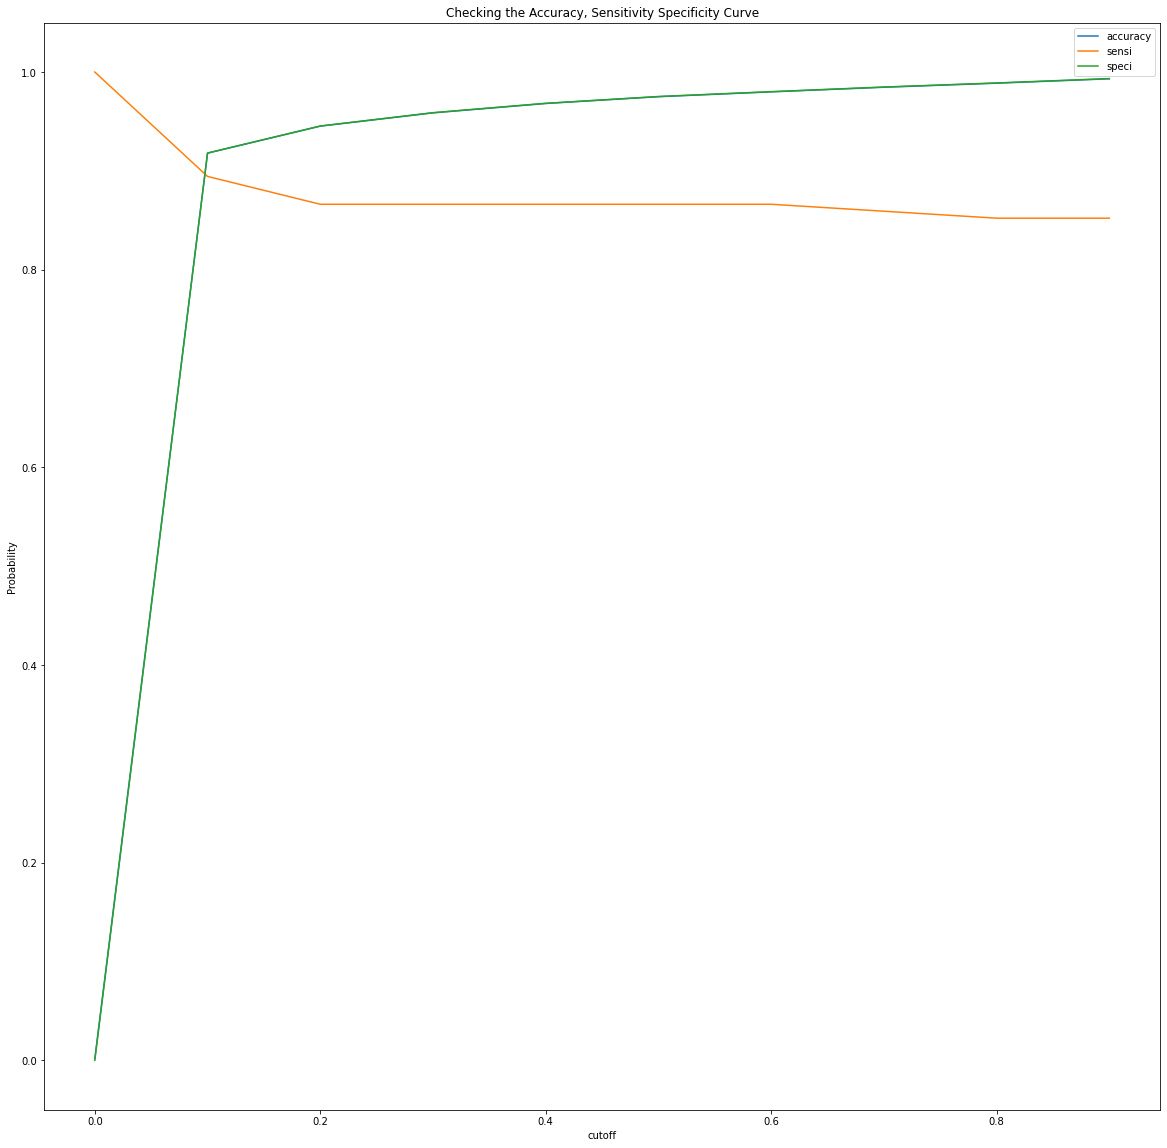





Enter the Ideal Cutoff Index: 0.1


<Figure size 720x576 with 0 Axes>

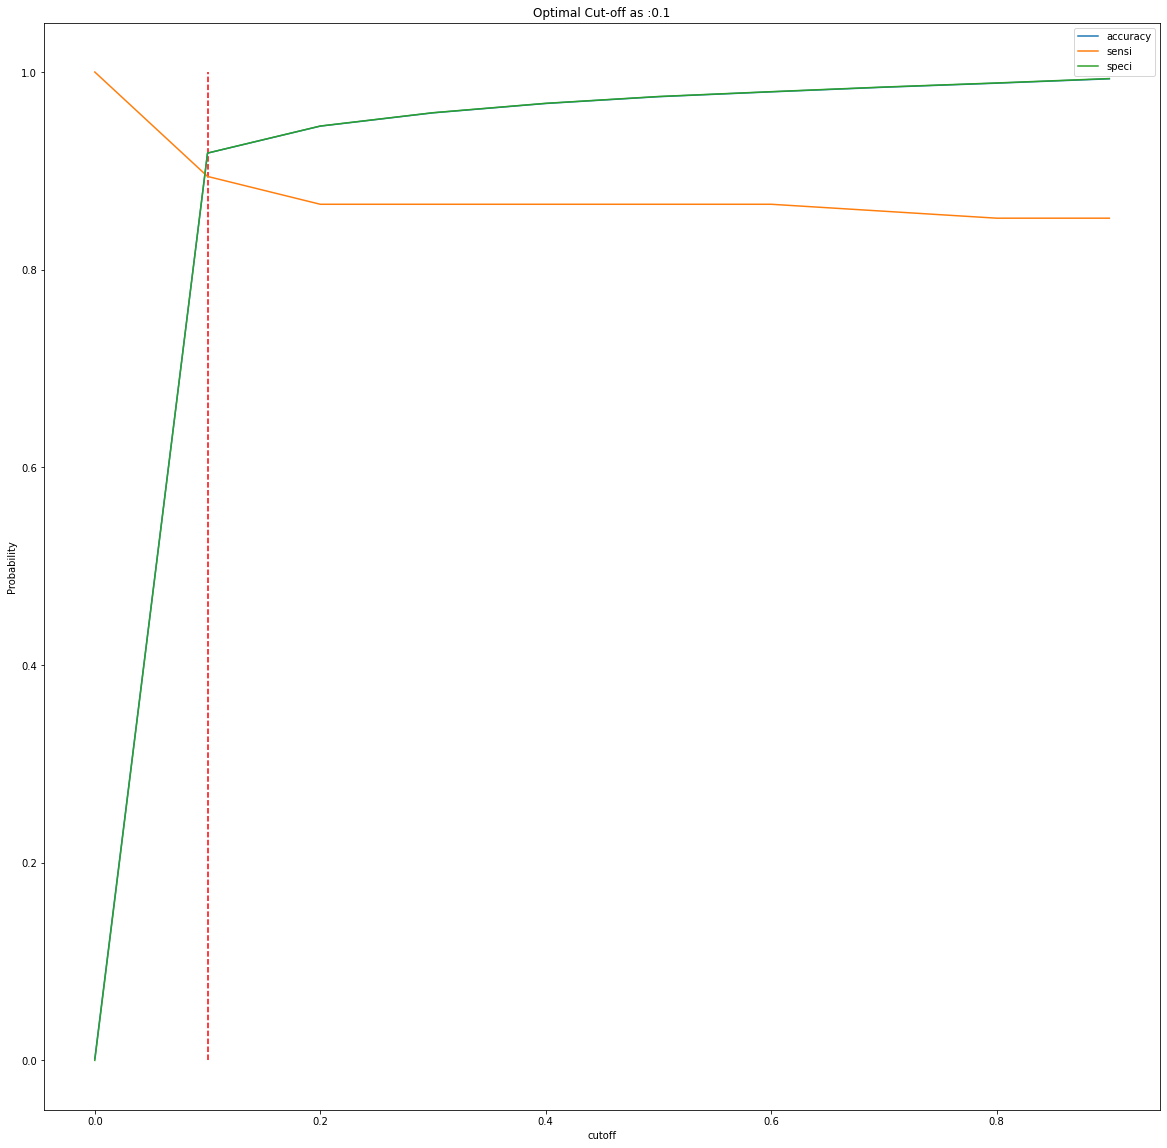

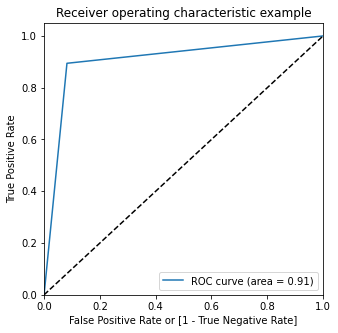





Misclassification Rate: 0.08205470313542361
Negative Predictive Power: 0.9179845488329562
Accuracy: 0.9179452968645764
Precision: 0.017829566194019375
Recall: 0.8943661971830986
Roc Auc Score: 0.9061753730080273




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.010153          0    1    0    0    0    0    0    0   
154704       0     0.000010          0    1    0    0    0    0    0    0   
67247        0     0.000417          0    1    0    0    0    0    0    0   
251657       0     0.000010          0    1    0    0    0    0    0    0   
201903       0     0.857993          1    1    1    1    1    1    1    1   
6079         0     0.000111          0    1    0    0    0    0    0    0   
270936       0     0.001359          0    1    0    0    0    0    0    0   
40673        0     0.003803          0    1    0    0    0    0    0    0   
143209       0     0.000174 

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff_xgboost(xgboost_smote_tuning, cut_off_index = None)

### SVM for SMOTE data

In [ ]:
from sklearn import svm
# perform hyperparameter tuning
svm_model_smote = svm.SVC(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'kernel' :['rbf','polynomial'],'C':[0.01,0.1,1]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
svm_model_smote_1 = GridSearchCV(estimator = svm_model_smote , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
svm_model_smote_1.fit(X_smote, y_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 308.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['rbf', 'polynomial']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
# Get the model score based on the hyperparamters tunning
svm_model_smote_1.best_score_

0.9874732461927529

In [ ]:
svm_model_smote_1.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
y_pred = svm_model_smote_1.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9874068092178412
Recall/Sensitivity: 0.7887323943661971
Precision: 0.09671848013816926
Roc_Auc_score: 0.8882349677719544


In [ ]:
svm_smote = svm.SVC(kernel='rbf',C= 1 , random_state=42) 
svm_smote.fit(X_smote, y_smote)
y_pred = svm_smote.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9874068092178412
Recall/Sensitivity: 0.7887323943661971
Precision: 0.09671848013816926
Roc_Auc_score: 0.8882349677719544


### Using Adasyn technique to balance class and create models

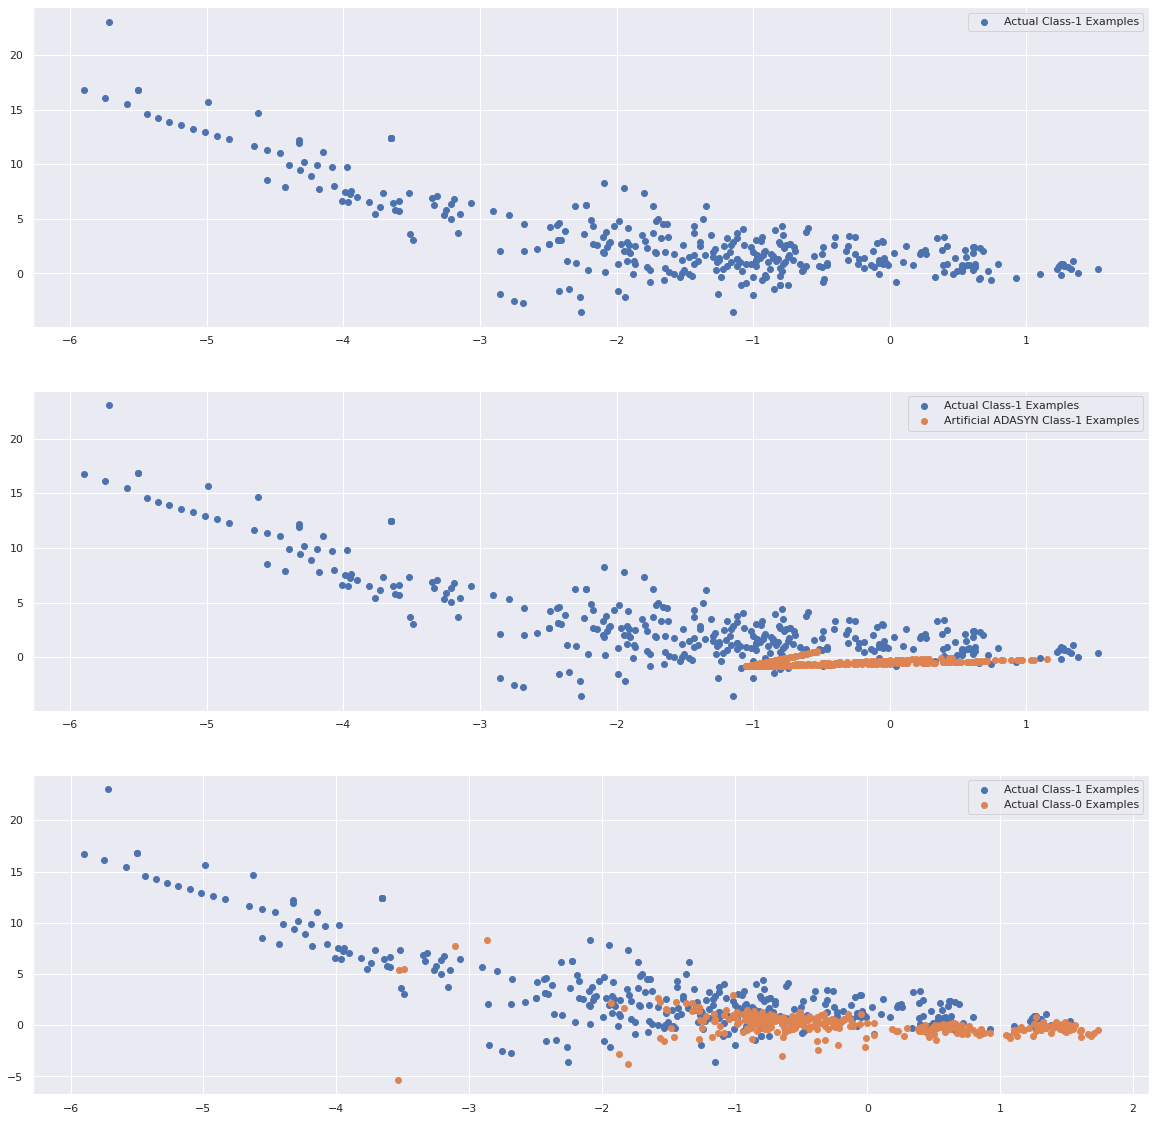

In [ ]:
#Plot actual and synthesized data
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='minority',random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_transform, y_train)
X_train_adasyn, y_train_adasyn = X_adasyn, y_adasyn
X_train_adasyn_1 = X_train_adasyn[X_train_transform.shape[0]:]

X_train_1 = X_train_transform.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_transform.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label = 'Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label = 'Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1], label = 'Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label = 'Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label = 'Actual Class-0 Examples')
plt.legend()

In [ ]:
print('After ADASYN, Class 0: {0}'.format(sum(y_adasyn == 0)))
print('After ADASYN, Class 1: {0}'.format(sum(y_adasyn == 1)))

After ADASYN, Class 0: 199014
After ADASYN, Class 1: 199004


### Logistic Regression using ADASYN

In [ ]:
# perform hyperparameter tuning
logistic_regression_adasyn = LogisticRegression(random_state=42)
pipes = Pipeline([('log_reg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'], 'logreg__solver' : ['liblinear']}
# perform cross validation
logistic_model_adasyn = GridSearchCV(estimator = pipes , cv = folds, param_grid = params, scoring  = 'recall')

In [ ]:
logistic_model_adasyn.fit(X_adasyn, y_adasyn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                      

In [ ]:
logistic_model_adasyn.best_params_

{'logreg__C': 2, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

In [ ]:
# Get the model score based on the hyperparamters tunning
logistic_model_adasyn.best_score_

0.9248243812019863

In [ ]:
y_pred = logistic_model_adasyn.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.973771988343106
Recall/Sensitivity: 0.8943661971830986
Precision: 0.05397365065873353
Roc_Auc_score: 0.9341351859058832


In [ ]:
logistic_regression_adasyn = LogisticRegression(random_state=42, C=2 , penalty='l2', solver = 'liblinear')
logistic_regression_adasyn.fit(X_adasyn, y_adasyn)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.030748          0
154704       0     0.341741          0
67247        0     0.075475          0
251657       0     0.037786          0
201903       0     0.997330          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.030748          0    1    0    0    0    0    0    0   
154704       0     0.341741          0    1    1    1    1    0    0    0   
67247        0     0.075475          0    1    0    0    0    0    0    0   
251657       0     0.037786          0    1    0    0    0    0    0    0   
201903       0     0.997330          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    1  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

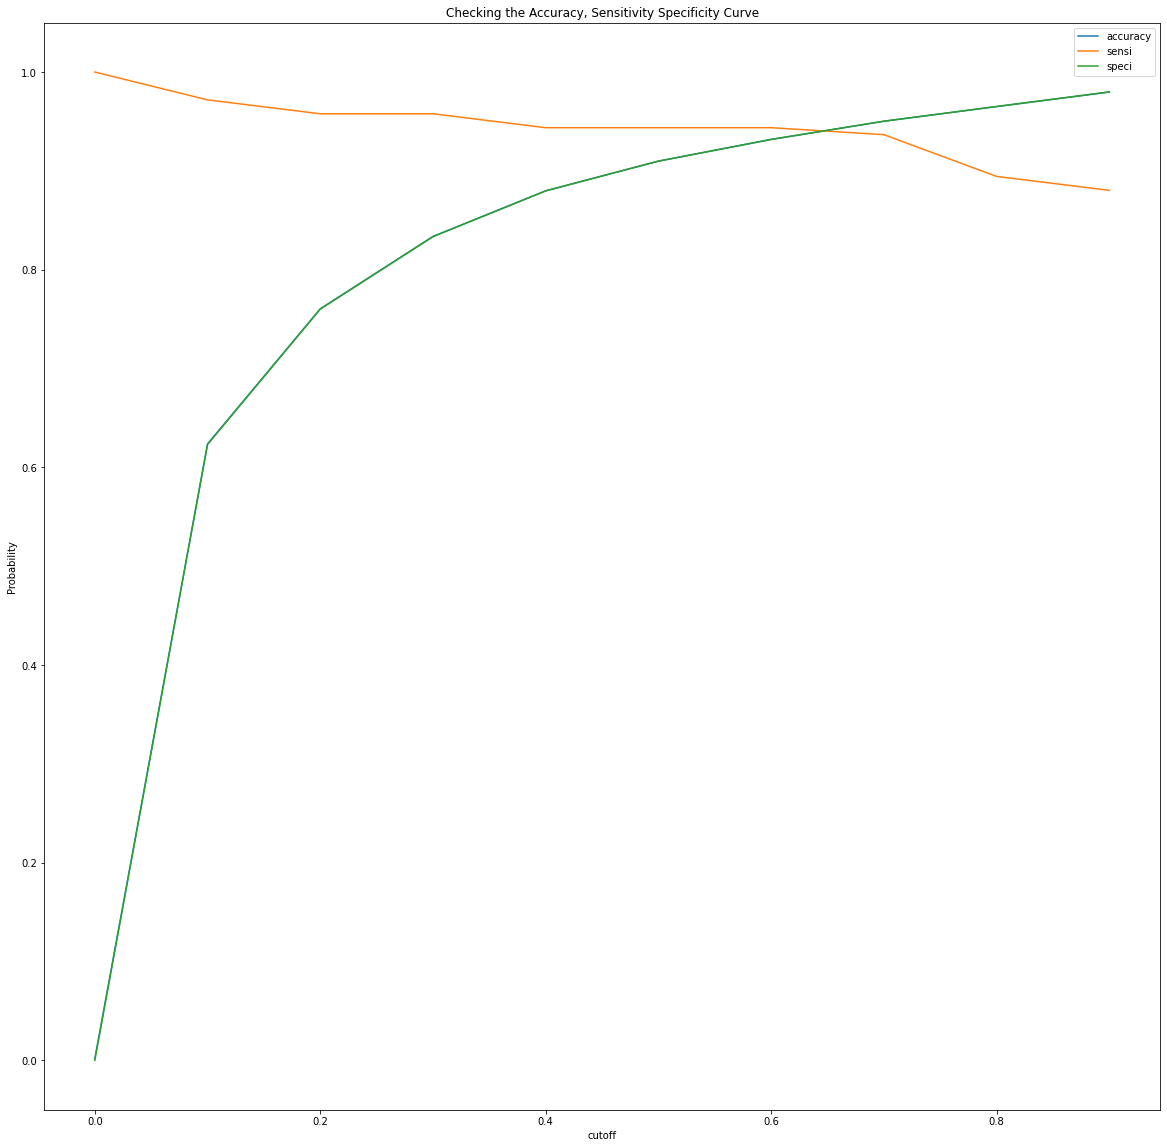





Enter the Ideal Cutoff Index: 0.65


<Figure size 720x576 with 0 Axes>

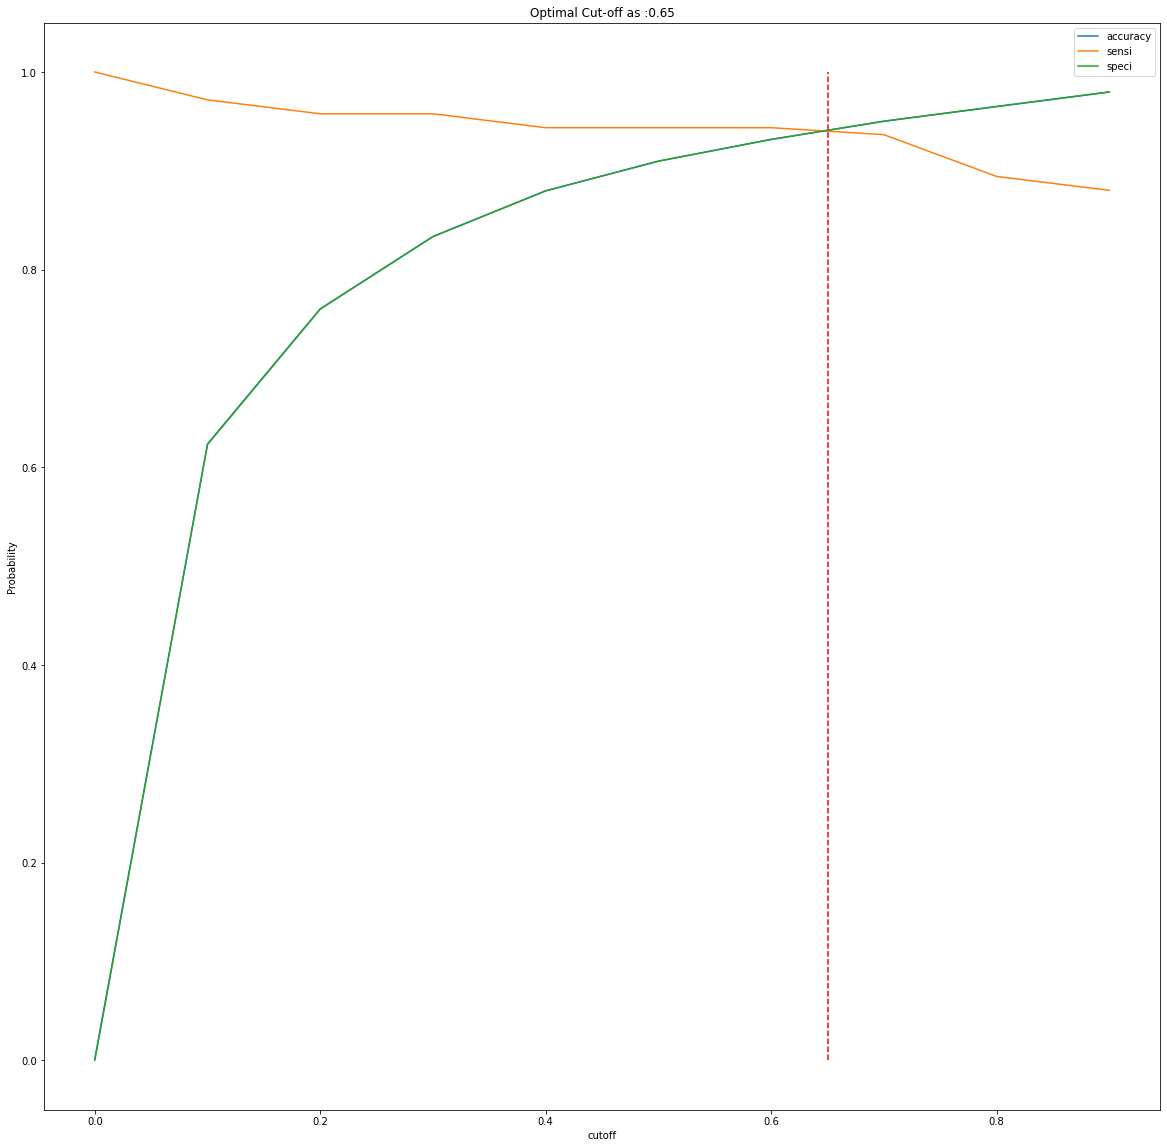

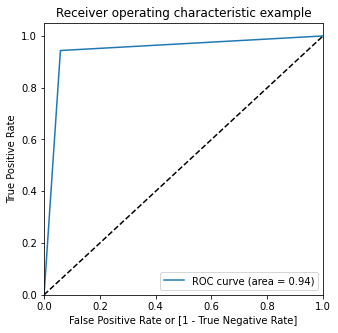





Misclassification Rate: 0.058612174198003346
Negative Predictive Power: 0.9413840400464238
Accuracy: 0.9413878258019966
Precision: 0.026100506427736658
Recall: 0.9436619718309859
Roc Auc Score: 0.9425230059387049




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.030748          0    1    0    0    0    0    0    0   
154704       0     0.341741          0    1    1    1    1    0    0    0   
67247        0     0.075475          0    1    0    0    0    0    0    0   
251657       0     0.037786          0    1    0    0    0    0    0    0   
201903       0     0.997330          1    1    1    1    1    1    1    1   
6079         0     0.015655          0    1    0    0    0    0    0    0   
270936       0     0.015158          0    1    0    0    0    0    0    0   
40673        0     0.090072          0    1    0    0    0    0    0    0   
143209       0     0.516861

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(logistic_regression_adasyn, cut_off_index = None)

### Random Forest for ADASYN dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 
# perform hyperparameter tuning
randomforest_class_adasyn = RandomForestClassifier(random_state=42,warm_start=True)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [2,4], 'min_samples_split' : [10,12], 'max_features' : [10,12]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
randomforest_adasyn = GridSearchCV(estimator = randomforest_class_adasyn , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [ ]:
randomforest_adasyn.fit(X_adasyn, y_adasyn)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 57.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 128.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [ ]:
# Get the model score based on the hyperparamters tunning
randomforest_adasyn.best_score_

0.8842284482132781

In [ ]:
randomforest_adasyn.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 12,
 'min_samples_split': 10}

In [ ]:
y_pred = randomforest_adasyn.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9422539002609928
Recall/Sensitivity: 0.8943661971830986
Roc_Auc_score: 0.9183499078903851


In [ ]:
randomforest_adasyn_tuning = RandomForestClassifier(criterion = 'entropy', max_depth= 4, min_samples_leaf=10, min_samples_split=10,max_features=12)
randomforest_adasyn_tuning.fit(X_adasyn, y_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.147122          0
154704       0     0.319917          0
67247        0     0.139529          0
251657       0     0.211903          0
201903       0     0.763232          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.147122          0    1    1    0    0    0    0    0   
154704       0     0.319917          0    1    1    1    1    0    0    0   
67247        0     0.139529          0    1    1    0    0    0    0    0   
251657       0     0.211903          0    1    1    1    0    0    0    0   
201903       0     0.763232          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

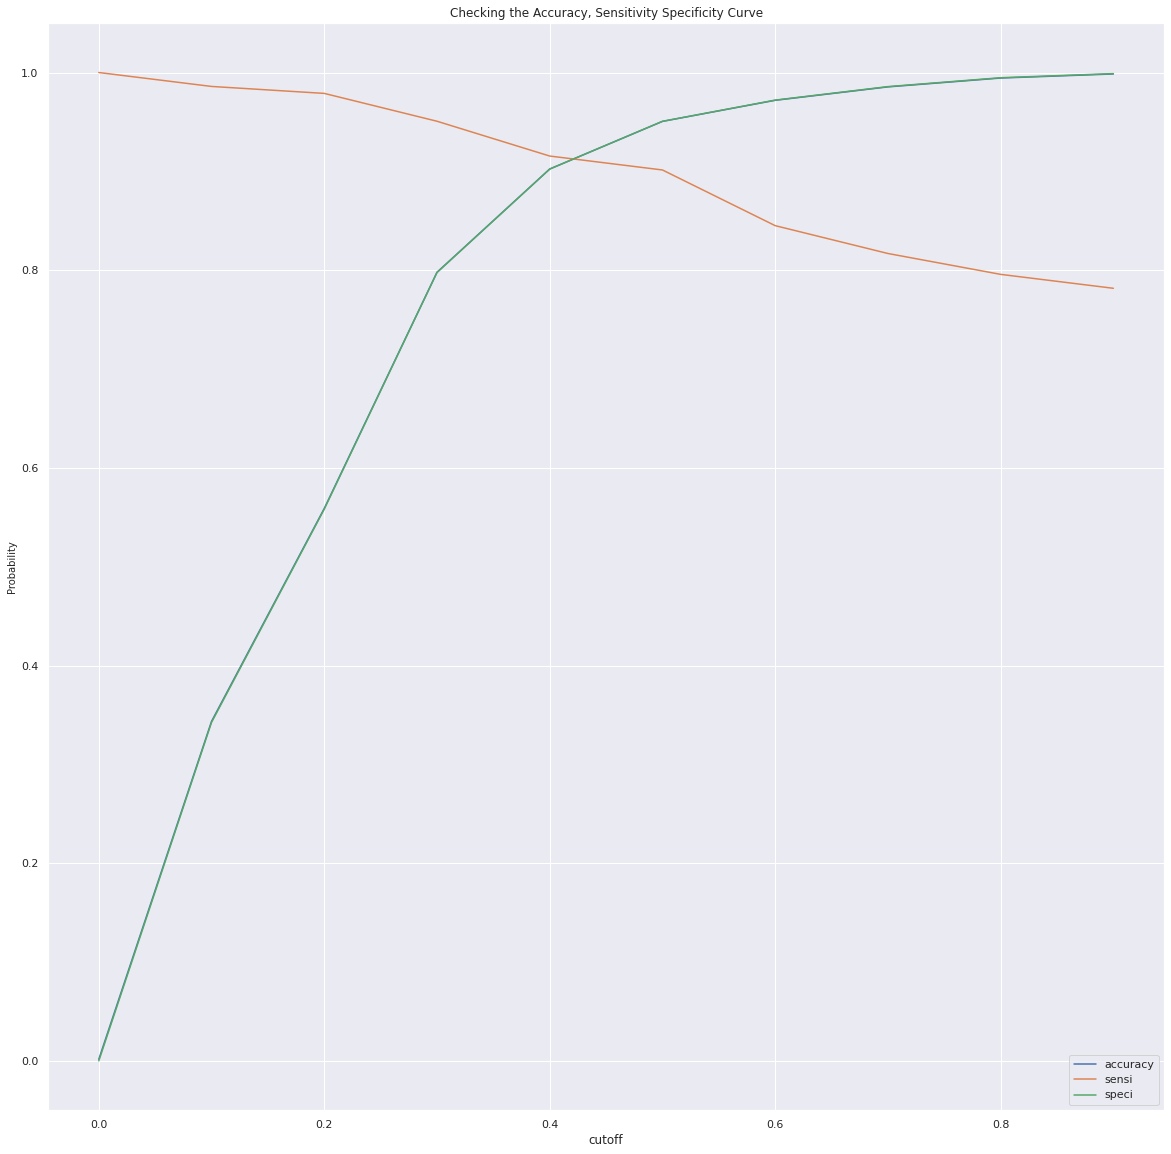





Enter the Ideal Cutoff Index: 0.42


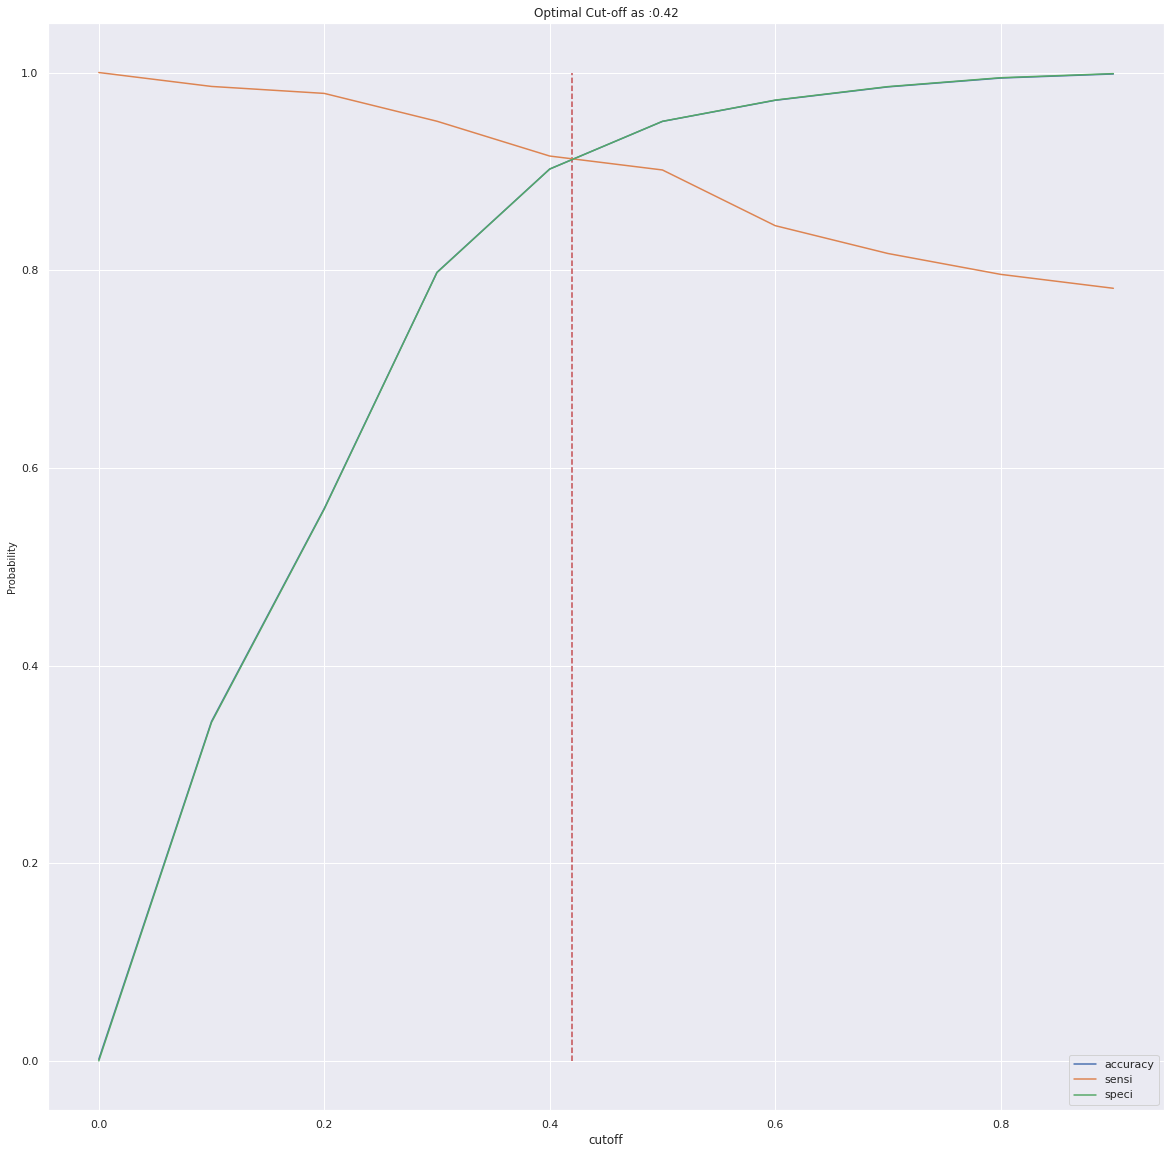

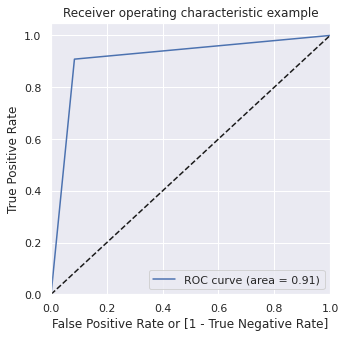





Misclassification Rate: 0.08375174092669967
Negative Predictive Power: 0.9162612396103211
Accuracy: 0.9162482590733003
Precision: 0.01773927392739274
Recall: 0.9084507042253521
Roc Auc Score: 0.9123559719178366




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.147122          0    1    1    0    0    0    0    0   
154704       0     0.319917          0    1    1    1    1    0    0    0   
67247        0     0.139529          0    1    1    0    0    0    0    0   
251657       0     0.211903          0    1    1    1    0    0    0    0   
201903       0     0.763232          1    1    1    1    1    1    1    1   
6079         0     0.259103          0    1    1    1    0    0    0    0   
270936       0     0.030112          0    1    0    0    0    0    0    0   
40673        0     0.197763          0    1    1    0    0    0    0    0   
143209       0     0.268185  

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(randomforest_adasyn_tuning, cut_off_index = None)

### KNN for ADASYN dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# perform hyperparameter tuning
knn_model_adasyn = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
model_knn_adasyn = GridSearchCV(estimator = knn_model_adasyn , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
model_knn_adasyn.fit(X_adasyn, y_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 62.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1, param_grid={'n_neighbors': [3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
model_knn_adasyn.best_params_

{'n_neighbors': 3}

In [ ]:
y_pred = model_knn_adasyn.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9984434067155882
Recall/Sensitivity: 0.823943661971831
Precision: 0.52
Roc_Auc_score: 0.911338778618417


In [ ]:
model_knn_adasyn_tuning = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
model_knn_adasyn_tuning.fit(X_adasyn, y_adasyn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0          0.0          0
154704       0          0.0          0
67247        0          0.0          0
251657       0          0.0          0
201903       0          0.0          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0          0.0          0    0    0    0    0    0    0    0   
154704       0          0.0          0    0    0    0    0    0    0    0   
67247        0          0.0          0    0    0    0    0    0    0    0   
251657       0          0.0          0    0    0    0    0    0    0    0   
201903       0          0.0          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

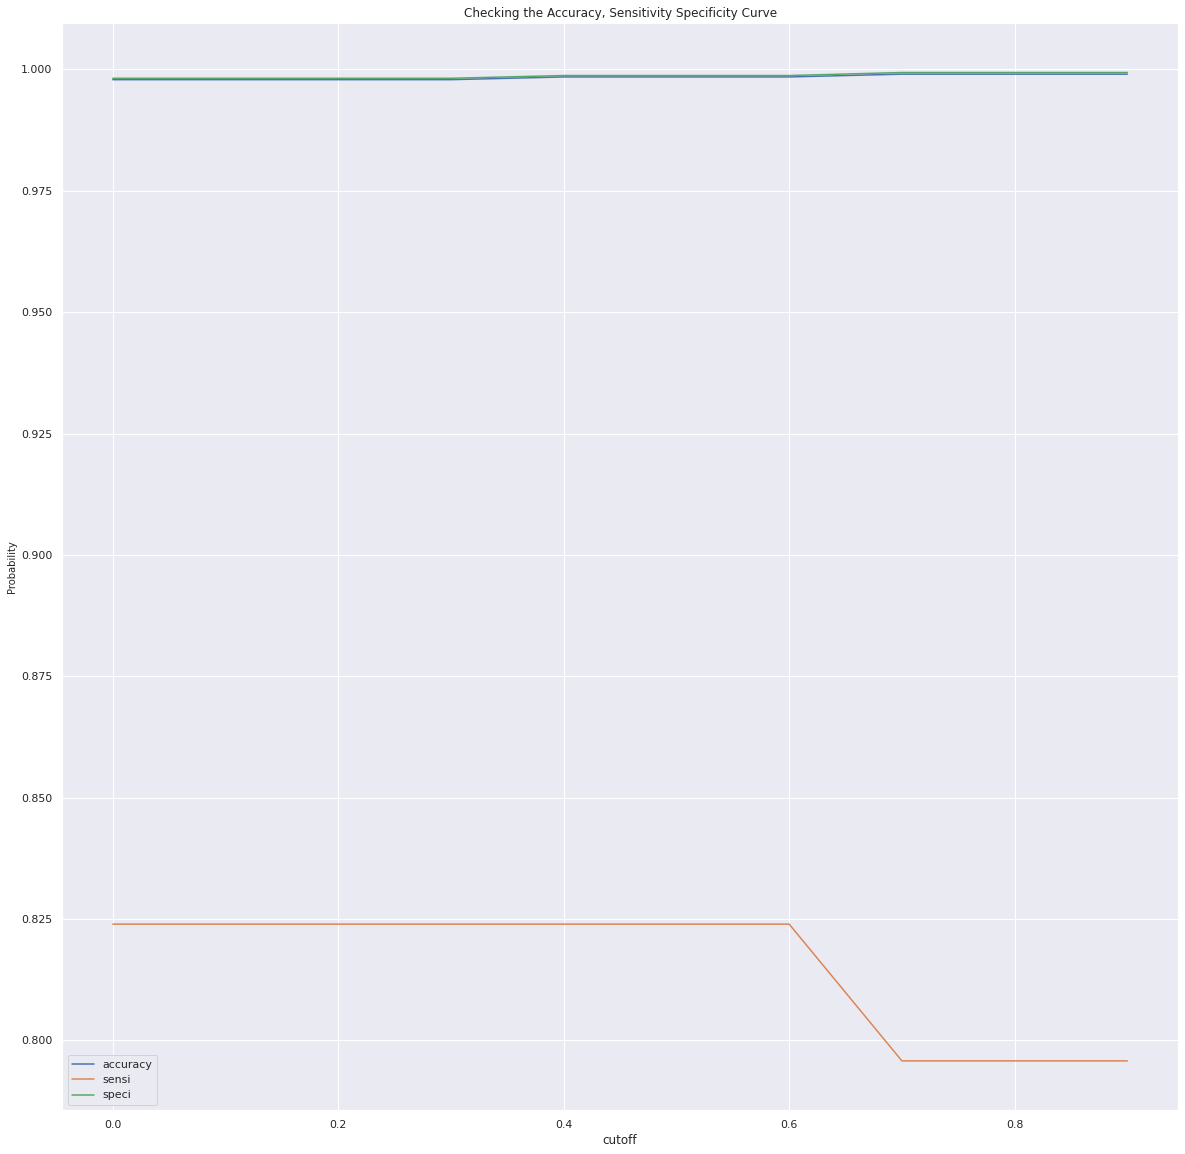





Enter the Ideal Cutoff Index: 0.5


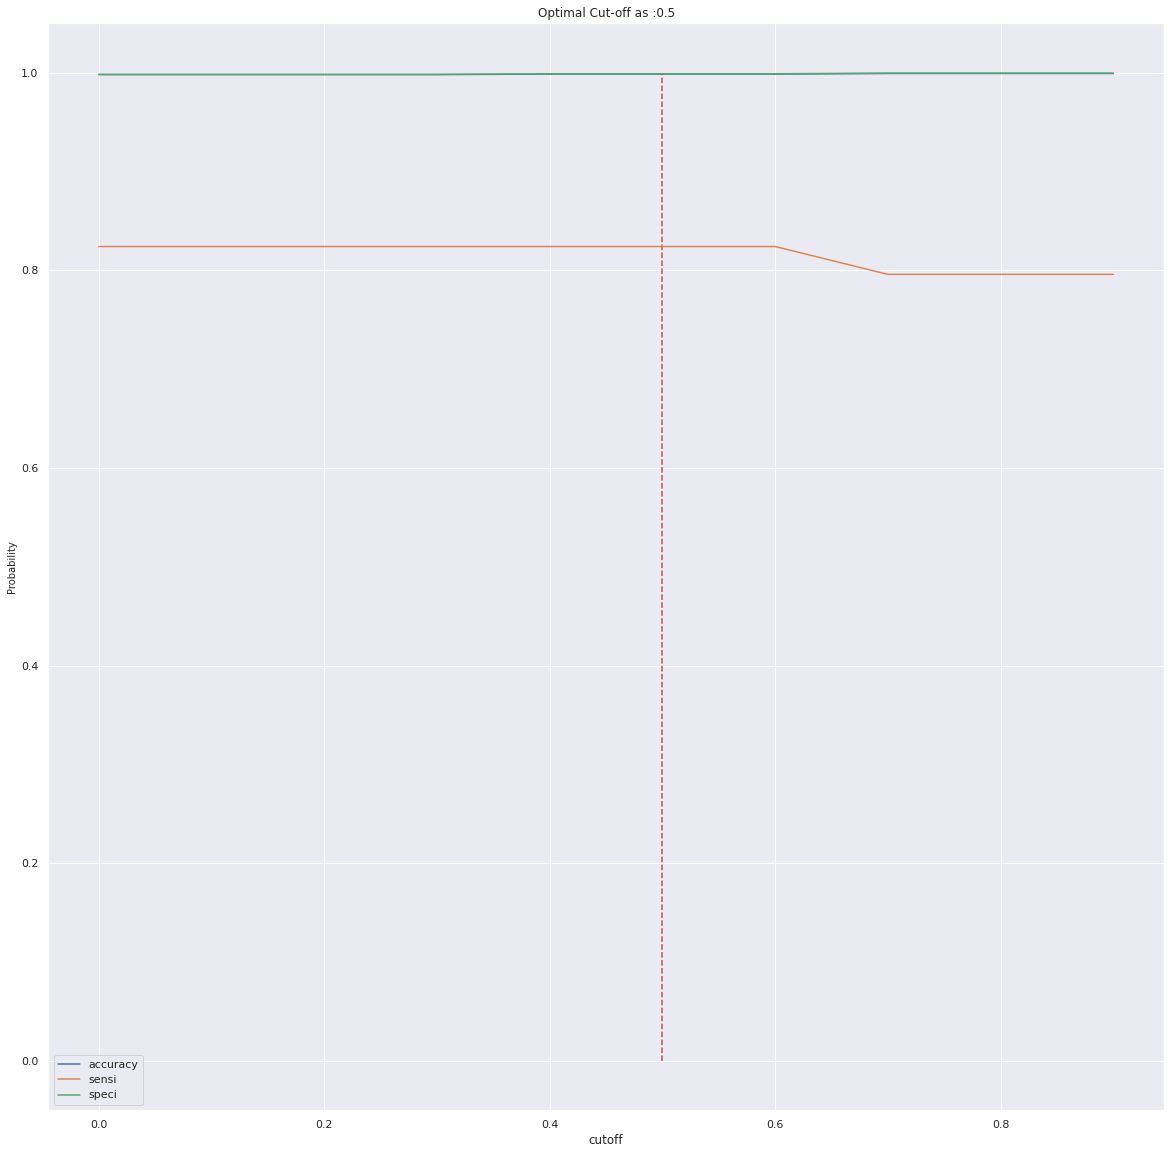

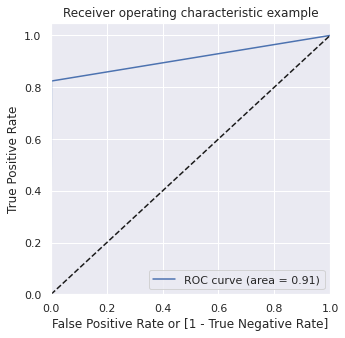





Misclassification Rate: 0.00155659328441183
Negative Predictive Power: 0.9987338952650028
Accuracy: 0.9984434067155882
Precision: 0.52
Recall: 0.823943661971831
Roc Auc Score: 0.911338778618417




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0          0.0          0    0    0    0    0    0    0    0   
154704       0          0.0          0    0    0    0    0    0    0    0   
67247        0          0.0          0    0    0    0    0    0    0    0   
251657       0          0.0          0    0    0    0    0    0    0    0   
201903       0          0.0          0    0    0    0    0    0    0    0   
6079         0          0.0          0    0    0    0    0    0    0    0   
270936       0          0.0          0    0    0    0    0    0    0    0   
40673        0          0.0          0    0    0    0    0    0    0    0   
143209       0          0.0          0    0   

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(model_knn_adasyn_tuning, cut_off_index = None)

From the above model we observe that the it's overfitting at various thresholds. This can be conclude by looking at Specificity and accuracy metrics. This model is not good to predict fraud detection on unseen data.

### XGBoost for ADASYN dataset

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from xgboost import XGBClassifier
# perform hyperparameter tuning
xgboost_model_adasyn = XGBClassifier(random_state=42,tree_method = 'gpu_hist')
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
weights = [1, 99, 100, 1000]
params = {'scale_pos_weight': weights,'n_estimators' :[120,140,170],'max_depth':[5,6,8],'learning_rate' : [0.01,0.1]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
xgboost_adasyn = GridSearchCV(estimator = xgboost_model_adasyn , cv = folds, param_grid = params, scoring  = 'roc_auc',n_jobs=-1, verbose=1)
xgboost_adasyn.fit(X_adasyn, y_adasyn)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  8.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='gpu_hist',
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.

In [ ]:
y_pred = xgboost_adasyn.predict(X_test_transform.values)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9975188137120653
Recall/Sensitivity: 0.8169014084507042
Roc_Auc_score: 0.9073604473702156


In [ ]:
xgboost_adasyn_tuning = XGBClassifier(randon_state=42, tree_method = 'gpu_hist',learning_rate=0.1,max_depth=5, n_estimators=120,scale_pos_weight=99)
xgboost_adasyn_tuning.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=99,
              seed=None, silent=None, subsample=1, tree_method='gpu_hist',
              verbosity=1)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.003222          0
154704       0     0.000005          0
67247        0     0.000983          0
251657       0     0.000003          0
201903       0     0.018175          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.003222          0    1    0    0    0    0    0    0   
154704       0     0.000005          0    1    0    0    0    0    0    0   
67247        0     0.000983          0    1    0    0    0    0    0    0   
251657       0     0.000003          0    1    0    0    0    0    0    0   
201903       0     0.018175          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

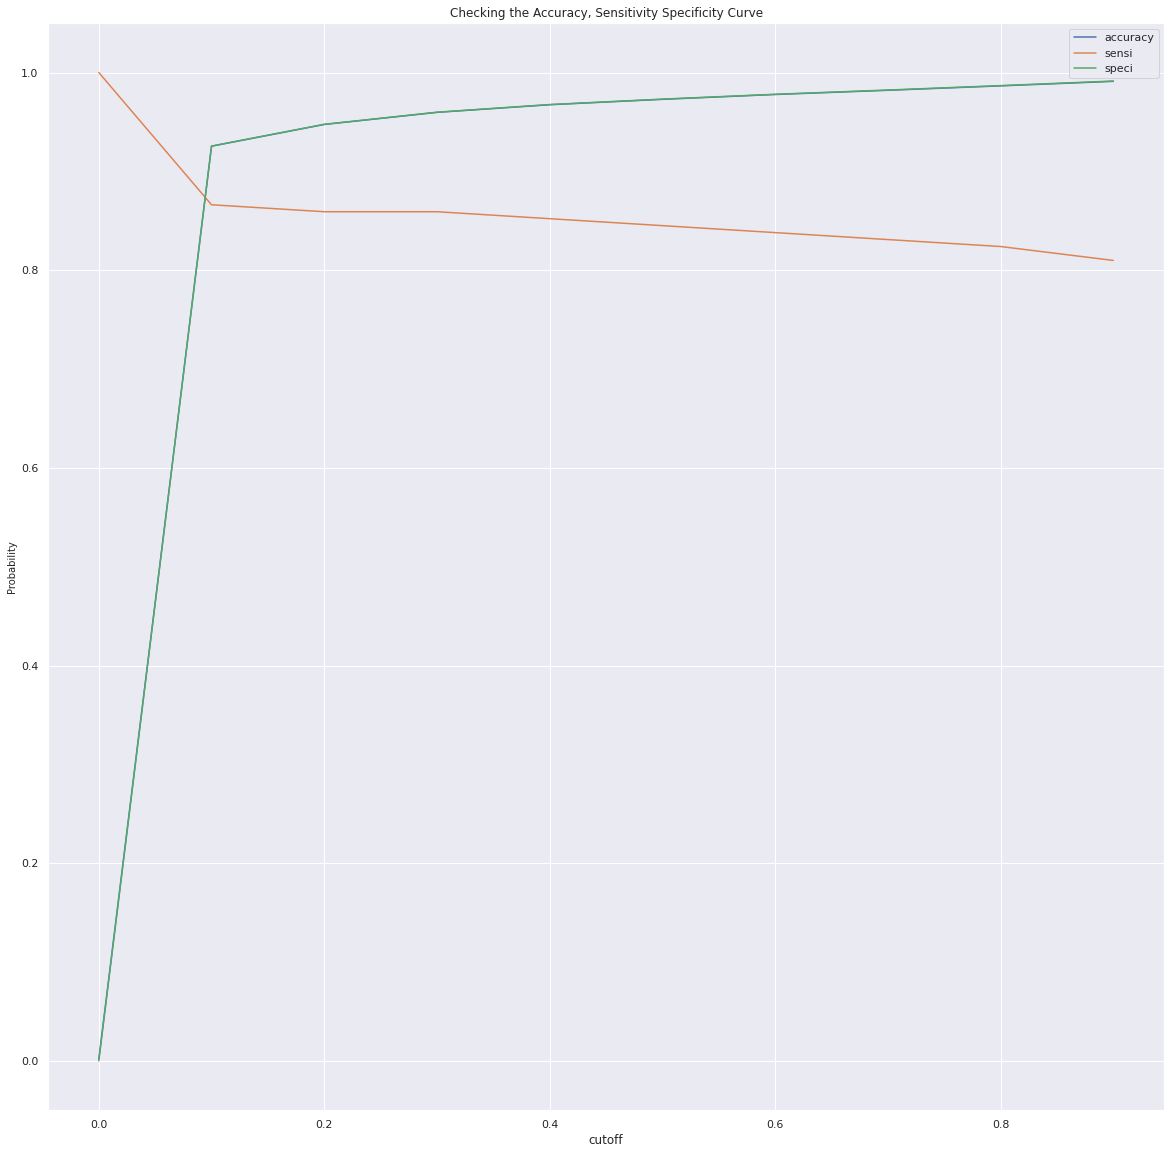





Enter the Ideal Cutoff Index: 0.1


<Figure size 720x576 with 0 Axes>

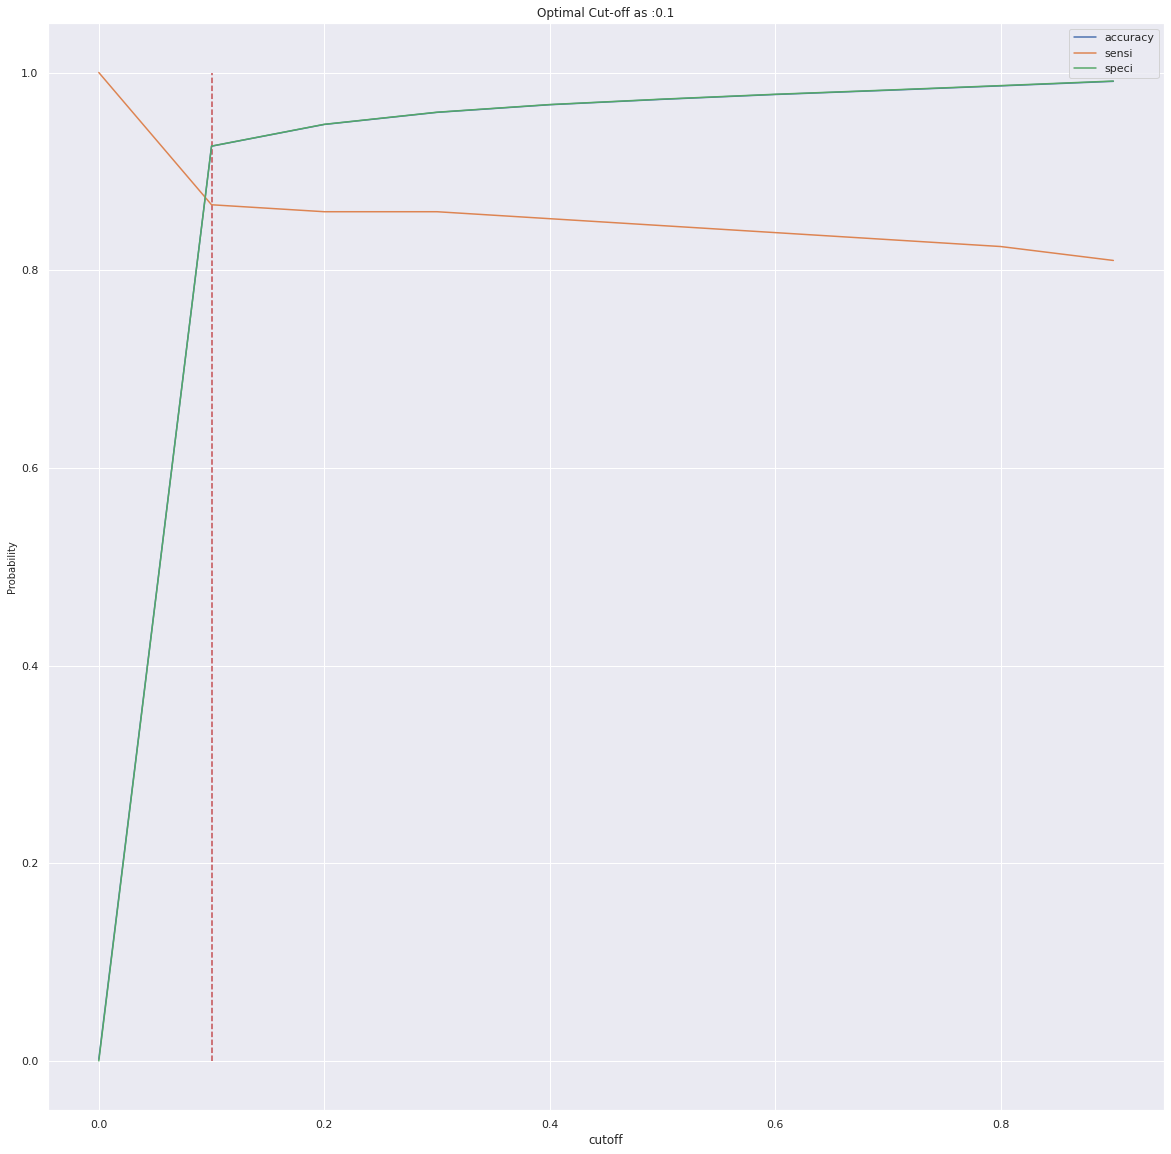

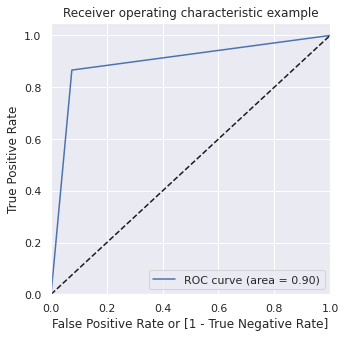





Misclassification Rate: 0.07454092201818756
Negative Predictive Power: 0.9255577308589583
Accuracy: 0.9254590779818125
Precision: 0.019002008342345125
Recall: 0.8661971830985915
Roc Auc Score: 0.8958774569787749




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.003222          0    1    0    0    0    0    0    0   
154704       0     0.000005          0    1    0    0    0    0    0    0   
67247        0     0.000983          0    1    0    0    0    0    0    0   
251657       0     0.000003          0    1    0    0    0    0    0    0   
201903       0     0.018175          0    1    0    0    0    0    0    0   
6079         0     0.000012          0    1    0    0    0    0    0    0   
270936       0     0.001063          0    1    0    0    0    0    0    0   
40673        0     0.004879          0    1    0    0    0    0    0    0   
143209       0     0.000003 

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff_xgboost(xgboost_adasyn_tuning, cut_off_index = None)

## Undersampling

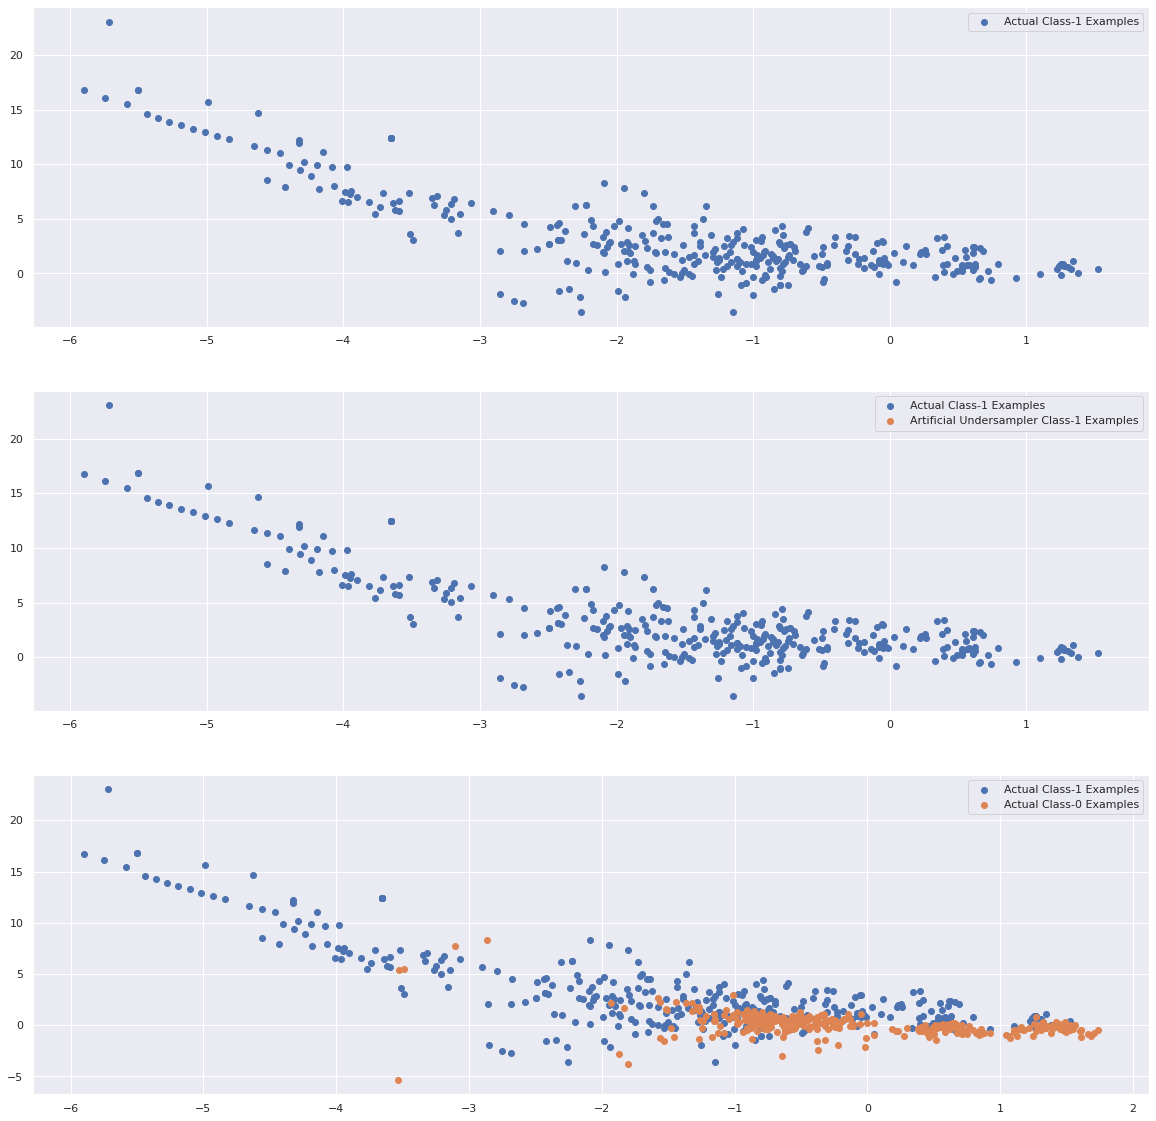

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train_transform, y_train)
X_train_under, y_train_under = X_under, y_under
X_train_under_1 = X_train_under[X_train_transform.shape[0]:]

X_train_1 = X_train_transform.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_transform.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_under_1[:X_train_1.shape[0], 0], X_train_under_1[:X_train_1.shape[0], 1],
            label='Artificial Undersampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print('After Undersampling, Class 0: {0}'.format(sum(y_under == 0)))
print('After Undersampling, Class 1: {0}'.format(sum(y_under == 1)))

After Undersampling, Class 0: 350
After Undersampling, Class 1: 350


### Logistic Regression for undersampling

In [ ]:
# perform hyperparameter tuning
logistic_regression_undersample = LogisticRegression(random_state=42)
pipes = Pipeline([('log_reg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'], 'logreg__solver' : ['liblinear']}
# perform cross validation
logistic_model_undersample = GridSearchCV(estimator = pipes , cv = folds, param_grid = params, scoring  = 'recall')

In [ ]:
logistic_model_undersample.fit(X_under, y_under)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                      

In [ ]:
logistic_model_undersample.best_params_

{'logreg__C': 0.005, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

In [ ]:
# Get the model score based on the hyperparamters tunning
logistic_model_undersample.best_score_

0.96

In [ ]:
y_pred = logistic_model_undersample.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.49434125674426227
Recall/Sensitivity: 0.9507042253521126
Precision: 0.0031154085800660005
Roc_Auc_score: 0.722142888868598


In [ ]:
logistic_regression_undersample = LogisticRegression(random_state=42, C=0.005 , penalty='l1', solver = 'liblinear')
logistic_regression_undersample.fit(X_under, y_under)

LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.525858          1
154704       0     0.510932          1
67247        0     0.512283          1
251657       0     0.485721          0
201903       0     0.619707          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.525858          1    1    1    1    1    1    1    0   
154704       0     0.510932          1    1    1    1    1    1    1    0   
67247        0     0.512283          1    1    1    1    1    1    1    0   
251657       0     0.485721          0    1    1    1    1    1    0    0   
201903       0     0.619707          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

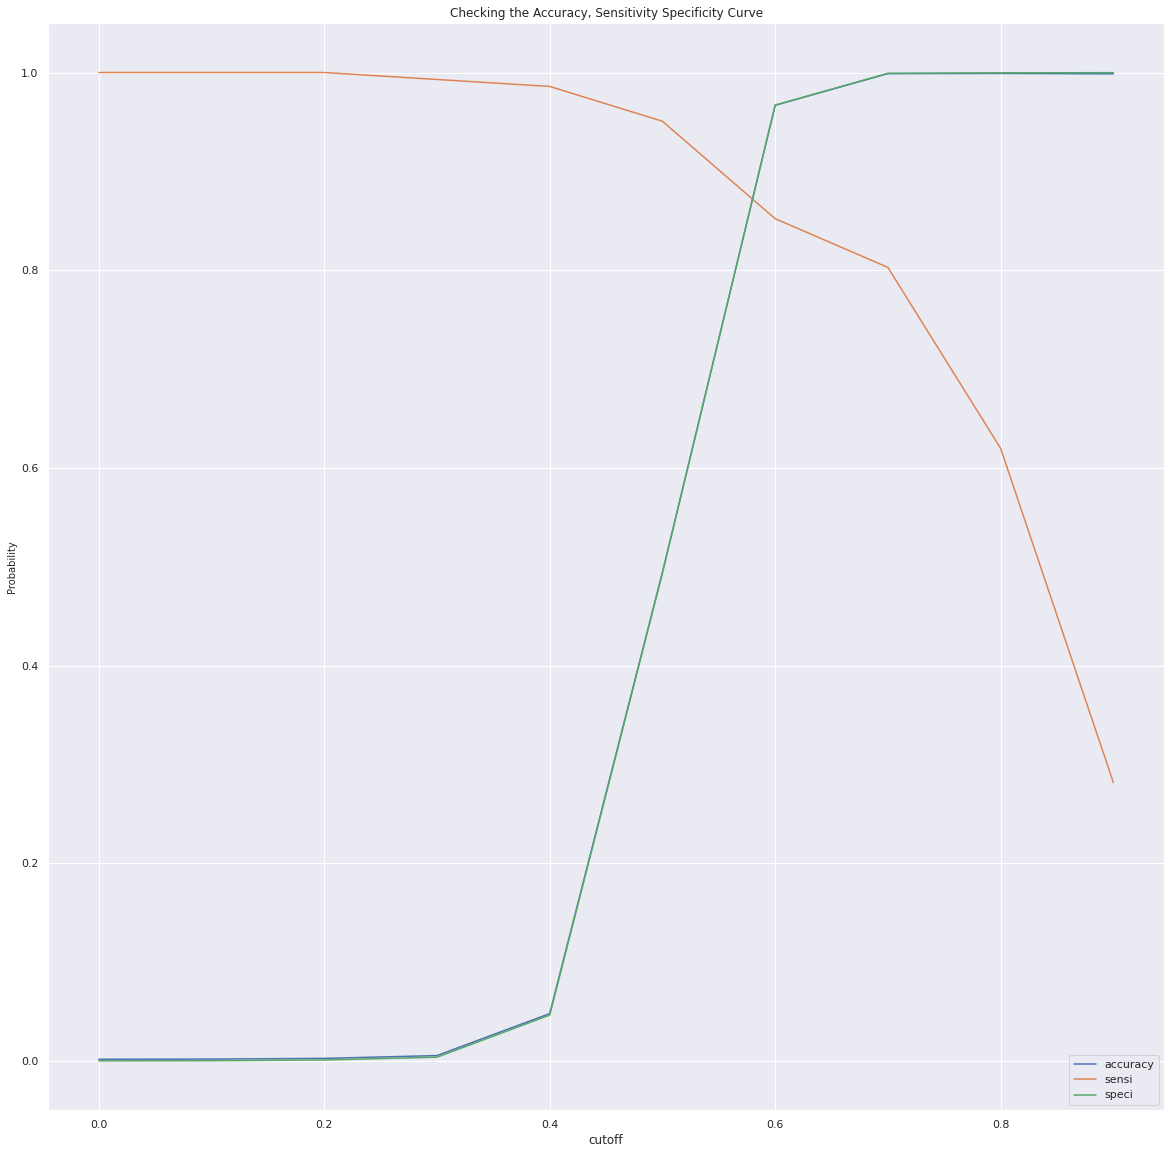





Enter the Ideal Cutoff Index: 0.58


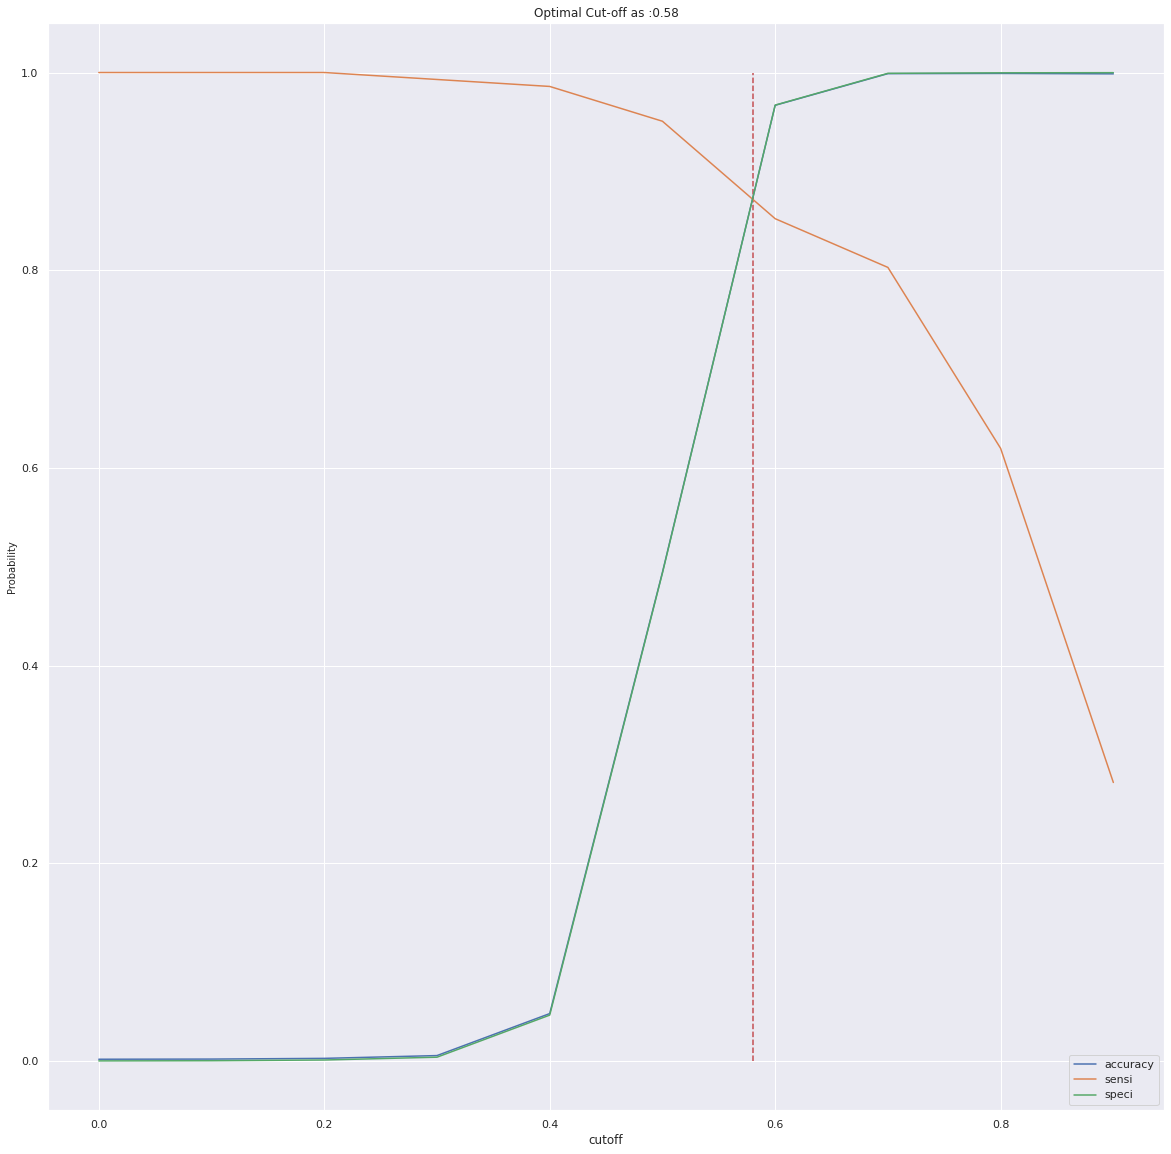

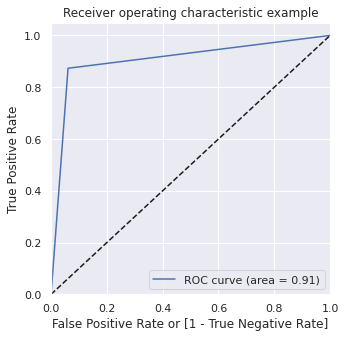





Misclassification Rate: 0.06091780485235771
Negative Predictive Power: 0.9391918031441601
Accuracy: 0.9390821951476422
Precision: 0.02334776878177368
Recall: 0.8732394366197183
Roc Auc Score: 0.9062156198819391




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.525858          1    1    1    1    1    1    1    0   
154704       0     0.510932          1    1    1    1    1    1    1    0   
67247        0     0.512283          1    1    1    1    1    1    1    0   
251657       0     0.485721          0    1    1    1    1    1    0    0   
201903       0     0.619707          1    1    1    1    1    1    1    1   
6079         0     0.366219          0    1    1    1    1    0    0    0   
270936       0     0.510280          1    1    1    1    1    1    1    0   
40673        0     0.475275          0    1    1    1    1    1    0    0   
143209       0     0.347856  

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(logistic_regression_undersample, cut_off_index = None)

## Random Forest with undersampled data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# perform hyperparameter tuning
randomforest_class_undersample = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6,8,10], 'min_samples_split' : [4, 6, 10], 'min_samples_leaf' : [1,2,4]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
randomforest_undersample = GridSearchCV(estimator = randomforest_class_undersample , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [ ]:
randomforest_undersample.fit(X_under, y_under)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [ ]:
# Get the model score based on the hyperparamters tunning
randomforest_undersample.best_score_

0.9085714285714286

In [ ]:
randomforest_undersample.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [ ]:
y_pred = randomforest_undersample.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9858619196423346
Recall/Sensitivity: 0.852112676056338
Precision: 0.09250764525993883
Roc_Auc_score: 0.9190986235816795


In [ ]:
randomforest_under_tuning = RandomForestClassifier(criterion = 'gini', max_depth= 10, min_samples_leaf=2, min_samples_split=4)
randomforest_under_tuning.fit(X_under, y_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.037699          0
154704       0     0.118208          0
67247        0     0.019515          0
251657       0     0.024606          0
201903       0     0.711816          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.037699          0    1    0    0    0    0    0    0   
154704       0     0.118208          0    1    1    0    0    0    0    0   
67247        0     0.019515          0    1    0    0    0    0    0    0   
251657       0     0.024606          0    1    0    0    0    0    0    0   
201903       0     0.711816          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

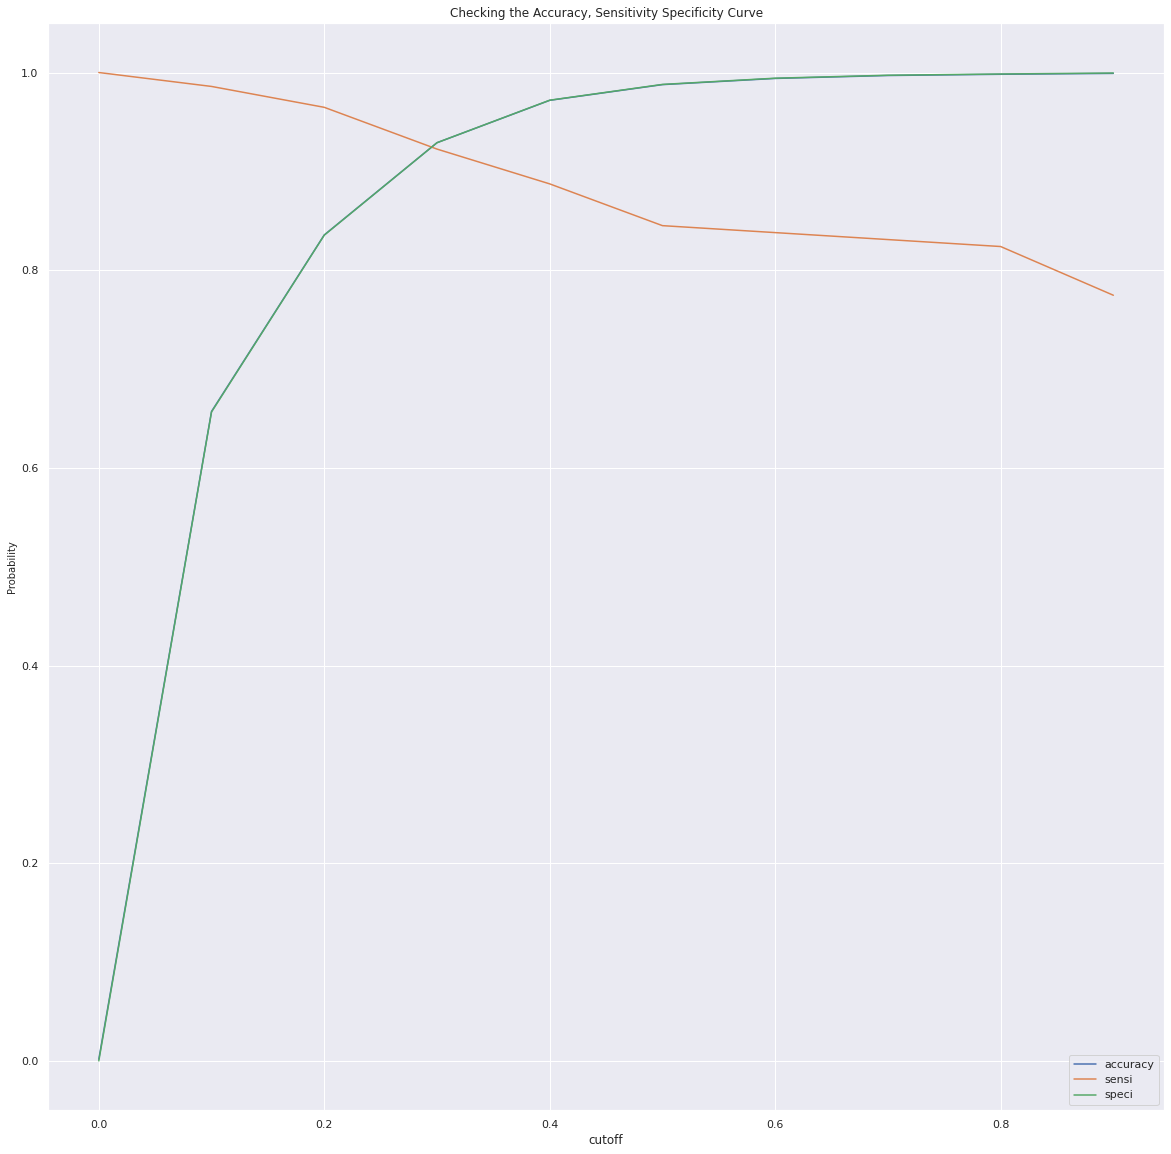





Enter the Ideal Cutoff Index: 0.3


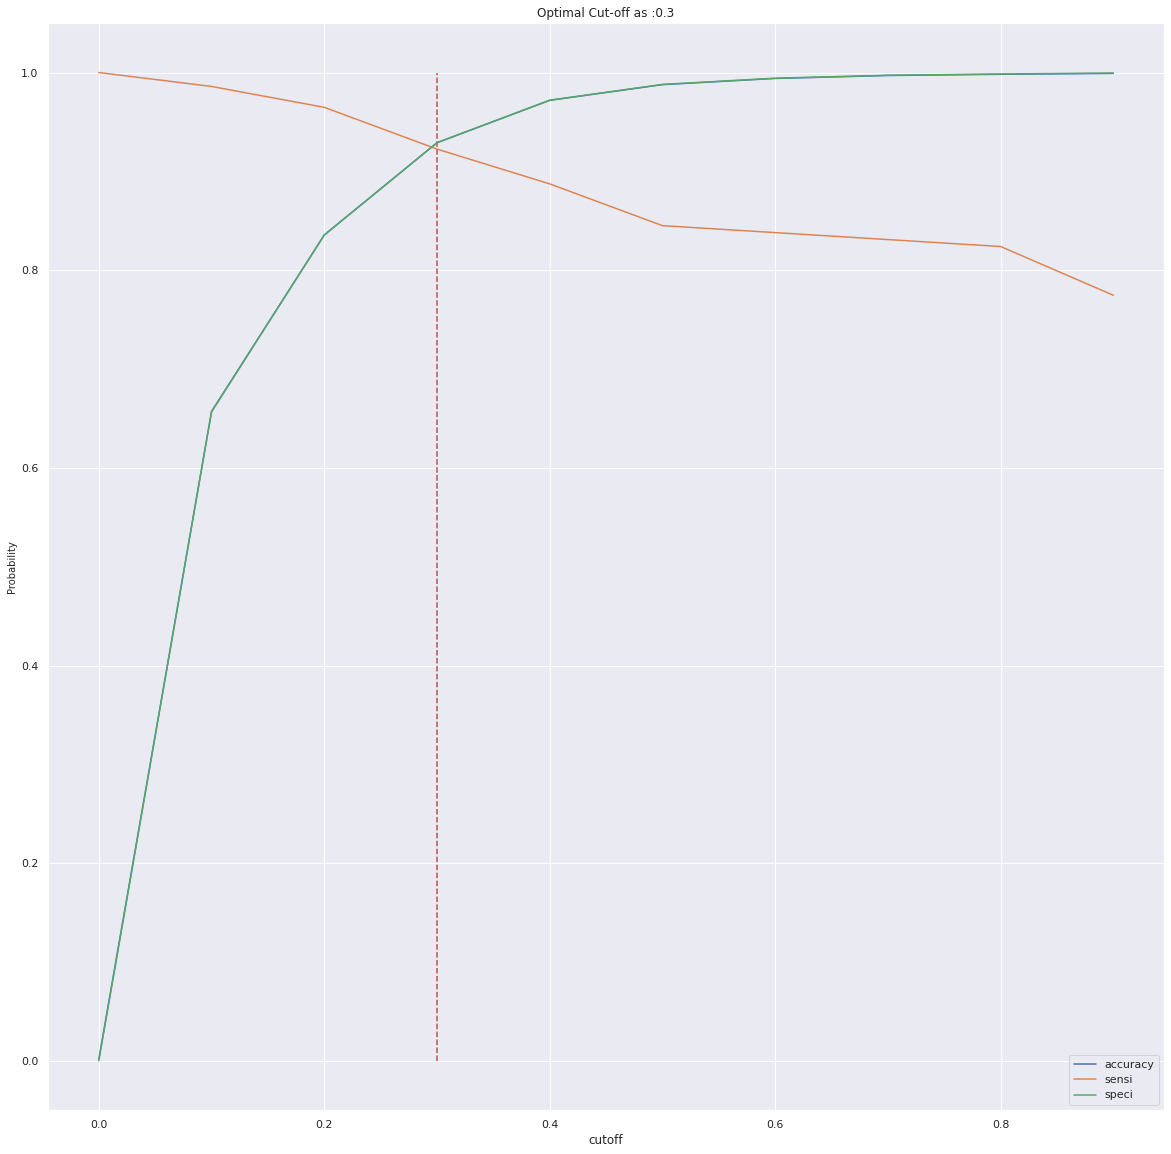

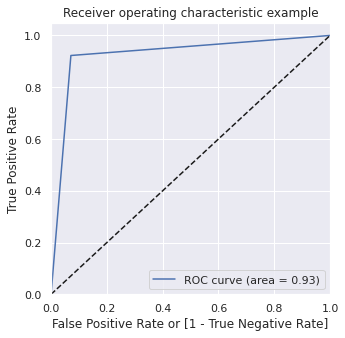





Misclassification Rate: 0.07102980934658193
Negative Predictive Power: 0.9289809029202472
Accuracy: 0.928970190653418
Precision: 0.021166585878170947
Recall: 0.9225352112676056
Roc Auc Score: 0.9257580570939263




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.037699          0    1    0    0    0    0    0    0   
154704       0     0.118208          0    1    1    0    0    0    0    0   
67247        0     0.019515          0    1    0    0    0    0    0    0   
251657       0     0.024606          0    1    0    0    0    0    0    0   
201903       0     0.711816          1    1    1    1    1    1    1    1   
6079         0     0.118998          0    1    1    0    0    0    0    0   
270936       0     0.114533          0    1    1    0    0    0    0    0   
40673        0     0.014784          0    1    0    0    0    0    0    0   
143209       0     0.420333  

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(randomforest_under_tuning, cut_off_index = None)

### SVM for undersampling

In [ ]:
from sklearn import svm
# perform hyperparameter tuning
svm_model_undersample = svm.SVC(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'kernel' :['rbf','polynomial','sigmoid'],'C':[0.001,0.01,0.1,1,10]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
svm_model_undersampling = GridSearchCV(estimator = svm_model_undersample , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
svm_model_undersampling.fit(X_under, y_under)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'polynomial', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
# Get the model score based on the hyperparamters tunning
svm_model_undersampling.best_score_

0.9057142857142857

In [ ]:
svm_model_undersampling.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
y_pred = svm_model_undersampling.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9816719918542186
Recall/Sensitivity: 0.8802816901408451
Precision: 0.07467144563918758
Roc_Auc_score: 0.9310612328736134


In [ ]:
from sklearn import svm
svm_undersampling = svm.SVC(kernel='rbf',C=10 , random_state=42) 
svm_undersampling.fit(X_under, y_under)
y_pred = svm_undersampling.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9816719918542186
Recall/Sensitivity: 0.8802816901408451
Precision: 0.07467144563918758
Roc_Auc_score: 0.9310612328736134


### KNN for undersampled data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
# perform hyperparameter tuning
knn_model_undersample = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
# perform cross validation
from sklearn.model_selection import GridSearchCV
knn_undersampling = GridSearchCV(estimator = knn_model_undersample , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
knn_undersampling.fit(X_under, y_under)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1, param_grid={'n_neighbors': [3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
knn_undersampling.best_params_

{'n_neighbors': 3}

In [ ]:
y_pred = knn_undersampling.predict(X_test_transform)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9788865091347448
Recall/Sensitivity: 0.8591549295774648
Precision: 0.06400839454354669
Roc_Auc_score: 0.9191203775330143


In [ ]:
knn_under_tuning = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
knn_under_tuning.fit(X_under, y_under)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0          0.0          0
154704       0          0.0          0
67247        0          0.0          0
251657       0          0.0          0
201903       0          1.0          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0          0.0          0    0    0    0    0    0    0    0   
154704       0          0.0          0    0    0    0    0    0    0    0   
67247        0          0.0          0    0    0    0    0    0    0    0   
251657       0          0.0          0    0    0    0    0    0    0    0   
201903       0          1.0          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    1  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

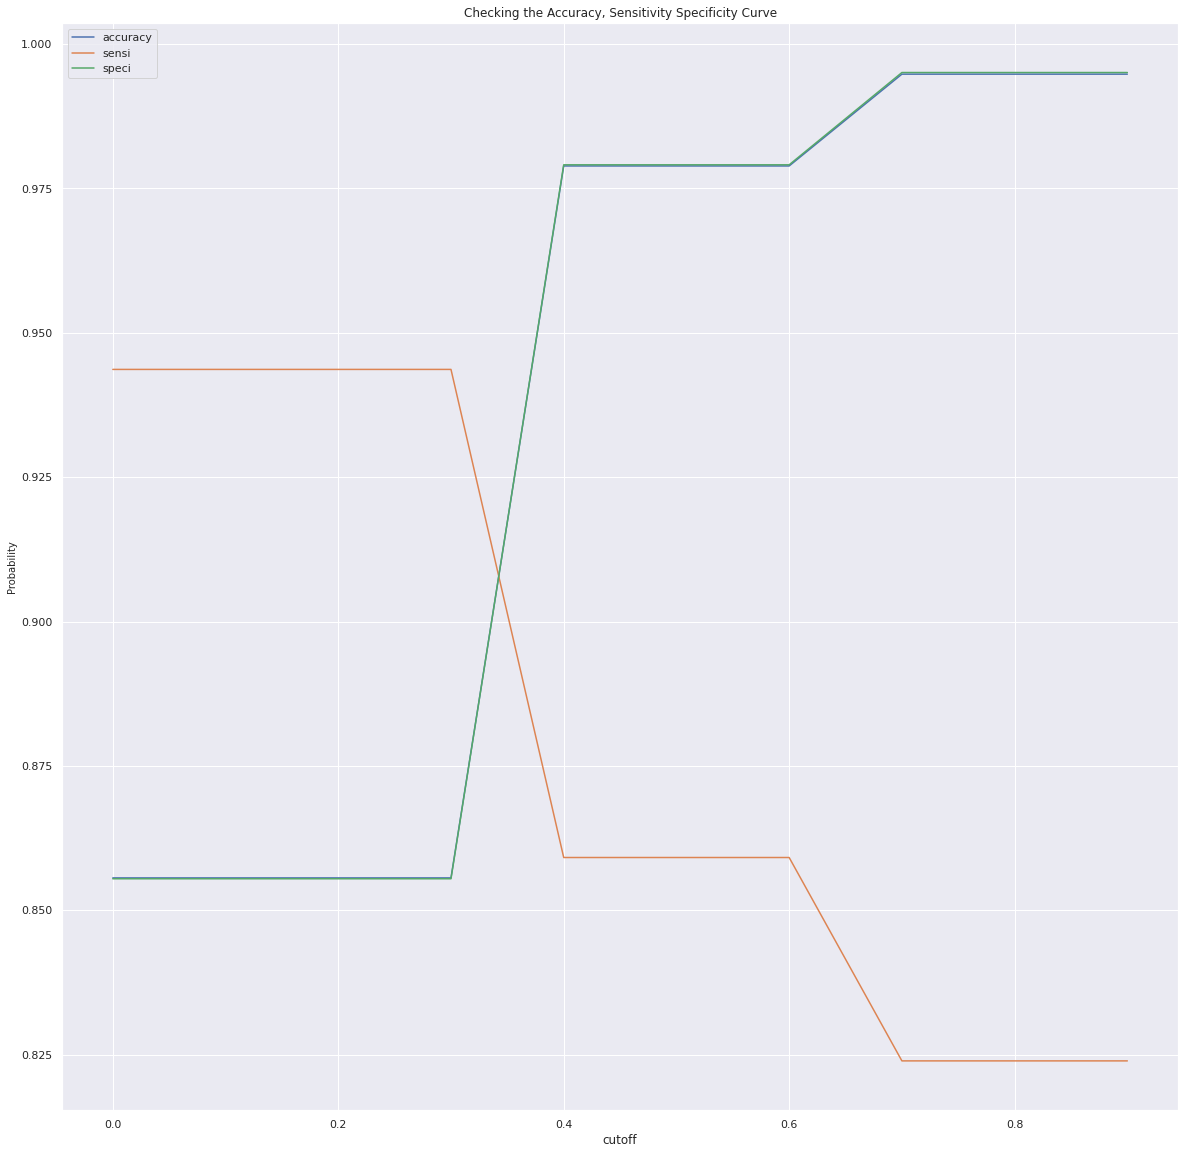





Enter the Ideal Cutoff Index: 0.35


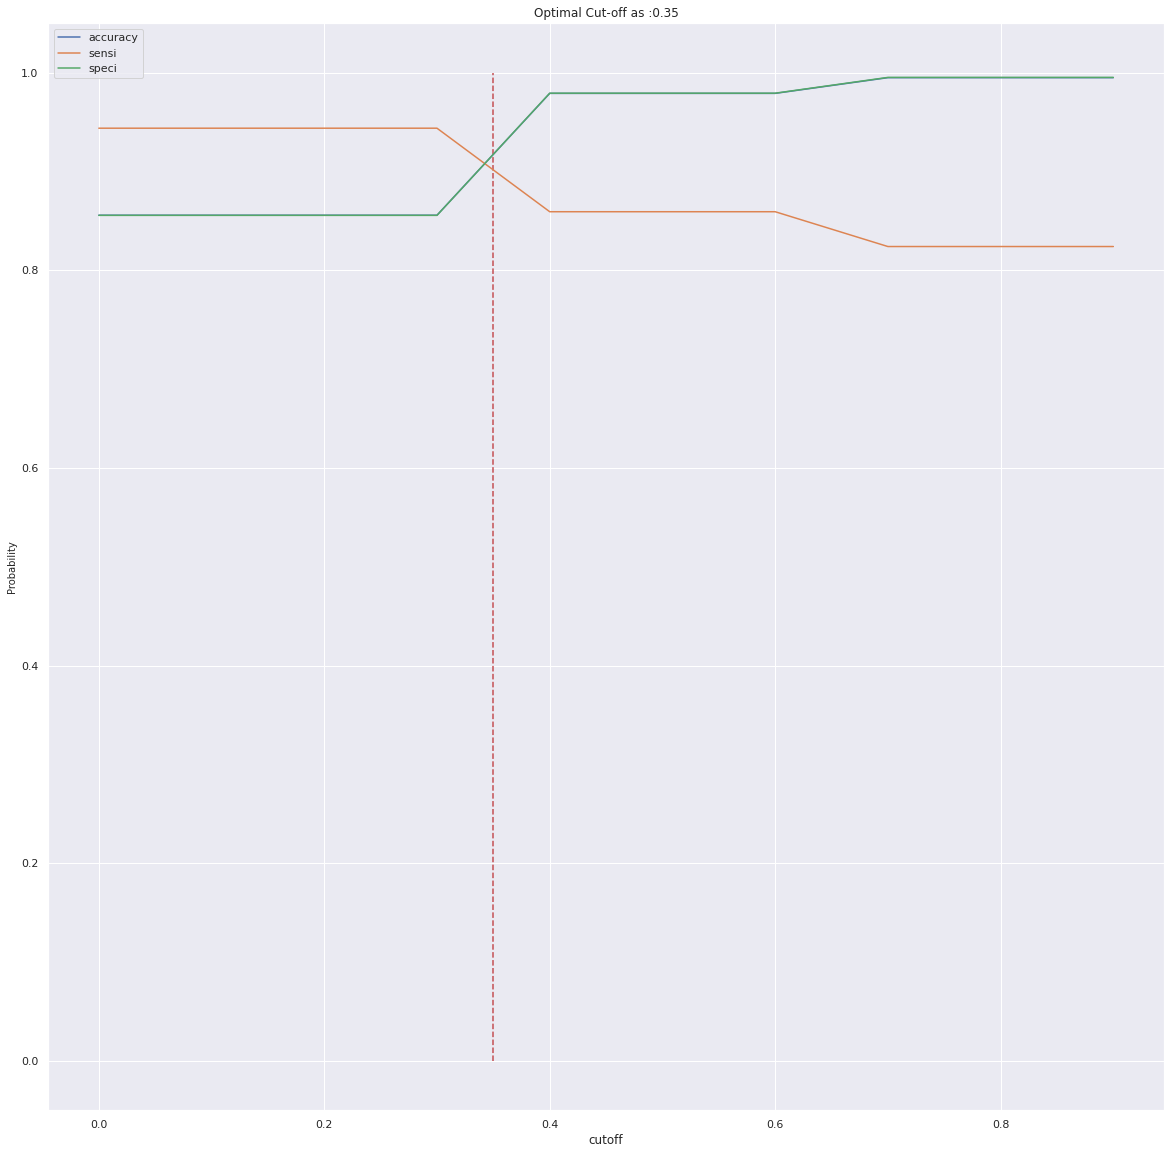

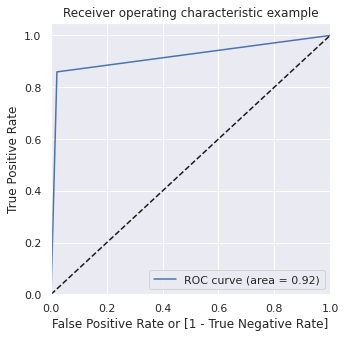





Misclassification Rate: 0.0211134908652552
Negative Predictive Power: 0.979085825488564
Accuracy: 0.9788865091347448
Precision: 0.06400839454354669
Recall: 0.8591549295774648
Roc Auc Score: 0.9191203775330143




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.000000          0    0    0    0    0    0    0    0   
154704       0     0.000000          0    0    0    0    0    0    0    0   
67247        0     0.000000          0    0    0    0    0    0    0    0   
251657       0     0.000000          0    0    0    0    0    0    0    0   
201903       0     1.000000          1    1    1    1    1    1    1    1   
6079         0     0.000000          0    0    0    0    0    0    0    0   
270936       0     0.333333          0    1    1    1    1    0    0    0   
40673        0     0.000000          0    0    0    0    0    0    0    0   
143209       0     0.333333    

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff(knn_under_tuning, cut_off_index = None)

### XGBoost for undersampled data

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from xgboost import XGBClassifier
# perform hyperparameter tuning
xgboost_model_undersample = XGBClassifier(random_state=42,tree_method='gpu_hist')
weights = [1, 10, 99, 1000]
params = {'scale_pos_weight': weights,'n_estimators' :[140,120,170],'max_depth':[5,6,8],'learning_rate' : [0.01,0.1]}
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# perform cross validation
from sklearn.model_selection import GridSearchCV
xgboost_undersampling = GridSearchCV(estimator = xgboost_model_undersample , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_undersampling.fit(X_under, y_under)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  8.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='gpu_hist',
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.

In [ ]:
xgboost_undersampling.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 140,
 'scale_pos_weight': 1000}

In [ ]:
y_pred = xgboost_undersampling.predict(X_test_transform.values)
# print the evaluation result by choosing an evaluation metric
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.4357056751284482
Recall/Sensitivity: 0.9577464788732394
Precision: 0.002813114075912711
Roc_Auc_score: 0.6962915580964244


In [ ]:
xgboost_under_tuning = XGBClassifier(randon_state=42, learning_rate=0.1,max_depth=5, n_estimators=140,scale_pos_weight=99)
xgboost_under_tuning.fit(X_under, y_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=99,
              seed=None, silent=None, subsample=1, verbosity=1)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.107071          0
154704       0     0.002353          0
67247        0     0.003675          0
251657       0     0.007060          0
201903       0     0.998677          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.107071          0    1    1    0    0    0    0    0   
154704       0     0.002353          0    1    0    0    0    0    0    0   
67247        0     0.003675          0    1    0    0    0    0    0    0   
251657       0     0.007060          0    1    0    0    0    0    0    0   
201903       0     0.998677          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    1  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

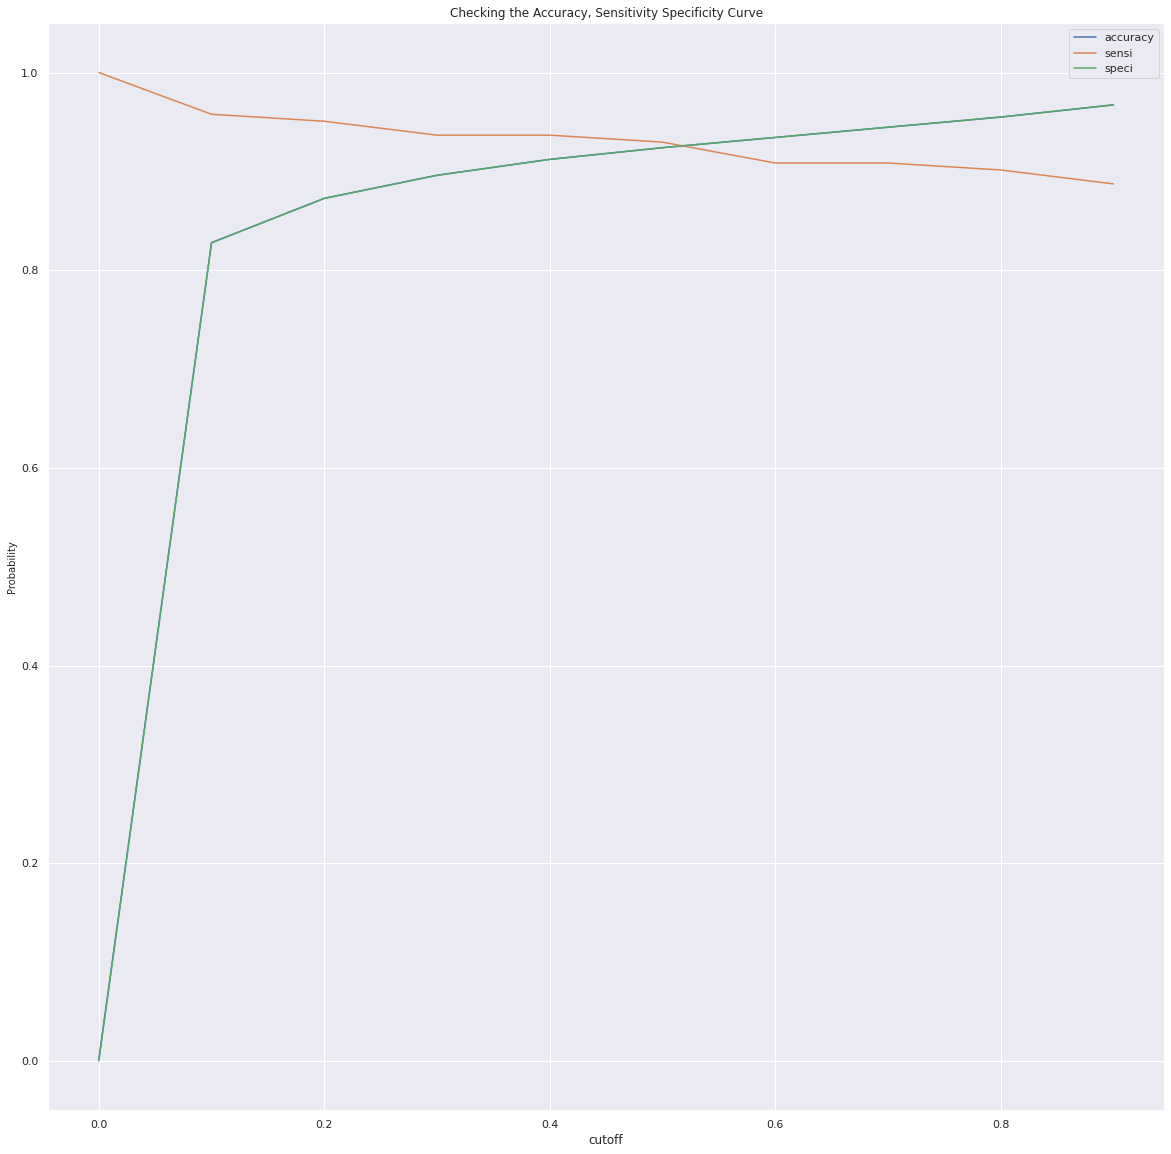





Enter the Ideal Cutoff Index: 0.51


<Figure size 720x576 with 0 Axes>

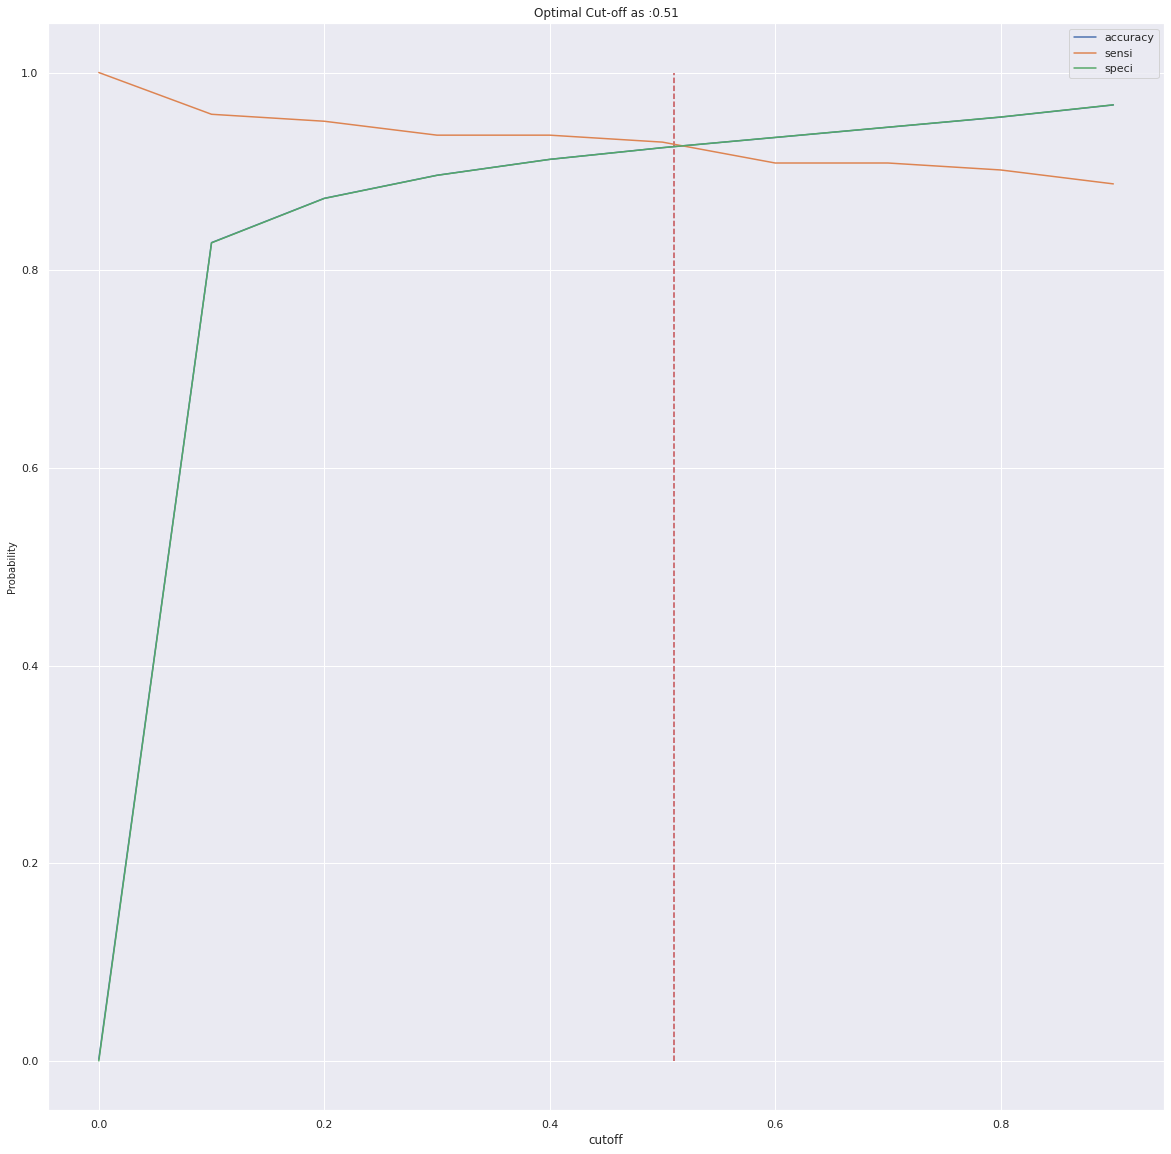

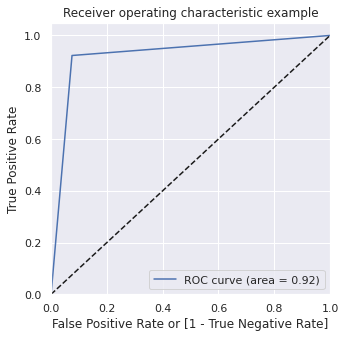





Misclassification Rate: 0.07505588521002306
Negative Predictive Power: 0.9249481248754411
Accuracy: 0.924944114789977
Precision: 0.020052043471605694
Recall: 0.9225352112676056
Roc Auc Score: 0.9237416680715232




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.107071          0    1    1    0    0    0    0    0   
154704       0     0.002353          0    1    0    0    0    0    0    0   
67247        0     0.003675          0    1    0    0    0    0    0    0   
251657       0     0.007060          0    1    0    0    0    0    0    0   
201903       0     0.998677          1    1    1    1    1    1    1    1   
6079         0     0.030835          0    1    0    0    0    0    0    0   
270936       0     0.002608          0    1    0    0    0    0    0    0   
40673        0     0.015777          0    1    0    0    0    0    0    0   
143209       0     0.117570  

In [ ]:
# print the optimum value of hyperparameters
optimal_cutoff_xgboost(xgboost_under_tuning, cut_off_index = None)

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

By using different models with various sampling techniques after predicting frauds, we identified that Random Forest for Adasyn sampling technique gives the best Sensitivity/Recall, Accuracy, Specificity and Roc-Auc Curve.

In [ ]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth= 4, min_samples_leaf=10, min_samples_split=10,max_features=12)
clf.fit(X_adasyn, y_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
49089        0     0.156086          0
154704       0     0.316311          0
67247        0     0.145425          0
251657       0     0.271656          0
201903       0     0.805749          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.156086          0    1    1    0    0    0    0    0   
154704       0     0.316311          0    1    1    1    1    0    0    0   
67247        0     0.145425          0    1    1    0    0    0    0    0   
251657       0     0.271656          0    1    1    1    0    0    0    0   
201903       0     0.805749          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
49089     0    0    0  
154704    0    0    0  
67247     0    0    0  
251657    0    0    0  
201903    1    1    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

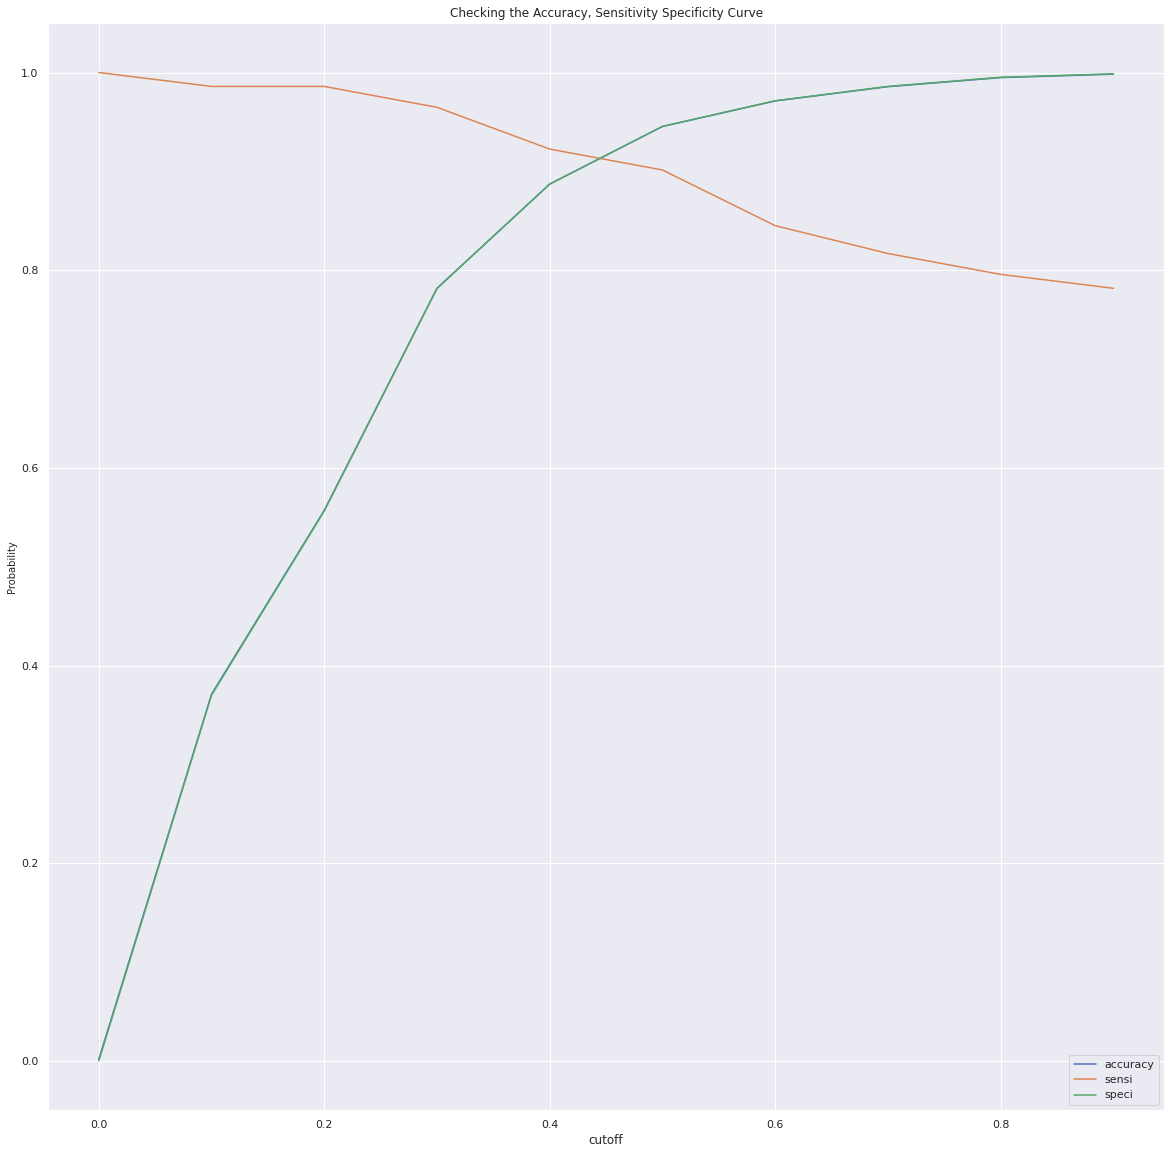





Enter the Ideal Cutoff Index: 0.45


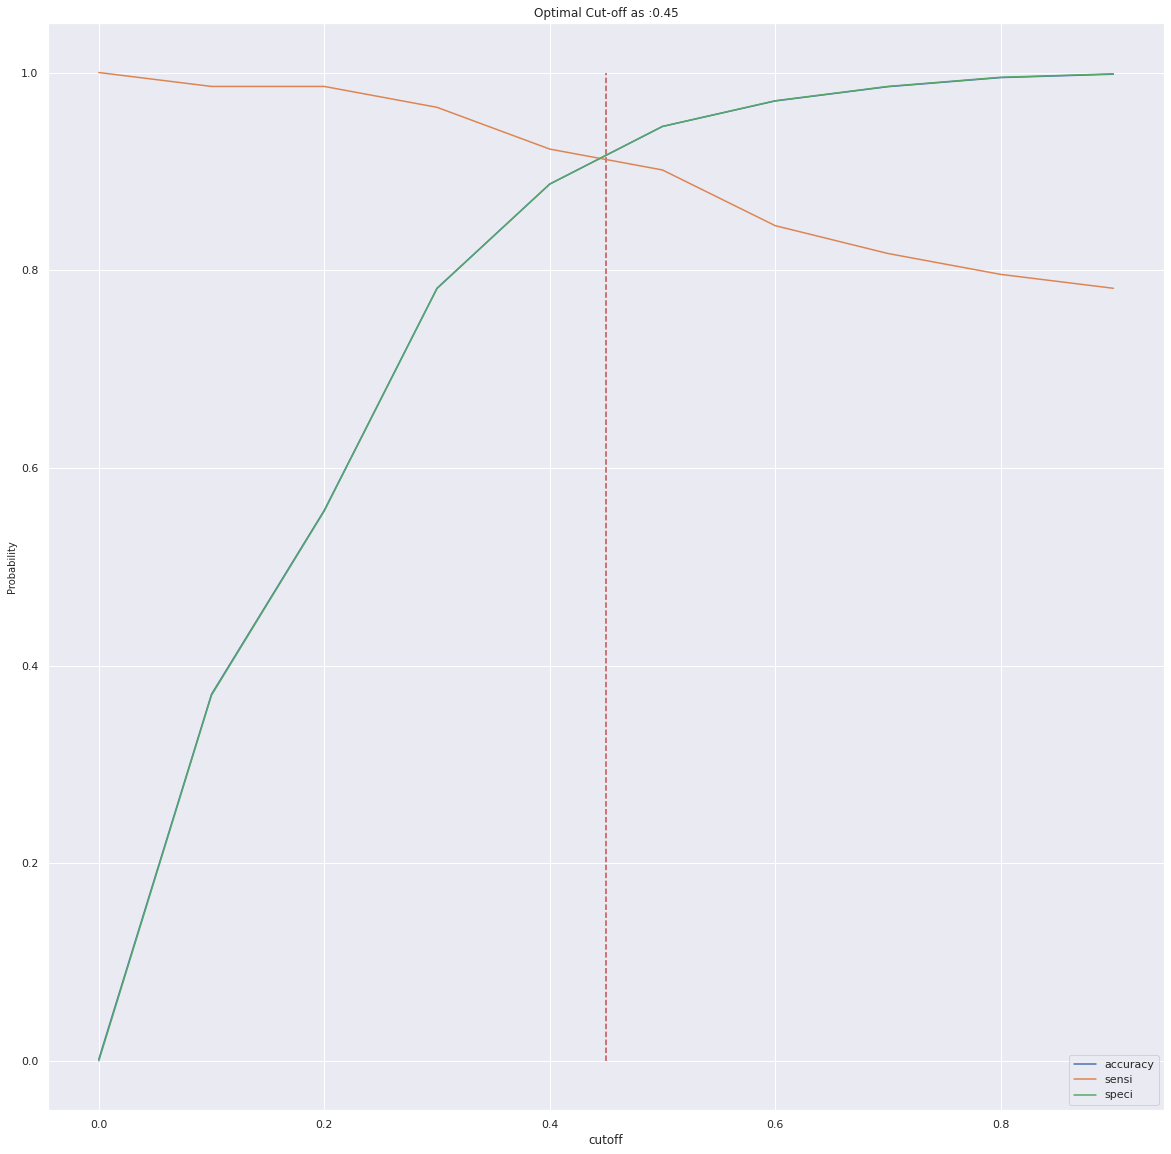

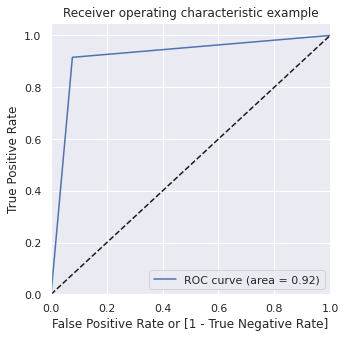





Misclassification Rate: 0.0764135154430439
Negative Predictive Power: 0.9235999577965088
Accuracy: 0.9235864845569561
Precision: 0.019557695200842485
Recall: 0.9154929577464789
Roc Auc Score: 0.9195464577714939




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
49089        0     0.156086          0    1    1    0    0    0    0    0   
154704       0     0.316311          0    1    1    1    1    0    0    0   
67247        0     0.145425          0    1    1    0    0    0    0    0   
251657       0     0.271656          0    1    1    1    0    0    0    0   
201903       0     0.805749          1    1    1    1    1    1    1    1   
6079         0     0.289082          0    1    1    1    0    0    0    0   
270936       0     0.032012          0    1    0    0    0    0    0    0   
40673        0     0.205535          0    1    1    1    0    0    0    0   
143209       0     0.239044  

In [ ]:
# Plot Confusion matrix and ROC curve to get the optimal-threshold value for prediction
optimal_cutoff(clf, cut_off_index = None)

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 10


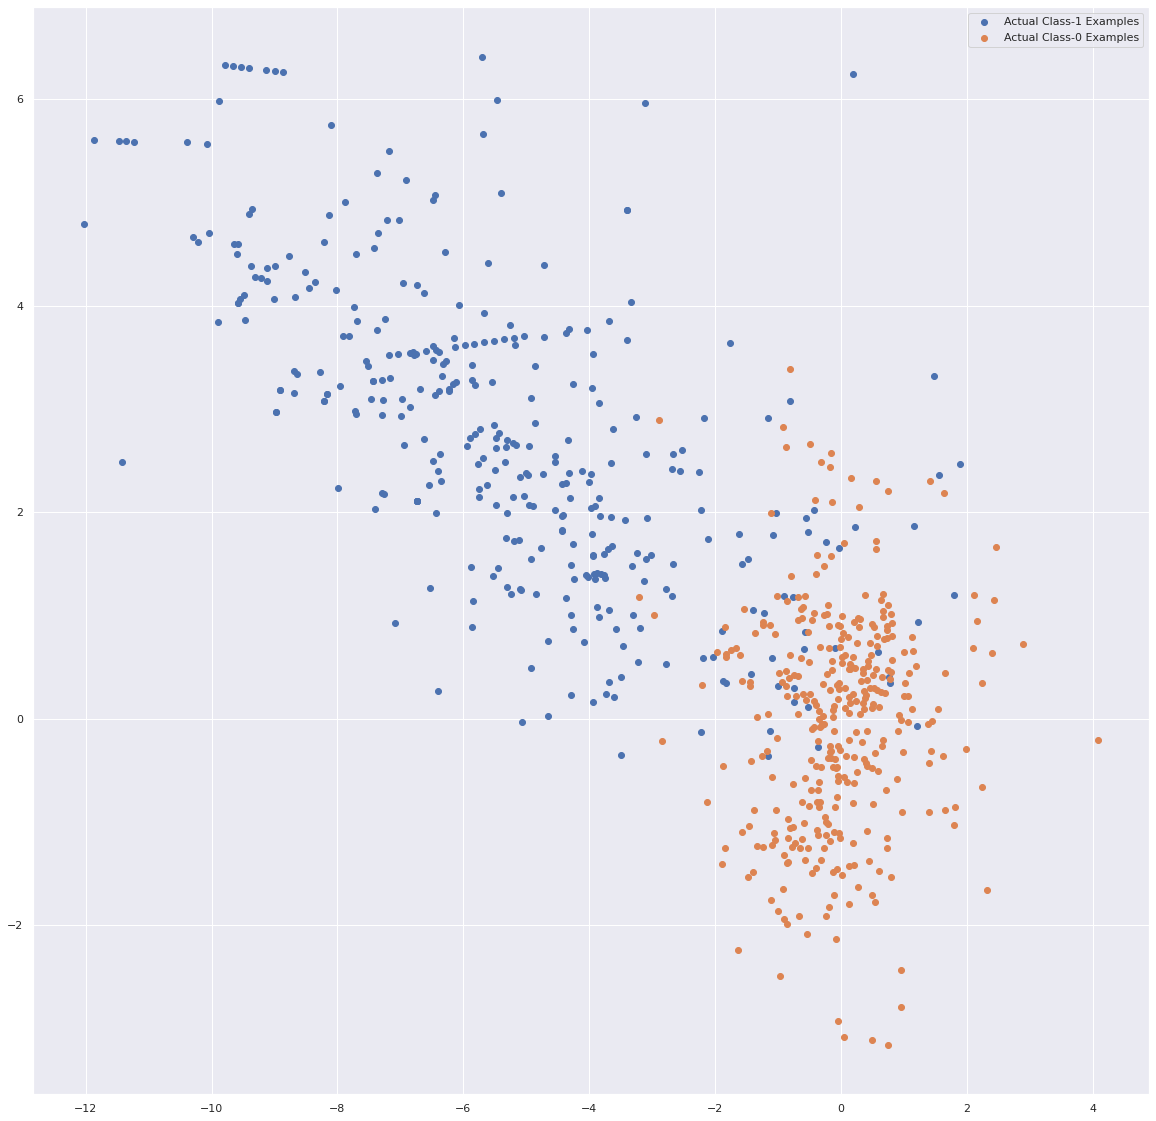

In [ ]:
var_imp = []
X_train = X_train_transform
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)
print(tpr)
print(fpr)

Train auc = 0.9310612328736134
1
[0.         0.88028169 1.        ]
[0.         0.01815922 1.        ]


**The specificity, sensitivity & accuracy metrics of the final Random forest model on Test dataset is good to predict the probability of fraud detection. The final variables are reliable to predict the probability of fraud detection.**

## End